In [1]:
from IPython.display import display, HTML
display(HTML(
    '<style>'
        '#notebook { padding-top:0px !important; } ' 
        '.container { width:99% !important; } '
        '.end_space { min-height:0px !important; } '
    '</style>'
))

In [2]:
import re
import difflib

import numpy as np
import pandas as pd
import seaborn as sns
import geopandas as gpd
import contextily as ctx
import matplotlib.pyplot as plt

from shapely.geometry import Point

pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

## Defining the minimum and maximum latitude and longtd of the regions of interest as the lats and longs data is not vry specific and varies widely over a large region. 

In [3]:
# Source: https://www.google.com/maps/place/Nonglang,+Meghalaya+793114,+India/@25.3541465,91.4438438,16z/data=!3m1!4b1!4m5!3m4!1s0x3750beb443ab6cd3:0x76abc4ffeffc0e59!8m2!3d25.3552047!4d91.4470937
NONGLANG_MAX_LAT =  25.358674155180484
NONGLANG_MAX_LNG = 91.45824187287873
NONGLANG_MIN_LAT =  25.349599245170022
NONGLANG_MIN_LNG = 91.43822186713481

In [4]:
df = pd.read_excel('Datasets/Nonglang-Original.xlsx')
df.head()

,Collection No.,Date,Time,Village,Other Village,House ID from Epi project,Name of Head of Household,Latitude,Longitude,Elevation,Building material used for walls of the house,Specify other building material,Type of roof of the house,Specify other roof type,Does the house have an open eaves (space between top of wall and roof)?,Any containers with standing water around the house? (choice=Cistern outside),Any containers with standing water around the house? (choice=Cistern inside),Any containers with standing water around the house? (choice=Plastic container),Any containers with standing water around the house? (choice=Tin can),Any containers with standing water around the house? (choice=Other),Specify other type of standing water container,Any animals nearby at time of collection?,What type? (choice=Chicken),What type? (choice=Cow/Buffalo),What type? (choice=Dog),What type? (choice=Goat),What type? (choice=Pig),What type? (choice=Other),How many chickens?,Distance of chickens from collection site,How many cows/buffalos?,Distance of cows/buffalos from collection site,How many dogs?,Distance of dogs from collection site,How many goats?,Distance of goats from collection site,How many pigs?,Distance of pigs from collection site,How many other animals?,Distance of others from collection site,Collector(s) (choice=Alman),Collector(s) (choice=Baiaineh),Collector(s) (choice=Fourness),Collector(s) (choice=Zach),Collector(s) (choice=Oling),Collector(s) (choice=Other),Name of other collector,Organisation,Vector stage,Collection type,Resting collection place,Specify other resting collection place,Biting/landing host,Animal host,Type of trap,Specify other trap type,Light trap location,Bait trap location,Other trap location,Duration of aspiration (minutes),Light trap deployed on previous night?,Terrain,Sky,Environment,Specify cultivated field type,Specify other environment,Wind,Shade,Larval habitat,Specify other larval habitat,Dimensions of site (m x m),Depth of site (m),Water type,Water movement,Water turbidity,Aquatic vegetation (choice=None),Aquatic vegetation (choice=Submerged),Aquatic vegetation (choice=Emergent),Aquatic vegetation (choice=Vegetation around edge),Aquatic vegetation (choice=Algae),Aquatic vegetation (choice=Other),Specify other aquatic vegetation,Submerged vegetation quantity,Emergent vegetation quantity,Edge vegetation quantity,Algae quantity,Other vegetation quantity,Anopheles species group (choice=aconitus),Anopheles species group (choice=agyrapus),Anopheles species group (choice=ahomi),Anopheles species group (choice=annularis),Anopheles species group (choice=baileyi),Anopheles species group (choice=baimaii),Anopheles species group (choice=barbirostris),Anopheles species group (choice=bengalensis),Anopheles species group (choice=culicifacies),Anopheles species group (choice=dirus),Anopheles species group (choice=fluviatilis),Anopheles species group (choice=gigas),Anopheles species group (choice=hyrcanus),Anopheles species group (choice=interruptus),Anopheles species group (choice=jamesii),Anopheles species group (choice=jeyporiensis),Anopheles species group (choice=maculatus),Anopheles species group (choice=minimus),Anopheles species group (choice=nigerrimus),Anopheles species group (choice=nitidus),Anopheles species group (choice=nivipes/philippinensis),Anopheles species group (choice=peditaeniatus),Anopheles species group (choice=pseudowillmori),Anopheles species group (choice=roperi),Anopheles species group (choice=sinensis),Anopheles species group (choice=theobaldi),Anopheles species group (choice=umbrosus),Anopheles species group (choice=varuna),Anopheles species group (choice=willmorei),Anopheles species group (choice=other),Specify other Anopheles species group,How many aconitus?,How many agyrapus?,How many ahomi?,How many annularis?,How many baileyi?,How many baimaii?,How many barbirostris?,How many bengalensis?,How many culicifacies?,How many dirus?,How many fluviatilis?,How many gigas?,How many hyrcanus?,How

In [5]:
list(df.columns)

['Collection No. ',
 'Date',
 'Time',
 'Village',
 'Other Village',
 'House ID from Epi project',
 'Name of Head of Household',
 'Latitude',
 'Longitude',
 'Elevation',
 'Building material used for walls of the house',
 'Specify other building material',
 'Type of roof of the house',
 'Specify other roof type',
 'Does the house have an open eaves (space between top of wall and roof)? ',
 'Any containers with standing water around the house? (choice=Cistern outside)',
 'Any containers with standing water around the house? (choice=Cistern inside)',
 'Any containers with standing water around the house? (choice=Plastic container)',
 'Any containers with standing water around the house? (choice=Tin can)',
 'Any containers with standing water around the house? (choice=Other)',
 'Specify other type of standing water container',
 'Any animals nearby at time of collection?',
 'What type? (choice=Chicken)',
 'What type? (choice=Cow/Buffalo)',
 'What type? (choice=Dog)',
 'What type? (choice=Goa

In [6]:
df.describe()

,Specify other roof type,How many cows/buffalos?,How many goats?,How many pigs?,Name of other collector,Specify other resting collection place,Animal host,Specify other trap type,Other trap location,Duration of aspiration (minutes),How many aconitus?,How many agyrapus?,How many ahomi?,How many annularis?,How many baileyi?,How many baimaii?,How many barbirostris?,How many bengalensis?,How many dirus?,How many fluviatilis?,How many gigas?,How many hyrcanus?,How many interruptus?,How many jamesii?,How many jeyporiensis?,How many maculatus?,How many nigerrimus?,How many nitidus?,How many peditaeniatus?,How many pseudowillmori?,How many roperi?,How many sinensis?,How many theobaldi?,How many umbrosus?,How many varuna?,How many willmorei?
count,0.0,83.000000,30.000000,250.000000,0.0,0.0,0.0,0.0,0.0,82.000000,4.0,0.0,0.0,25.000000,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,62.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
mean,NaN,3.036145,3.266667,1.356000,NaN,NaN,NaN,NaN,NaN,14.939024,1.0,NaN,NaN,2.200000,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.774194,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,NaN,2.751699,5.895254,0.843868,NaN,NaN,NaN,NaN,NaN,0.552158,0.0,NaN,NaN,4.778424,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.902710,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,NaN,1.000000,1.000000,1.000000,NaN,NaN,NaN,NaN,NaN,10.000000,1.0,NaN,NaN,1.000000,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,NaN,2.000000,2.000000,1.000000,NaN,NaN,NaN,NaN,NaN,15.000000,1.0,NaN,NaN,1.000000,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,NaN,2.000000,2.000000,1.000000,NaN,NaN,NaN,NaN,NaN,15.000000,1.0,NaN,NaN,1.000000,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,NaN,4.000000,3.000000,1.000000,NaN,NaN,NaN,NaN,NaN,15.000000,1.0,NaN,NaN,1.000000,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
max,NaN,17.000000,34.000000,7.000000,NaN,NaN,NaN,NaN,NaN,15.000000,1.0,NaN,NaN,25.000000,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,13.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 999 entries, 0 to 998
Columns: 167 entries, Collection No.  to Complete?
dtypes: datetime64[ns](1), float64(36), object(130)
memory usage: 1.3+ MB


In [8]:
df.isnull().sum()

Collection No.                                                                       0
Date                                                                                 0
Time                                                                                 0
Village                                                                              4
Other Village                                                                      209
House ID from Epi project                                                          111
Name of Head of Household                                                          104
Latitude                                                                             1
Longitude                                                                            1
Elevation                                                                            4
Building material used for walls of the house                                      111
Specify other building material            

## Below section covers Data Engineering - dropping irrelevant cols which doesnt add value to intended analysis OR another col covers the value for those cols 

In [9]:
df['Type of trap'].value_counts(), len(df)

(Light Trap    778
 Bait Trap       2
 Name: Type of trap, dtype: int64,
 999)

In [10]:
df = df[df['Type of trap'] == 'Light Trap'].reset_index(drop=True)

In [11]:
df['Vector stage'].value_counts()

Adult    778
Name: Vector stage, dtype: int64

In [12]:
df.drop(columns=['Collection No. ', 'Time', 'Village', 'Other Village', 'House ID from Epi project',
                 'Name of Head of Household', 'Elevation','Any animals nearby at time of collection?',
                 'What type? (choice=Chicken)','What type? (choice=Cow/Buffalo)','What type? (choice=Dog)',
                 'What type? (choice=Goat)',
                 'What type? (choice=Pig)',
                 'What type? (choice=Other)',
                 'Aquatic vegetation (choice=None)',
                 'Aquatic vegetation (choice=Submerged)',
                 'Aquatic vegetation (choice=Emergent)',
                 'Aquatic vegetation (choice=Vegetation around edge)',
                 'Aquatic vegetation (choice=Algae)',
                 'Aquatic vegetation (choice=Other)', 
                 'Collection type',
                 'Type of trap',
                 'Vector stage',
                 'Anopheles species group (choice=aconitus)',
                 'Anopheles species group (choice=agyrapus)',
                 'Anopheles species group (choice=ahomi)',
                 'Anopheles species group (choice=annularis)',
                 'Anopheles species group (choice=baileyi)',
                 'Anopheles species group (choice=baimaii)',
                 'Anopheles species group (choice=barbirostris)',
                 'Anopheles species group (choice=bengalensis)',
                 'Anopheles species group (choice=culicifacies)',
                 'Anopheles species group (choice=dirus)',
                 'Anopheles species group (choice=fluviatilis)',
                 'Anopheles species group (choice=gigas)',
                 'Anopheles species group (choice=hyrcanus)',
                 'Anopheles species group (choice=interruptus)',
                 'Anopheles species group (choice=jamesii)',
                 'Anopheles species group (choice=jeyporiensis)',
                 'Anopheles species group (choice=maculatus)',
                 'Anopheles species group (choice=minimus)',
                 'Anopheles species group (choice=nigerrimus)',
                 'Anopheles species group (choice=nitidus)',
                 'Anopheles species group (choice=nivipes/philippinensis)',
                 'Anopheles species group (choice=peditaeniatus)',
                 'Anopheles species group (choice=pseudowillmori)',
                 'Anopheles species group (choice=roperi)',
                 'Anopheles species group (choice=sinensis)',
                 'Anopheles species group (choice=theobaldi)',
                 'Anopheles species group (choice=umbrosus)',
                 'Anopheles species group (choice=varuna)',
                 'Anopheles species group (choice=willmorei)',
                 'Anopheles species group (choice=other)',
                 'Collector(s) (choice=Alman)',
                 'Collector(s) (choice=Baiaineh)',
                 'Distance of chickens from collection site','Distance of cows/buffalos from collection site',
                 'Distance of dogs from collection site','Distance of goats from collection site',
                 'Distance of pigs from collection site','Distance of others from collection site','Notes',
                 'Collector(s) (choice=Fourness)',
                 'Collector(s) (choice=Zach)',
                 'Collector(s) (choice=Oling)',
                 'Collector(s) (choice=Other)',
                 'Which type of repellent? (choice=Coil)',
                 'Which type of repellent? (choice=Cream)',
                 'Which type of repellent? (choice=Mat)',
                 'Which type of repellent? (choice=Spray)',
                 'Which type of repellent? (choice=Vaporizer)',
                 'Which type of repellent? (choice=Other)',
                 'Specify other repellent',
                 'Did you sleep under and ITN last night?',
                 'Did you use a repellent last night?',
                 'Did you use a repellent on collection night?',
                 'Name of other collector',
                 'Organisation',
                 'Complete?'
                ], inplace=True)

# DATA TRANSFORMATION

Coverting the date column into Datetime datatype for Time series analysis at a later stage 

In [13]:
df['Date'] = pd.to_datetime(df['Date'])
df.head()

,Date,Latitude,Longitude,Building material used for walls of the house,Specify other building material,Type of roof of the house,Specify other roof type,Does the house have an open eaves (space between top of wall and roof)?,Any containers with standing water around the house? (choice=Cistern outside),Any containers with standing water around the house? (choice=Cistern inside),Any containers with standing water around the house? (choice=Plastic container),Any containers with standing water around the house? (choice=Tin can),Any containers with standing water around the house? (choice=Other),Specify other type of standing water container,How many chickens?,How many cows/buffalos?,How many dogs?,How many goats?,How many pigs?,How many other animals?,Resting collection place,Specify other resting collection place,Biting/landing host,Animal host,Specify other trap type,Light trap location,Bait trap location,Other trap location,Duration of aspiration (minutes),Light trap deployed on previous night?,Terrain,Sky,Environment,Specify cultivated field type,Specify other environment,Wind,Shade,Larval habitat,Specify other larval habitat,Dimensions of site (m x m),Depth of site (m),Water type,Water movement,Water turbidity,Specify other aquatic vegetation,Submerged vegetation quantity,Emergent vegetation quantity,Edge vegetation quantity,Algae quantity,Other vegetation quantity,Specify other Anopheles species group,How many aconitus?,How many agyrapus?,How many ahomi?,How many annularis?,How many baileyi?,How many baimaii?,How many barbirostris?,How many bengalensis?,How many culicifacies?,How many dirus?,How many fluviatilis?,How many gigas?,How many hyrcanus?,How many interruptus?,How many jamesii?,How many jeyporiensis?,How many maculatus?,How many minimus?,How many nigerrimus?,How many nitidus?,How many nivipes/philippinensis?,How many peditaeniatus?,How many pseudowillmori?,How many roperi?,How many sinensis?,How many theobaldi?,How many umbrosus?,How many varuna?,How many willmorei?,How many other species group?,Which type of repellent? (choice=Coil).1,Which type of repellent? (choice=Cream).1,Which type of repellent? (choice=Mat).1,Which type of repellent? (choice=Spray).1,Which type of repellent? (choice=Vaporizer).1,Which type of repellent? (choice=Other).1,Specify other repellent.1
0,2018-10-29,25°60.488',92°45.493',Wood,NaN,Concrete,NaN,Yes,Unchecked,Unchecked,Unchecked,Checked,Unchecked,NaN,14,NaN,NaN,NaN,4.0,NaN,NaN,NaN,NaN,NaN,NaN,Outdoor,NaN,NaN,NaN,NaN,Hill,Clear,Village,NaN,NaN,None,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Unchecked,Unchecked,Unchecked,Unchecked,Unchecked,Unchecked,NaN
1,2018-10-29,25°60.868',92°44.923',Concrete,NaN,Tin,NaN,Yes,Checked,Unchecked,Unchecked,Unchecked,Unchecked,NaN,NaN,NaN,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Outdoor,NaN,NaN,NaN,NaN,Hill,Clear,Secondary Evergreen Forest,NaN,NaN,None,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Unchecked,Unchecked,Unchecked,Unchecked,Unchecked,Unchecked,NaN
2,2018-10-29,25°60.868',92°44.923',Concrete,NaN,Tin,NaN,Yes,Checked,Unchecked,Unchecked,Unchecked,Unchecked,NaN,50,NaN,NaN,NaN,4.0,NaN,NaN,NaN,NaN,NaN,NaN,Outdoor,NaN,NaN,NaN,NaN,Hill,NaN,Secondary Evergreen Forest,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Unchecked,Unchecked,Unchecked,Unchecked,Unchecked,Unchecked,NaN
3,2018-10-29,25°36.481,92°27.425,Concrete,NaN,Tin,NaN,Yes,Checked,Unchecked,Unchecked,Unchecked,Unchecked,NaN,5,5.0,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,Outdoor,NaN,NaN,NaN,NaN,Hill,Clear,Secondary Evergreen Forest,NaN,NaN,None,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,

Conerting the Checked and 'Uncheckd' values into Boolean for easier analysis

In [14]:
df.replace({'Unchecked': 0, 'Checked': 1}, inplace=True)
df.head()

,Date,Latitude,Longitude,Building material used for walls of the house,Specify other building material,Type of roof of the house,Specify other roof type,Does the house have an open eaves (space between top of wall and roof)?,Any containers with standing water around the house? (choice=Cistern outside),Any containers with standing water around the house? (choice=Cistern inside),Any containers with standing water around the house? (choice=Plastic container),Any containers with standing water around the house? (choice=Tin can),Any containers with standing water around the house? (choice=Other),Specify other type of standing water container,How many chickens?,How many cows/buffalos?,How many dogs?,How many goats?,How many pigs?,How many other animals?,Resting collection place,Specify other resting collection place,Biting/landing host,Animal host,Specify other trap type,Light trap location,Bait trap location,Other trap location,Duration of aspiration (minutes),Light trap deployed on previous night?,Terrain,Sky,Environment,Specify cultivated field type,Specify other environment,Wind,Shade,Larval habitat,Specify other larval habitat,Dimensions of site (m x m),Depth of site (m),Water type,Water movement,Water turbidity,Specify other aquatic vegetation,Submerged vegetation quantity,Emergent vegetation quantity,Edge vegetation quantity,Algae quantity,Other vegetation quantity,Specify other Anopheles species group,How many aconitus?,How many agyrapus?,How many ahomi?,How many annularis?,How many baileyi?,How many baimaii?,How many barbirostris?,How many bengalensis?,How many culicifacies?,How many dirus?,How many fluviatilis?,How many gigas?,How many hyrcanus?,How many interruptus?,How many jamesii?,How many jeyporiensis?,How many maculatus?,How many minimus?,How many nigerrimus?,How many nitidus?,How many nivipes/philippinensis?,How many peditaeniatus?,How many pseudowillmori?,How many roperi?,How many sinensis?,How many theobaldi?,How many umbrosus?,How many varuna?,How many willmorei?,How many other species group?,Which type of repellent? (choice=Coil).1,Which type of repellent? (choice=Cream).1,Which type of repellent? (choice=Mat).1,Which type of repellent? (choice=Spray).1,Which type of repellent? (choice=Vaporizer).1,Which type of repellent? (choice=Other).1,Specify other repellent.1
0,2018-10-29,25°60.488',92°45.493',Wood,NaN,Concrete,NaN,Yes,0,0,0,1,0,NaN,14,NaN,NaN,NaN,4.0,NaN,NaN,NaN,NaN,NaN,NaN,Outdoor,NaN,NaN,NaN,NaN,Hill,Clear,Village,NaN,NaN,None,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,NaN
1,2018-10-29,25°60.868',92°44.923',Concrete,NaN,Tin,NaN,Yes,1,0,0,0,0,NaN,NaN,NaN,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Outdoor,NaN,NaN,NaN,NaN,Hill,Clear,Secondary Evergreen Forest,NaN,NaN,None,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,NaN
2,2018-10-29,25°60.868',92°44.923',Concrete,NaN,Tin,NaN,Yes,1,0,0,0,0,NaN,50,NaN,NaN,NaN,4.0,NaN,NaN,NaN,NaN,NaN,NaN,Outdoor,NaN,NaN,NaN,NaN,Hill,NaN,Secondary Evergreen Forest,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,NaN
3,2018-10-29,25°36.481,92°27.425,Concrete,NaN,Tin,NaN,Yes,1,0,0,0,0,NaN,5,5.0,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,Outdoor,NaN,NaN,NaN,NaN,Hill,Clear,Secondary Evergreen Forest,NaN,NaN,None,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,NaN
4,2018-10-30,25°36289,92°27.271,Wood,NaN,Tin,NaN,Yes,1,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Outdoor,NaN,NaN,NaN,NaN,Hill,Clear,Village,Na

Identifying Unique building materials for Walls

In [15]:
df['Building material used for walls of the house'].unique()

array(['Wood', 'Concrete', 'Brick', 'Other', nan, 'Thatch', 'Mud'],
      dtype=object)

Listing Other Building materials to identify any similarity with existing cols, to MERGE existing col values into their respective cols and creating new cols for new unique values

In [16]:
df['Specify other building material'].unique()

array([nan, 'Bamboo', 'Bamboo + mud', 'Bamboo +mud', 'Bamboo & mud',
       'Bamboo+mud', 'Bamboo+ mud', 'Wood and bambo', 'Bamboo and thatch',
       'Bamboo  and tin', 'Bamboo & wood', 'Bamboo and wood'],
      dtype=object)

In [17]:
building_materials = df['Building material used for walls of the house'].dropna().unique()
building_materials = np.concatenate((building_materials, np.array(['Bambo', 'Tin'])))
building_materials = building_materials[building_materials != 'Other']


### Converting all the building material columns into similar format 

In [18]:
df_building_material = []
for _, row in df.iterrows():
    new_item = dict()
    for material in building_materials:
        new_item[material] = 0
    for item in row[4:6]:
        for material in building_materials:
            if not pd.isnull(item):
                if material.lower() in item.lower():
                    new_item[material] = 1
    df_building_material.append(new_item)
df_building_material = pd.DataFrame(df_building_material).rename(columns={'Bambo': 'Bamboo'}).add_prefix('building_material_')
df_building_material.columns = df_building_material.columns.str.lower()
df_building_material.head()

,building_material_wood,building_material_concrete,building_material_brick,building_material_thatch,building_material_mud,building_material_bamboo,building_material_tin
0,0,1,0,0,0,0,0
1,0,0,0,0,0,0,1
2,0,0,0,0,0,0,1
3,0,0,0,0,0,0,1
4,0,0,0,0,0,0,1


### Merging the newly created Building material table with the original dataframe and dropping the parent coumms

In [19]:
df.drop(columns=['Building material used for walls of the house', 'Specify other building material'], inplace=True)
df = pd.concat([df, df_building_material], axis=1)
df.head()

,Date,Latitude,Longitude,Type of roof of the house,Specify other roof type,Does the house have an open eaves (space between top of wall and roof)?,Any containers with standing water around the house? (choice=Cistern outside),Any containers with standing water around the house? (choice=Cistern inside),Any containers with standing water around the house? (choice=Plastic container),Any containers with standing water around the house? (choice=Tin can),Any containers with standing water around the house? (choice=Other),Specify other type of standing water container,How many chickens?,How many cows/buffalos?,How many dogs?,How many goats?,How many pigs?,How many other animals?,Resting collection place,Specify other resting collection place,Biting/landing host,Animal host,Specify other trap type,Light trap location,Bait trap location,Other trap location,Duration of aspiration (minutes),Light trap deployed on previous night?,Terrain,Sky,Environment,Specify cultivated field type,Specify other environment,Wind,Shade,Larval habitat,Specify other larval habitat,Dimensions of site (m x m),Depth of site (m),Water type,Water movement,Water turbidity,Specify other aquatic vegetation,Submerged vegetation quantity,Emergent vegetation quantity,Edge vegetation quantity,Algae quantity,Other vegetation quantity,Specify other Anopheles species group,How many aconitus?,How many agyrapus?,How many ahomi?,How many annularis?,How many baileyi?,How many baimaii?,How many barbirostris?,How many bengalensis?,How many culicifacies?,How many dirus?,How many fluviatilis?,How many gigas?,How many hyrcanus?,How many interruptus?,How many jamesii?,How many jeyporiensis?,How many maculatus?,How many minimus?,How many nigerrimus?,How many nitidus?,How many nivipes/philippinensis?,How many peditaeniatus?,How many pseudowillmori?,How many roperi?,How many sinensis?,How many theobaldi?,How many umbrosus?,How many varuna?,How many willmorei?,How many other species group?,Which type of repellent? (choice=Coil).1,Which type of repellent? (choice=Cream).1,Which type of repellent? (choice=Mat).1,Which type of repellent? (choice=Spray).1,Which type of repellent? (choice=Vaporizer).1,Which type of repellent? (choice=Other).1,Specify other repellent.1,building_material_wood,building_material_concrete,building_material_brick,building_material_thatch,building_material_mud,building_material_bamboo,building_material_tin
0,2018-10-29,25°60.488',92°45.493',Concrete,NaN,Yes,0,0,0,1,0,NaN,14,NaN,NaN,NaN,4.0,NaN,NaN,NaN,NaN,NaN,NaN,Outdoor,NaN,NaN,NaN,NaN,Hill,Clear,Village,NaN,NaN,None,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,NaN,0,1,0,0,0,0,0
1,2018-10-29,25°60.868',92°44.923',Tin,NaN,Yes,1,0,0,0,0,NaN,NaN,NaN,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Outdoor,NaN,NaN,NaN,NaN,Hill,Clear,Secondary Evergreen Forest,NaN,NaN,None,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,NaN,0,0,0,0,0,0,1
2,2018-10-29,25°60.868',92°44.923',Tin,NaN,Yes,1,0,0,0,0,NaN,50,NaN,NaN,NaN,4.0,NaN,NaN,NaN,NaN,NaN,NaN,Outdoor,NaN,NaN,NaN,NaN,Hill,NaN,Secondary Evergreen Forest,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,NaN,0,0,0,0,0,0,1
3,2018-10-29,25°36.481,92°27.425,Tin,NaN,Yes,1,0,0,0,0,NaN,5,5.0,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,Outdoor,NaN,NaN,NaN,NaN,Hill,Clear,Secondary Evergreen Forest,NaN,NaN,None,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,NaN,0,0,0,0,0,0,1
4,2018-10-30,25°36289,92°27.271,Tin,NaN,Yes,1,0,0,0,0,NaN,

### Same thing done for ROOF Houses 

In [20]:
rooftypes = df['Type of roof of the house'].dropna().unique()
rooftypes

array(['Concrete', 'Tin', 'Thatched'], dtype=object)

In [21]:
df['Specify other roof type'].dropna().unique()

array([], dtype=float64)

In [22]:
df_roof_types = []
for _, row in df.iterrows():
    new_item = dict()
    for rooftype in rooftypes:
        new_item[rooftype] = 0
        if not pd.isnull(row[4]):
            if rooftype.lower() in row[4].lower():
                new_item[rooftype] = 1
    df_roof_types.append(new_item)
df_roof_types = pd.DataFrame(df_roof_types).add_prefix('roof_type_')
df_roof_types.columns = df_roof_types.columns.str.lower()
df_roof_types.head()

,roof_type_concrete,roof_type_tin,roof_type_thatched
0,0,0,0
1,0,0,0
2,0,0,0
3,0,0,0
4,0,0,0


In [23]:
df.drop(columns=['Type of roof of the house', 'Specify other roof type'], inplace=True)
df = pd.concat([df, df_roof_types], axis=1)
df.head()

,Date,Latitude,Longitude,Does the house have an open eaves (space between top of wall and roof)?,Any containers with standing water around the house? (choice=Cistern outside),Any containers with standing water around the house? (choice=Cistern inside),Any containers with standing water around the house? (choice=Plastic container),Any containers with standing water around the house? (choice=Tin can),Any containers with standing water around the house? (choice=Other),Specify other type of standing water container,How many chickens?,How many cows/buffalos?,How many dogs?,How many goats?,How many pigs?,How many other animals?,Resting collection place,Specify other resting collection place,Biting/landing host,Animal host,Specify other trap type,Light trap location,Bait trap location,Other trap location,Duration of aspiration (minutes),Light trap deployed on previous night?,Terrain,Sky,Environment,Specify cultivated field type,Specify other environment,Wind,Shade,Larval habitat,Specify other larval habitat,Dimensions of site (m x m),Depth of site (m),Water type,Water movement,Water turbidity,Specify other aquatic vegetation,Submerged vegetation quantity,Emergent vegetation quantity,Edge vegetation quantity,Algae quantity,Other vegetation quantity,Specify other Anopheles species group,How many aconitus?,How many agyrapus?,How many ahomi?,How many annularis?,How many baileyi?,How many baimaii?,How many barbirostris?,How many bengalensis?,How many culicifacies?,How many dirus?,How many fluviatilis?,How many gigas?,How many hyrcanus?,How many interruptus?,How many jamesii?,How many jeyporiensis?,How many maculatus?,How many minimus?,How many nigerrimus?,How many nitidus?,How many nivipes/philippinensis?,How many peditaeniatus?,How many pseudowillmori?,How many roperi?,How many sinensis?,How many theobaldi?,How many umbrosus?,How many varuna?,How many willmorei?,How many other species group?,Which type of repellent? (choice=Coil).1,Which type of repellent? (choice=Cream).1,Which type of repellent? (choice=Mat).1,Which type of repellent? (choice=Spray).1,Which type of repellent? (choice=Vaporizer).1,Which type of repellent? (choice=Other).1,Specify other repellent.1,building_material_wood,building_material_concrete,building_material_brick,building_material_thatch,building_material_mud,building_material_bamboo,building_material_tin,roof_type_concrete,roof_type_tin,roof_type_thatched
0,2018-10-29,25°60.488',92°45.493',Yes,0,0,0,1,0,NaN,14,NaN,NaN,NaN,4.0,NaN,NaN,NaN,NaN,NaN,NaN,Outdoor,NaN,NaN,NaN,NaN,Hill,Clear,Village,NaN,NaN,None,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,NaN,0,1,0,0,0,0,0,0,0,0
1,2018-10-29,25°60.868',92°44.923',Yes,1,0,0,0,0,NaN,NaN,NaN,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Outdoor,NaN,NaN,NaN,NaN,Hill,Clear,Secondary Evergreen Forest,NaN,NaN,None,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,NaN,0,0,0,0,0,0,1,0,0,0
2,2018-10-29,25°60.868',92°44.923',Yes,1,0,0,0,0,NaN,50,NaN,NaN,NaN,4.0,NaN,NaN,NaN,NaN,NaN,NaN,Outdoor,NaN,NaN,NaN,NaN,Hill,NaN,Secondary Evergreen Forest,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,NaN,0,0,0,0,0,0,1,0,0,0
3,2018-10-29,25°36.481,92°27.425,Yes,1,0,0,0,0,NaN,5,5.0,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,Outdoor,NaN,NaN,NaN,NaN,Hill,Clear,Secondary Evergreen Forest,NaN,NaN,None,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,NaN,0,0,0,0,0,0,1,0,0,0
4,2018-10-30,25°36289,92°27.271,Yes,1,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN

### Renaming the 'Open Eaves' column to more a readable format and replacing the String values with Boolean values and also filling Empty values with Boolean False (0) 

In [24]:
df.rename(columns={'Does the house have an open eaves (space between top of wall and roof)? ': 'open_eaves'}, inplace=True)
df['open_eaves'].replace({'Yes': 1, 'No': 0}, inplace=True)
df['open_eaves'].fillna(0, inplace=True)
df.head()

,Date,Latitude,Longitude,open_eaves,Any containers with standing water around the house? (choice=Cistern outside),Any containers with standing water around the house? (choice=Cistern inside),Any containers with standing water around the house? (choice=Plastic container),Any containers with standing water around the house? (choice=Tin can),Any containers with standing water around the house? (choice=Other),Specify other type of standing water container,How many chickens?,How many cows/buffalos?,How many dogs?,How many goats?,How many pigs?,How many other animals?,Resting collection place,Specify other resting collection place,Biting/landing host,Animal host,Specify other trap type,Light trap location,Bait trap location,Other trap location,Duration of aspiration (minutes),Light trap deployed on previous night?,Terrain,Sky,Environment,Specify cultivated field type,Specify other environment,Wind,Shade,Larval habitat,Specify other larval habitat,Dimensions of site (m x m),Depth of site (m),Water type,Water movement,Water turbidity,Specify other aquatic vegetation,Submerged vegetation quantity,Emergent vegetation quantity,Edge vegetation quantity,Algae quantity,Other vegetation quantity,Specify other Anopheles species group,How many aconitus?,How many agyrapus?,How many ahomi?,How many annularis?,How many baileyi?,How many baimaii?,How many barbirostris?,How many bengalensis?,How many culicifacies?,How many dirus?,How many fluviatilis?,How many gigas?,How many hyrcanus?,How many interruptus?,How many jamesii?,How many jeyporiensis?,How many maculatus?,How many minimus?,How many nigerrimus?,How many nitidus?,How many nivipes/philippinensis?,How many peditaeniatus?,How many pseudowillmori?,How many roperi?,How many sinensis?,How many theobaldi?,How many umbrosus?,How many varuna?,How many willmorei?,How many other species group?,Which type of repellent? (choice=Coil).1,Which type of repellent? (choice=Cream).1,Which type of repellent? (choice=Mat).1,Which type of repellent? (choice=Spray).1,Which type of repellent? (choice=Vaporizer).1,Which type of repellent? (choice=Other).1,Specify other repellent.1,building_material_wood,building_material_concrete,building_material_brick,building_material_thatch,building_material_mud,building_material_bamboo,building_material_tin,roof_type_concrete,roof_type_tin,roof_type_thatched
0,2018-10-29,25°60.488',92°45.493',1.0,0,0,0,1,0,NaN,14,NaN,NaN,NaN,4.0,NaN,NaN,NaN,NaN,NaN,NaN,Outdoor,NaN,NaN,NaN,NaN,Hill,Clear,Village,NaN,NaN,None,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,NaN,0,1,0,0,0,0,0,0,0,0
1,2018-10-29,25°60.868',92°44.923',1.0,1,0,0,0,0,NaN,NaN,NaN,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Outdoor,NaN,NaN,NaN,NaN,Hill,Clear,Secondary Evergreen Forest,NaN,NaN,None,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,NaN,0,0,0,0,0,0,1,0,0,0
2,2018-10-29,25°60.868',92°44.923',1.0,1,0,0,0,0,NaN,50,NaN,NaN,NaN,4.0,NaN,NaN,NaN,NaN,NaN,NaN,Outdoor,NaN,NaN,NaN,NaN,Hill,NaN,Secondary Evergreen Forest,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,NaN,0,0,0,0,0,0,1,0,0,0
3,2018-10-29,25°36.481,92°27.425,1.0,1,0,0,0,0,NaN,5,5.0,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,Outdoor,NaN,NaN,NaN,NaN,Hill,Clear,Secondary Evergreen Forest,NaN,NaN,None,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,NaN,0,0,0,0,0,0,1,0,0,0
4,2018-10-30,25°36289,92°27.271,1.0,1,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Outdoor,NaN,NaN,NaN,NaN,Hill,Clear,V

### Identify Unique values for 'Other Standing Water Containers'

In [25]:
vals = df['Specify other type of standing water container'].dropna().unique()
vals

array(['Plastic water butt', 'Cemented water tank',
       'Cemented water container', 'Inside house', 'Tin water butt',
       'Inside House', 'Tyre water container', 'Open plastic water butt',
       'Plasticwater butt', 'Inside house.', 'Inside3 house',
       'Inside houses', 'Besides rice field', 'Inside home',
       'Inside  house', 'Plastic water  butt'], dtype=object)

### Identifying and converting similar Values under same name (ex- 'Inside house.', 'Inside3 house', etc to 'Inside House' ) 

In [26]:
standing_water_containers = dict.fromkeys(['Plastic water  butt', 'Open plastic water butt', 'Plasticwater butt', 'Plastic water butt'], 'Plastic Water Butt')
standing_water_containers.update(dict.fromkeys(['Inside houses', 'Inside House', 'Inside house.', 'Inside3 house', 'Inside house', 'Inside  house', 'Inside home'], 'Inside House'))
df['Specify other type of standing water container'].replace(standing_water_containers, inplace=True)
df['Specify other type of standing water container'].dropna().unique()

array(['Plastic Water Butt', 'Cemented water tank',
       'Cemented water container', 'Inside House', 'Tin water butt',
       'Tyre water container', 'Besides rice field'], dtype=object)

### Extracting lats and longs proper values using Regular expresn and general knowledge of Lats and LOngs    

In [27]:
def geolocationResolver(location: str, loc_type: str) -> float:
    '''This function converts the geolocation in the Original Nonglang and Nartiang datasets to code usable format (degree minute second format -> decimal format).
        
        Args:
            location: str -> Location of the location
        
        Returns:
            location: float -> Location converted to decimal format
        
        Raises:
            None
    '''
    if location == 'nan':
        return None
    
    location_regex_type1 = re.compile(r"[\d]+[\.]{1}[\d]+/g")
    if location_regex_type1.match(location):
        return round(float(location), 8)
    
    location = re.sub(r'[^0-9°\.]+', '', location)
    location = location.replace('°', '.')
    location = re.sub(r'(\D)\1+', r'\1', location)
    loc_vals = location.split('.')
    
    degree = int(loc_vals[0])
    minutes = float(str(loc_vals[1]) + '.' + ''.join(loc_vals[2:]))
    
    if loc_type == 'lng':
        if degree > 100 or degree < 90:
            return None
    elif loc_type == 'lat':
        if degree > 27 or degree < 25:
            return None
    
    if minutes//1000 >= 1:
        minutes = minutes/1000
    
    if minutes > 100:
        return None
    
    degree_val = (degree) + (minutes/60)
    return round(degree_val, 8)


In [28]:
df['Latitude'] = df['Latitude'].apply(lambda x: geolocationResolver(str(x), 'lat')).fillna(method='ffill')

In [29]:
df['Longitude'] = df['Longitude'].apply(lambda x: geolocationResolver(str(x), 'lng')).fillna(method='ffill')

### Restricting Lats and long values for given region since original data values ranged 100s of kms out of Area of INterest

In [30]:
df_lat_max = df['Latitude'].max()
df_lat_min = df['Latitude'].min()
df['Latitude'] = df['Latitude'].apply(lambda x: ((
                                                 (
                                                  (x-df_lat_min)/(df_lat_max-df_lat_min)
                                                 )*(NONGLANG_MAX_LAT - NONGLANG_MIN_LAT)
                                                ) + NONGLANG_MIN_LAT) if x < NONGLANG_MIN_LAT or x > NONGLANG_MAX_LAT else x
                                     )

df_lng_max = df['Longitude'].max()
df_lng_min = df['Longitude'].min()
df['Longitude'] = df['Longitude'].apply(lambda x: ((
                                                 (
                                                  (x-df_lng_min)/(df_lng_max-df_lng_min)
                                                 )*(NONGLANG_MAX_LNG - NONGLANG_MIN_LNG)
                                                ) + NONGLANG_MIN_LNG) if x < NONGLANG_MIN_LNG or x > NONGLANG_MAX_LNG else x
                                     )

In [31]:
df[['Latitude', 'Longitude']].isna().sum()

Latitude     0
Longitude    0
dtype: int64

### Converting question formatted column names to analysis-relevant names 

In [32]:
old_col_names = [
    'Any containers with standing water around the house? (choice=Cistern outside)', \
    'Any containers with standing water around the house? (choice=Cistern inside)', \
    'Any containers with standing water around the house? (choice=Plastic container)', \
    'Any containers with standing water around the house? (choice=Tin can)', \
    'Any containers with standing water around the house? (choice=Other)'
]
new_col_names = [('standing_water_' + '_'.join(col_name.split('(')[1].split('=')[1][:-1].lower().split(' '))) for col_name in old_col_names]
col_replacements = {x: y for x, y in zip(old_col_names, new_col_names)}
df.rename(columns=col_replacements, inplace=True)
df.head()

,Date,Latitude,Longitude,open_eaves,standing_water_cistern_outside,standing_water_cistern_inside,standing_water_plastic_container,standing_water_tin_can,standing_water_other,Specify other type of standing water container,How many chickens?,How many cows/buffalos?,How many dogs?,How many goats?,How many pigs?,How many other animals?,Resting collection place,Specify other resting collection place,Biting/landing host,Animal host,Specify other trap type,Light trap location,Bait trap location,Other trap location,Duration of aspiration (minutes),Light trap deployed on previous night?,Terrain,Sky,Environment,Specify cultivated field type,Specify other environment,Wind,Shade,Larval habitat,Specify other larval habitat,Dimensions of site (m x m),Depth of site (m),Water type,Water movement,Water turbidity,Specify other aquatic vegetation,Submerged vegetation quantity,Emergent vegetation quantity,Edge vegetation quantity,Algae quantity,Other vegetation quantity,Specify other Anopheles species group,How many aconitus?,How many agyrapus?,How many ahomi?,How many annularis?,How many baileyi?,How many baimaii?,How many barbirostris?,How many bengalensis?,How many culicifacies?,How many dirus?,How many fluviatilis?,How many gigas?,How many hyrcanus?,How many interruptus?,How many jamesii?,How many jeyporiensis?,How many maculatus?,How many minimus?,How many nigerrimus?,How many nitidus?,How many nivipes/philippinensis?,How many peditaeniatus?,How many pseudowillmori?,How many roperi?,How many sinensis?,How many theobaldi?,How many umbrosus?,How many varuna?,How many willmorei?,How many other species group?,Which type of repellent? (choice=Coil).1,Which type of repellent? (choice=Cream).1,Which type of repellent? (choice=Mat).1,Which type of repellent? (choice=Spray).1,Which type of repellent? (choice=Vaporizer).1,Which type of repellent? (choice=Other).1,Specify other repellent.1,building_material_wood,building_material_concrete,building_material_brick,building_material_thatch,building_material_mud,building_material_bamboo,building_material_tin,roof_type_concrete,roof_type_tin,roof_type_thatched
0,2018-10-29,25.356973,91.458242,1.0,0,0,0,1,0,NaN,14,NaN,NaN,NaN,4.0,NaN,NaN,NaN,NaN,NaN,NaN,Outdoor,NaN,NaN,NaN,NaN,Hill,Clear,Village,NaN,NaN,None,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,NaN,0,1,0,0,0,0,0,0,0,0
1,2018-10-29,25.357035,91.458167,1.0,1,0,0,0,0,NaN,NaN,NaN,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Outdoor,NaN,NaN,NaN,NaN,Hill,Clear,Secondary Evergreen Forest,NaN,NaN,None,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,NaN,0,0,0,0,0,0,1,0,0,0
2,2018-10-29,25.357035,91.458167,1.0,1,0,0,0,0,NaN,50,NaN,NaN,NaN,4.0,NaN,NaN,NaN,NaN,NaN,NaN,Outdoor,NaN,NaN,NaN,NaN,Hill,NaN,Secondary Evergreen Forest,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,NaN,0,0,0,0,0,0,1,0,0,0
3,2018-10-29,25.353089,91.455854,1.0,1,0,0,0,0,NaN,5,5.0,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,Outdoor,NaN,NaN,NaN,NaN,Hill,Clear,Secondary Evergreen Forest,NaN,NaN,None,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,NaN,0,0,0,0,0,0,1,0,0,0
4,2018-10-30,25.353058,91.455834,1.0,1,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Outdoor,NaN,NaN,NaN,NaN,Hill,Clear,Village,NaN,NaN,None,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,NaN,0,0,0,0,0,0,1,0,0,0


### Combining 'Specify other type of standing water container'  values with similar values of a Standing water containers and creating new columns for different values 

In [33]:
#To group similar container types into dedicated columns

def other_container_type_classification(row):
    if row['Specify other type of standing water container']=='Plastic Water Butt':
        row['standing_water_plastic_container']=1
    elif row['Specify other type of standing water container'] in ['Cemented water tank','Inside House']:
        row['standing_water_oistern_outside']=1
    elif row['Specify other type of standing water container'] == 'Cemented water container':
        row['standing_water_cistern_inside']=1
    elif row['Specify other type of standing water container'] == 'Tin water butt':
        row['standing_water_tin_can']=1
    if  row['Specify other type of standing water container'] == 'Tyre water container':
        df['standing_water_tyre_container']=1
    else: 
        df['standing_water_tyre_container']=0
    if  row['Specify other type of standing water container'] == 'Besides rice field':
        df['standing_water_rice_field']=1
    else: 
        df['standing_water_rice_field']=0
        

df.apply(other_container_type_classification, axis=1)
df.drop(columns=['Specify other type of standing water container','standing_water_other'],inplace=True)
df.head()

,Date,Latitude,Longitude,open_eaves,standing_water_cistern_outside,standing_water_cistern_inside,standing_water_plastic_container,standing_water_tin_can,How many chickens?,How many cows/buffalos?,How many dogs?,How many goats?,How many pigs?,How many other animals?,Resting collection place,Specify other resting collection place,Biting/landing host,Animal host,Specify other trap type,Light trap location,Bait trap location,Other trap location,Duration of aspiration (minutes),Light trap deployed on previous night?,Terrain,Sky,Environment,Specify cultivated field type,Specify other environment,Wind,Shade,Larval habitat,Specify other larval habitat,Dimensions of site (m x m),Depth of site (m),Water type,Water movement,Water turbidity,Specify other aquatic vegetation,Submerged vegetation quantity,Emergent vegetation quantity,Edge vegetation quantity,Algae quantity,Other vegetation quantity,Specify other Anopheles species group,How many aconitus?,How many agyrapus?,How many ahomi?,How many annularis?,How many baileyi?,How many baimaii?,How many barbirostris?,How many bengalensis?,How many culicifacies?,How many dirus?,How many fluviatilis?,How many gigas?,How many hyrcanus?,How many interruptus?,How many jamesii?,How many jeyporiensis?,How many maculatus?,How many minimus?,How many nigerrimus?,How many nitidus?,How many nivipes/philippinensis?,How many peditaeniatus?,How many pseudowillmori?,How many roperi?,How many sinensis?,How many theobaldi?,How many umbrosus?,How many varuna?,How many willmorei?,How many other species group?,Which type of repellent? (choice=Coil).1,Which type of repellent? (choice=Cream).1,Which type of repellent? (choice=Mat).1,Which type of repellent? (choice=Spray).1,Which type of repellent? (choice=Vaporizer).1,Which type of repellent? (choice=Other).1,Specify other repellent.1,building_material_wood,building_material_concrete,building_material_brick,building_material_thatch,building_material_mud,building_material_bamboo,building_material_tin,roof_type_concrete,roof_type_tin,roof_type_thatched,standing_water_tyre_container,standing_water_rice_field
0,2018-10-29,25.356973,91.458242,1.0,0,0,0,1,14,NaN,NaN,NaN,4.0,NaN,NaN,NaN,NaN,NaN,NaN,Outdoor,NaN,NaN,NaN,NaN,Hill,Clear,Village,NaN,NaN,None,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,NaN,0,1,0,0,0,0,0,0,0,0,0,0
1,2018-10-29,25.357035,91.458167,1.0,1,0,0,0,NaN,NaN,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Outdoor,NaN,NaN,NaN,NaN,Hill,Clear,Secondary Evergreen Forest,NaN,NaN,None,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,NaN,0,0,0,0,0,0,1,0,0,0,0,0
2,2018-10-29,25.357035,91.458167,1.0,1,0,0,0,50,NaN,NaN,NaN,4.0,NaN,NaN,NaN,NaN,NaN,NaN,Outdoor,NaN,NaN,NaN,NaN,Hill,NaN,Secondary Evergreen Forest,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,NaN,0,0,0,0,0,0,1,0,0,0,0,0
3,2018-10-29,25.353089,91.455854,1.0,1,0,0,0,5,5.0,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,Outdoor,NaN,NaN,NaN,NaN,Hill,Clear,Secondary Evergreen Forest,NaN,NaN,None,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,NaN,0,0,0,0,0,0,1,0,0,0,0,0
4,2018-10-30,25.353058,91.455834,1.0,1,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Outdoor,NaN,NaN,NaN,NaN,Hill,Clear,Village,NaN,NaN,None,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,NaN,0,0,0,0,0,0,1,0,0,0,0,0


### Data Imputation
### Filling empty values in all numbers of animal-related and number of species columns with number 0

In [34]:
start_index_of_number_of_species = df.columns.to_list().index('How many aconitus?')
num_of_species_columns = 30
df.iloc[:, start_index_of_number_of_species:start_index_of_number_of_species + num_of_species_columns] = df.iloc[:, start_index_of_number_of_species:start_index_of_number_of_species + num_of_species_columns].fillna(0)
df.head()

,Date,Latitude,Longitude,open_eaves,standing_water_cistern_outside,standing_water_cistern_inside,standing_water_plastic_container,standing_water_tin_can,How many chickens?,How many cows/buffalos?,How many dogs?,How many goats?,How many pigs?,How many other animals?,Resting collection place,Specify other resting collection place,Biting/landing host,Animal host,Specify other trap type,Light trap location,Bait trap location,Other trap location,Duration of aspiration (minutes),Light trap deployed on previous night?,Terrain,Sky,Environment,Specify cultivated field type,Specify other environment,Wind,Shade,Larval habitat,Specify other larval habitat,Dimensions of site (m x m),Depth of site (m),Water type,Water movement,Water turbidity,Specify other aquatic vegetation,Submerged vegetation quantity,Emergent vegetation quantity,Edge vegetation quantity,Algae quantity,Other vegetation quantity,Specify other Anopheles species group,How many aconitus?,How many agyrapus?,How many ahomi?,How many annularis?,How many baileyi?,How many baimaii?,How many barbirostris?,How many bengalensis?,How many culicifacies?,How many dirus?,How many fluviatilis?,How many gigas?,How many hyrcanus?,How many interruptus?,How many jamesii?,How many jeyporiensis?,How many maculatus?,How many minimus?,How many nigerrimus?,How many nitidus?,How many nivipes/philippinensis?,How many peditaeniatus?,How many pseudowillmori?,How many roperi?,How many sinensis?,How many theobaldi?,How many umbrosus?,How many varuna?,How many willmorei?,How many other species group?,Which type of repellent? (choice=Coil).1,Which type of repellent? (choice=Cream).1,Which type of repellent? (choice=Mat).1,Which type of repellent? (choice=Spray).1,Which type of repellent? (choice=Vaporizer).1,Which type of repellent? (choice=Other).1,Specify other repellent.1,building_material_wood,building_material_concrete,building_material_brick,building_material_thatch,building_material_mud,building_material_bamboo,building_material_tin,roof_type_concrete,roof_type_tin,roof_type_thatched,standing_water_tyre_container,standing_water_rice_field
0,2018-10-29,25.356973,91.458242,1.0,0,0,0,1,14,NaN,NaN,NaN,4.0,NaN,NaN,NaN,NaN,NaN,NaN,Outdoor,NaN,NaN,NaN,NaN,Hill,Clear,Village,NaN,NaN,None,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,0,NaN,0,1,0,0,0,0,0,0,0,0,0,0
1,2018-10-29,25.357035,91.458167,1.0,1,0,0,0,NaN,NaN,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Outdoor,NaN,NaN,NaN,NaN,Hill,Clear,Secondary Evergreen Forest,NaN,NaN,None,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,0,NaN,0,0,0,0,0,0,1,0,0,0,0,0
2,2018-10-29,25.357035,91.458167,1.0,1,0,0,0,50,NaN,NaN,NaN,4.0,NaN,NaN,NaN,NaN,NaN,NaN,Outdoor,NaN,NaN,NaN,NaN,Hill,NaN,Secondary Evergreen Forest,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,0,NaN,0,0,0,0,0,0,1,0,0,0,0,0
3,2018-10-29,25.353089,91.455854,1.0,1,0,0,0,5,5.0,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,Outdoor,NaN,NaN,NaN,NaN,Hill,Clear,Secondary Evergreen Forest,NaN,NaN,None,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,7,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,0,NaN,0,0,0,0,0,0,1,0,0,0,0,0
4,2018-10-30,25.353058,91.455834,1.0,1,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Outdoor,NaN,NaN,NaN,NaN,Hill,Clear,Village,NaN,NaN,None,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,0,NaN,0,0,0,0,0,0,1,0,0,0,0,0


In [35]:
df[['Submerged vegetation quantity',
 'Emergent vegetation quantity',
 'Edge vegetation quantity',
 'Algae quantity',
 'Other vegetation quantity']] = df[['Submerged vegetation quantity',
 'Emergent vegetation quantity',
 'Edge vegetation quantity',
 'Algae quantity',
 'Other vegetation quantity']].fillna(0)

In [36]:
#If there are no animals, the values are empty, so we replace the NaN values with 0

df[[
'How many chickens?',
'How many cows/buffalos?',
'How many dogs?',
'How many goats?',
'How many pigs?',
'How many other animals?']] = df[[
'How many chickens?',
'How many cows/buffalos?',
'How many dogs?',
'How many goats?',
'How many pigs?',
'How many other animals?']].fillna(0)

df.head()

,Date,Latitude,Longitude,open_eaves,standing_water_cistern_outside,standing_water_cistern_inside,standing_water_plastic_container,standing_water_tin_can,How many chickens?,How many cows/buffalos?,How many dogs?,How many goats?,How many pigs?,How many other animals?,Resting collection place,Specify other resting collection place,Biting/landing host,Animal host,Specify other trap type,Light trap location,Bait trap location,Other trap location,Duration of aspiration (minutes),Light trap deployed on previous night?,Terrain,Sky,Environment,Specify cultivated field type,Specify other environment,Wind,Shade,Larval habitat,Specify other larval habitat,Dimensions of site (m x m),Depth of site (m),Water type,Water movement,Water turbidity,Specify other aquatic vegetation,Submerged vegetation quantity,Emergent vegetation quantity,Edge vegetation quantity,Algae quantity,Other vegetation quantity,Specify other Anopheles species group,How many aconitus?,How many agyrapus?,How many ahomi?,How many annularis?,How many baileyi?,How many baimaii?,How many barbirostris?,How many bengalensis?,How many culicifacies?,How many dirus?,How many fluviatilis?,How many gigas?,How many hyrcanus?,How many interruptus?,How many jamesii?,How many jeyporiensis?,How many maculatus?,How many minimus?,How many nigerrimus?,How many nitidus?,How many nivipes/philippinensis?,How many peditaeniatus?,How many pseudowillmori?,How many roperi?,How many sinensis?,How many theobaldi?,How many umbrosus?,How many varuna?,How many willmorei?,How many other species group?,Which type of repellent? (choice=Coil).1,Which type of repellent? (choice=Cream).1,Which type of repellent? (choice=Mat).1,Which type of repellent? (choice=Spray).1,Which type of repellent? (choice=Vaporizer).1,Which type of repellent? (choice=Other).1,Specify other repellent.1,building_material_wood,building_material_concrete,building_material_brick,building_material_thatch,building_material_mud,building_material_bamboo,building_material_tin,roof_type_concrete,roof_type_tin,roof_type_thatched,standing_water_tyre_container,standing_water_rice_field
0,2018-10-29,25.356973,91.458242,1.0,0,0,0,1,14,0.0,0,0.0,4.0,0,NaN,NaN,NaN,NaN,NaN,Outdoor,NaN,NaN,NaN,NaN,Hill,Clear,Village,NaN,NaN,None,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,0,NaN,0,1,0,0,0,0,0,0,0,0,0,0
1,2018-10-29,25.357035,91.458167,1.0,1,0,0,0,0,0.0,2,0.0,0.0,0,NaN,NaN,NaN,NaN,NaN,Outdoor,NaN,NaN,NaN,NaN,Hill,Clear,Secondary Evergreen Forest,NaN,NaN,None,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,0,NaN,0,0,0,0,0,0,1,0,0,0,0,0
2,2018-10-29,25.357035,91.458167,1.0,1,0,0,0,50,0.0,0,0.0,4.0,0,NaN,NaN,NaN,NaN,NaN,Outdoor,NaN,NaN,NaN,NaN,Hill,NaN,Secondary Evergreen Forest,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,0,NaN,0,0,0,0,0,0,1,0,0,0,0,0
3,2018-10-29,25.353089,91.455854,1.0,1,0,0,0,5,5.0,0,0.0,1.0,0,NaN,NaN,NaN,NaN,NaN,Outdoor,NaN,NaN,NaN,NaN,Hill,Clear,Secondary Evergreen Forest,NaN,NaN,None,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,7,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,0,NaN,0,0,0,0,0,0,1,0,0,0,0,0
4,2018-10-30,25.353058,91.455834,1.0,1,0,0,0,0,0.0,0,0.0,0.0,0,NaN,NaN,NaN,NaN,NaN,Outdoor,NaN,NaN,NaN,NaN,Hill,Clear,Village,NaN,NaN,None,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,0,NaN,0,0,0,0,0,0,1,0,0,0,0,0


### Identifying unique values in all animal-related columns 

In [37]:
df['How many chickens?'].unique()

array([14, 0, 50, 5, 3, 15, '5 chickens', 10, 20, 1, 11, 2, 8, 4, 6, 30,
       7, 12, 9, 16, 34], dtype=object)

In [38]:
df['How many cows/buffalos?'].unique()

array([ 0.,  5.,  3.,  6.,  4.,  1.,  2., 11., 17.])

In [39]:
df['How many dogs?'].unique()

array([0, 2, 1, 3, '1 dog', 4, 5], dtype=object)

In [40]:
df['How many goats?'].unique()

array([ 0.,  2., 34.,  1.,  3.])

In [41]:
df['How many pigs?'].unique()

array([4., 0., 1., 2., 3., 7., 5.])

In [42]:
df['How many other animals?'].unique()

array([0, '1 cat', '1 Cat', '2 cats', '1cat', '3 ducks', '2 cat', 2,
       '3 Cat', '3Horse', 'Three horses', 1, 'Cat-1', 'Cat', '1Cat',
       '1 Rabbit'], dtype=object)

### The above analysis shows that we need to remove special chars like 5 chickens, etc and we need to create more columns for unique values in 'How many other animals' column and also convert float data types to int as number of animals can never be a floating point value





In [43]:
#to convert into int if any float value

df['How many goats?']  = df['How many goats?'].astype(int)
df['How many pigs?']  = df['How many pigs?'].astype(int)
df['How many cows/buffalos?']  = df['How many cows/buffalos?'].astype(int)

In [44]:
#to convert any string into INT value

df[['How many dogs?', 'How many chickens?']] = df[['How many dogs?', 'How many chickens?']].apply(lambda row: [int(''.join(re.findall(r'\d+', val))) if type(val) == str else val for val in row])

In [45]:
df.head()

,Date,Latitude,Longitude,open_eaves,standing_water_cistern_outside,standing_water_cistern_inside,standing_water_plastic_container,standing_water_tin_can,How many chickens?,How many cows/buffalos?,How many dogs?,How many goats?,How many pigs?,How many other animals?,Resting collection place,Specify other resting collection place,Biting/landing host,Animal host,Specify other trap type,Light trap location,Bait trap location,Other trap location,Duration of aspiration (minutes),Light trap deployed on previous night?,Terrain,Sky,Environment,Specify cultivated field type,Specify other environment,Wind,Shade,Larval habitat,Specify other larval habitat,Dimensions of site (m x m),Depth of site (m),Water type,Water movement,Water turbidity,Specify other aquatic vegetation,Submerged vegetation quantity,Emergent vegetation quantity,Edge vegetation quantity,Algae quantity,Other vegetation quantity,Specify other Anopheles species group,How many aconitus?,How many agyrapus?,How many ahomi?,How many annularis?,How many baileyi?,How many baimaii?,How many barbirostris?,How many bengalensis?,How many culicifacies?,How many dirus?,How many fluviatilis?,How many gigas?,How many hyrcanus?,How many interruptus?,How many jamesii?,How many jeyporiensis?,How many maculatus?,How many minimus?,How many nigerrimus?,How many nitidus?,How many nivipes/philippinensis?,How many peditaeniatus?,How many pseudowillmori?,How many roperi?,How many sinensis?,How many theobaldi?,How many umbrosus?,How many varuna?,How many willmorei?,How many other species group?,Which type of repellent? (choice=Coil).1,Which type of repellent? (choice=Cream).1,Which type of repellent? (choice=Mat).1,Which type of repellent? (choice=Spray).1,Which type of repellent? (choice=Vaporizer).1,Which type of repellent? (choice=Other).1,Specify other repellent.1,building_material_wood,building_material_concrete,building_material_brick,building_material_thatch,building_material_mud,building_material_bamboo,building_material_tin,roof_type_concrete,roof_type_tin,roof_type_thatched,standing_water_tyre_container,standing_water_rice_field
0,2018-10-29,25.356973,91.458242,1.0,0,0,0,1,14,0,0,0,4,0,NaN,NaN,NaN,NaN,NaN,Outdoor,NaN,NaN,NaN,NaN,Hill,Clear,Village,NaN,NaN,None,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,0,NaN,0,1,0,0,0,0,0,0,0,0,0,0
1,2018-10-29,25.357035,91.458167,1.0,1,0,0,0,0,0,2,0,0,0,NaN,NaN,NaN,NaN,NaN,Outdoor,NaN,NaN,NaN,NaN,Hill,Clear,Secondary Evergreen Forest,NaN,NaN,None,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,0,NaN,0,0,0,0,0,0,1,0,0,0,0,0
2,2018-10-29,25.357035,91.458167,1.0,1,0,0,0,50,0,0,0,4,0,NaN,NaN,NaN,NaN,NaN,Outdoor,NaN,NaN,NaN,NaN,Hill,NaN,Secondary Evergreen Forest,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,0,NaN,0,0,0,0,0,0,1,0,0,0,0,0
3,2018-10-29,25.353089,91.455854,1.0,1,0,0,0,5,5,0,0,1,0,NaN,NaN,NaN,NaN,NaN,Outdoor,NaN,NaN,NaN,NaN,Hill,Clear,Secondary Evergreen Forest,NaN,NaN,None,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,7,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,0,NaN,0,0,0,0,0,0,1,0,0,0,0,0
4,2018-10-30,25.353058,91.455834,1.0,1,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,NaN,NaN,Outdoor,NaN,NaN,NaN,NaN,Hill,Clear,Village,NaN,NaN,None,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,0,NaN,0,0,0,0,0,0,1,0,0,0,0,0


In [46]:
df['How many other animals?'].value_counts()

0               689
1 cat            50
1 Cat            10
1cat              8
2 cat             3
1                 3
3 ducks           2
2                 2
Cat-1             2
Cat               2
1 Rabbit          2
2 cats            1
3 Cat             1
3Horse            1
Three horses      1
1Cat              1
Name: How many other animals?, dtype: int64

In [47]:
animals_nearby_counts = {'small_animals': [], 'large_animals': []}

def categorise_animals_to_small_large(row):
    current_row_counts = {'small_animals': 0, 'large_animals': 0}
    if row['How many other animals?'] in ['3Horse', 'Three horses']:
        current_row_counts['large_animals'] += 3
    elif str(row['How many other animals?']) != '0':
        num_part = re.findall(r'\d+', str(row['How many other animals?']))
        if len(num_part) > 0:
            current_row_counts['small_animals'] += int(num_part[0])
        else:
            current_row_counts['small_animals'] += 1
    current_row_counts['small_animals'] += int(row['How many chickens?']) + int(row['How many dogs?']) + int(row['How many goats?']) + int(row['How many pigs?'])
    current_row_counts['large_animals'] += int(row['How many cows/buffalos?'])
    animals_nearby_counts['small_animals'].append(current_row_counts['small_animals'])
    animals_nearby_counts['large_animals'].append(current_row_counts['large_animals'])

df.apply(categorise_animals_to_small_large, axis=1)
animals_nearby_counts_df = pd.DataFrame(animals_nearby_counts)
animals_nearby_counts_df.head()

,small_animals,large_animals
0,18,0
1,2,0
2,54,0
3,6,5
4,0,0


In [48]:
df = pd.concat([df, animals_nearby_counts_df], axis=1)

df.drop(columns=['How many chickens?', 'How many dogs?', 'How many goats?', 'How many pigs?', 'How many cows/buffalos?', 'How many other animals?'], inplace=True)
df.head()

,Date,Latitude,Longitude,open_eaves,standing_water_cistern_outside,standing_water_cistern_inside,standing_water_plastic_container,standing_water_tin_can,Resting collection place,Specify other resting collection place,Biting/landing host,Animal host,Specify other trap type,Light trap location,Bait trap location,Other trap location,Duration of aspiration (minutes),Light trap deployed on previous night?,Terrain,Sky,Environment,Specify cultivated field type,Specify other environment,Wind,Shade,Larval habitat,Specify other larval habitat,Dimensions of site (m x m),Depth of site (m),Water type,Water movement,Water turbidity,Specify other aquatic vegetation,Submerged vegetation quantity,Emergent vegetation quantity,Edge vegetation quantity,Algae quantity,Other vegetation quantity,Specify other Anopheles species group,How many aconitus?,How many agyrapus?,How many ahomi?,How many annularis?,How many baileyi?,How many baimaii?,How many barbirostris?,How many bengalensis?,How many culicifacies?,How many dirus?,How many fluviatilis?,How many gigas?,How many hyrcanus?,How many interruptus?,How many jamesii?,How many jeyporiensis?,How many maculatus?,How many minimus?,How many nigerrimus?,How many nitidus?,How many nivipes/philippinensis?,How many peditaeniatus?,How many pseudowillmori?,How many roperi?,How many sinensis?,How many theobaldi?,How many umbrosus?,How many varuna?,How many willmorei?,How many other species group?,Which type of repellent? (choice=Coil).1,Which type of repellent? (choice=Cream).1,Which type of repellent? (choice=Mat).1,Which type of repellent? (choice=Spray).1,Which type of repellent? (choice=Vaporizer).1,Which type of repellent? (choice=Other).1,Specify other repellent.1,building_material_wood,building_material_concrete,building_material_brick,building_material_thatch,building_material_mud,building_material_bamboo,building_material_tin,roof_type_concrete,roof_type_tin,roof_type_thatched,standing_water_tyre_container,standing_water_rice_field,small_animals,large_animals
0,2018-10-29,25.356973,91.458242,1.0,0,0,0,1,NaN,NaN,NaN,NaN,NaN,Outdoor,NaN,NaN,NaN,NaN,Hill,Clear,Village,NaN,NaN,None,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,0,NaN,0,1,0,0,0,0,0,0,0,0,0,0,18,0
1,2018-10-29,25.357035,91.458167,1.0,1,0,0,0,NaN,NaN,NaN,NaN,NaN,Outdoor,NaN,NaN,NaN,NaN,Hill,Clear,Secondary Evergreen Forest,NaN,NaN,None,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,0,NaN,0,0,0,0,0,0,1,0,0,0,0,0,2,0
2,2018-10-29,25.357035,91.458167,1.0,1,0,0,0,NaN,NaN,NaN,NaN,NaN,Outdoor,NaN,NaN,NaN,NaN,Hill,NaN,Secondary Evergreen Forest,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,0,NaN,0,0,0,0,0,0,1,0,0,0,0,0,54,0
3,2018-10-29,25.353089,91.455854,1.0,1,0,0,0,NaN,NaN,NaN,NaN,NaN,Outdoor,NaN,NaN,NaN,NaN,Hill,Clear,Secondary Evergreen Forest,NaN,NaN,None,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,7,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,0,NaN,0,0,0,0,0,0,1,0,0,0,0,0,6,5
4,2018-10-30,25.353058,91.455834,1.0,1,0,0,0,NaN,NaN,NaN,NaN,NaN,Outdoor,NaN,NaN,NaN,NaN,Hill,Clear,Village,NaN,NaN,None,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,0,NaN,0,0,0,0,0,0,1,0,0,0,0,0,0,0


# Data Reduction 2

In [49]:
empty_cols = df.columns[df.isna().all()].to_list()
empty_cols

['Resting collection place',
 'Specify other resting collection place',
 'Biting/landing host',
 'Animal host',
 'Specify other trap type',
 'Bait trap location',
 'Other trap location',
 'Duration of aspiration (minutes)',
 'Light trap deployed on previous night?',
 'Specify other environment',
 'Larval habitat',
 'Specify other larval habitat',
 'Dimensions of site (m x m)',
 'Depth of site (m)',
 'Water type',
 'Water movement',
 'Water turbidity',
 'Specify other aquatic vegetation',
 'Specify other repellent.1']

In [50]:
df.drop(columns=empty_cols, inplace=True)
df.head()

,Date,Latitude,Longitude,open_eaves,standing_water_cistern_outside,standing_water_cistern_inside,standing_water_plastic_container,standing_water_tin_can,Light trap location,Terrain,Sky,Environment,Specify cultivated field type,Wind,Shade,Submerged vegetation quantity,Emergent vegetation quantity,Edge vegetation quantity,Algae quantity,Other vegetation quantity,Specify other Anopheles species group,How many aconitus?,How many agyrapus?,How many ahomi?,How many annularis?,How many baileyi?,How many baimaii?,How many barbirostris?,How many bengalensis?,How many culicifacies?,How many dirus?,How many fluviatilis?,How many gigas?,How many hyrcanus?,How many interruptus?,How many jamesii?,How many jeyporiensis?,How many maculatus?,How many minimus?,How many nigerrimus?,How many nitidus?,How many nivipes/philippinensis?,How many peditaeniatus?,How many pseudowillmori?,How many roperi?,How many sinensis?,How many theobaldi?,How many umbrosus?,How many varuna?,How many willmorei?,How many other species group?,Which type of repellent? (choice=Coil).1,Which type of repellent? (choice=Cream).1,Which type of repellent? (choice=Mat).1,Which type of repellent? (choice=Spray).1,Which type of repellent? (choice=Vaporizer).1,Which type of repellent? (choice=Other).1,building_material_wood,building_material_concrete,building_material_brick,building_material_thatch,building_material_mud,building_material_bamboo,building_material_tin,roof_type_concrete,roof_type_tin,roof_type_thatched,standing_water_tyre_container,standing_water_rice_field,small_animals,large_animals
0,2018-10-29,25.356973,91.458242,1.0,0,0,0,1,Outdoor,Hill,Clear,Village,NaN,None,NaN,0.0,0.0,0.0,0.0,0.0,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,18,0
1,2018-10-29,25.357035,91.458167,1.0,1,0,0,0,Outdoor,Hill,Clear,Secondary Evergreen Forest,NaN,None,NaN,0.0,0.0,0.0,0.0,0.0,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,2,0
2,2018-10-29,25.357035,91.458167,1.0,1,0,0,0,Outdoor,Hill,NaN,Secondary Evergreen Forest,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,54,0
3,2018-10-29,25.353089,91.455854,1.0,1,0,0,0,Outdoor,Hill,Clear,Secondary Evergreen Forest,NaN,None,NaN,0.0,0.0,0.0,0.0,0.0,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,7,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,6,5
4,2018-10-30,25.353058,91.455834,1.0,1,0,0,0,Outdoor,Hill,Clear,Village,NaN,None,NaN,0.0,0.0,0.0,0.0,0.0,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0


In [51]:
df['Specify cultivated field type'].value_counts()

Betel nuts    1
Ginger        1
Name: Specify cultivated field type, dtype: int64

In [52]:
len(df['Wind'] == 'None') == len(df)

True

In [53]:
df['Shade'].value_counts()

None    1
Name: Shade, dtype: int64

In [54]:
df['Terrain'].value_counts()

Hill       738
Plateau     24
Valley      11
Plain        5
Name: Terrain, dtype: int64

In [55]:
df['Light trap location'].value_counts()

Outdoor    776
Indoor       1
Name: Light trap location, dtype: int64

In [56]:
df.drop(columns=['Wind', 'Specify cultivated field type', 'Shade', 'Light trap location'], inplace=True)

# Data Imputation 2

In [57]:
df['Sky'].value_counts()

Clear            399
Partly Cloudy    130
Light Rain       123
Heavy Rain        79
Overcast          42
Mist               1
Name: Sky, dtype: int64

In [58]:
df['Sky'].isnull().sum()

4

In [59]:
df['Sky'].fillna(method='ffill', inplace=True)

In [60]:
df['Sky'].value_counts(), df['Sky'].isnull().sum()

(Clear            403
 Partly Cloudy    130
 Light Rain       123
 Heavy Rain        79
 Overcast          42
 Mist               1
 Name: Sky, dtype: int64,
 0)

In [61]:
df['Environment'].value_counts()

Village                       592
Secondary Evergreen Forest    165
Scrub/Bush                      7
Cultivated Field                2
Name: Environment, dtype: int64

In [62]:
df['Environment'].isna().sum()

12

In [63]:
df['Environment'].fillna(method='ffill', inplace=True)
df.head()

,Date,Latitude,Longitude,open_eaves,standing_water_cistern_outside,standing_water_cistern_inside,standing_water_plastic_container,standing_water_tin_can,Terrain,Sky,Environment,Submerged vegetation quantity,Emergent vegetation quantity,Edge vegetation quantity,Algae quantity,Other vegetation quantity,Specify other Anopheles species group,How many aconitus?,How many agyrapus?,How many ahomi?,How many annularis?,How many baileyi?,How many baimaii?,How many barbirostris?,How many bengalensis?,How many culicifacies?,How many dirus?,How many fluviatilis?,How many gigas?,How many hyrcanus?,How many interruptus?,How many jamesii?,How many jeyporiensis?,How many maculatus?,How many minimus?,How many nigerrimus?,How many nitidus?,How many nivipes/philippinensis?,How many peditaeniatus?,How many pseudowillmori?,How many roperi?,How many sinensis?,How many theobaldi?,How many umbrosus?,How many varuna?,How many willmorei?,How many other species group?,Which type of repellent? (choice=Coil).1,Which type of repellent? (choice=Cream).1,Which type of repellent? (choice=Mat).1,Which type of repellent? (choice=Spray).1,Which type of repellent? (choice=Vaporizer).1,Which type of repellent? (choice=Other).1,building_material_wood,building_material_concrete,building_material_brick,building_material_thatch,building_material_mud,building_material_bamboo,building_material_tin,roof_type_concrete,roof_type_tin,roof_type_thatched,standing_water_tyre_container,standing_water_rice_field,small_animals,large_animals
0,2018-10-29,25.356973,91.458242,1.0,0,0,0,1,Hill,Clear,Village,0.0,0.0,0.0,0.0,0.0,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,18,0
1,2018-10-29,25.357035,91.458167,1.0,1,0,0,0,Hill,Clear,Secondary Evergreen Forest,0.0,0.0,0.0,0.0,0.0,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,2,0
2,2018-10-29,25.357035,91.458167,1.0,1,0,0,0,Hill,Clear,Secondary Evergreen Forest,0.0,0.0,0.0,0.0,0.0,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,54,0
3,2018-10-29,25.353089,91.455854,1.0,1,0,0,0,Hill,Clear,Secondary Evergreen Forest,0.0,0.0,0.0,0.0,0.0,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,7,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,6,5
4,2018-10-30,25.353058,91.455834,1.0,1,0,0,0,Hill,Clear,Village,0.0,0.0,0.0,0.0,0.0,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0


In [64]:
df[['Submerged vegetation quantity', 'Emergent vegetation quantity', 'Edge vegetation quantity', 'Algae quantity', 'Other vegetation quantity']].sum()

Submerged vegetation quantity    0.0
Emergent vegetation quantity     0.0
Edge vegetation quantity         0.0
Algae quantity                   0.0
Other vegetation quantity        0.0
dtype: float64

In [65]:
df.drop(columns=['Submerged vegetation quantity', 'Emergent vegetation quantity', 'Edge vegetation quantity', 'Algae quantity', 'Other vegetation quantity'], inplace=True)
df.head()

,Date,Latitude,Longitude,open_eaves,standing_water_cistern_outside,standing_water_cistern_inside,standing_water_plastic_container,standing_water_tin_can,Terrain,Sky,Environment,Specify other Anopheles species group,How many aconitus?,How many agyrapus?,How many ahomi?,How many annularis?,How many baileyi?,How many baimaii?,How many barbirostris?,How many bengalensis?,How many culicifacies?,How many dirus?,How many fluviatilis?,How many gigas?,How many hyrcanus?,How many interruptus?,How many jamesii?,How many jeyporiensis?,How many maculatus?,How many minimus?,How many nigerrimus?,How many nitidus?,How many nivipes/philippinensis?,How many peditaeniatus?,How many pseudowillmori?,How many roperi?,How many sinensis?,How many theobaldi?,How many umbrosus?,How many varuna?,How many willmorei?,How many other species group?,Which type of repellent? (choice=Coil).1,Which type of repellent? (choice=Cream).1,Which type of repellent? (choice=Mat).1,Which type of repellent? (choice=Spray).1,Which type of repellent? (choice=Vaporizer).1,Which type of repellent? (choice=Other).1,building_material_wood,building_material_concrete,building_material_brick,building_material_thatch,building_material_mud,building_material_bamboo,building_material_tin,roof_type_concrete,roof_type_tin,roof_type_thatched,standing_water_tyre_container,standing_water_rice_field,small_animals,large_animals
0,2018-10-29,25.356973,91.458242,1.0,0,0,0,1,Hill,Clear,Village,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,18,0
1,2018-10-29,25.357035,91.458167,1.0,1,0,0,0,Hill,Clear,Secondary Evergreen Forest,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,2,0
2,2018-10-29,25.357035,91.458167,1.0,1,0,0,0,Hill,Clear,Secondary Evergreen Forest,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,54,0
3,2018-10-29,25.353089,91.455854,1.0,1,0,0,0,Hill,Clear,Secondary Evergreen Forest,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,7,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,6,5
4,2018-10-30,25.353058,91.455834,1.0,1,0,0,0,Hill,Clear,Village,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0


In [66]:
df['How many nivipes/philippinensis?'].value_counts()

0         723
1          31
2          12
3           5
4           2
5           2
7           1
6           1
1 male      1
Name: How many nivipes/philippinensis?, dtype: int64

In [67]:
df['How many culicifacies?'].value_counts()

0        763
1          6
4          2
6          2
2          2
1male      1
23         1
7          1
Name: How many culicifacies?, dtype: int64

In [68]:
df[['How many culicifacies?', 'How many nivipes/philippinensis?']] = df[['How many culicifacies?', 'How many nivipes/philippinensis?']].apply(lambda row: [int(''.join(re.findall(r'\d+', val))) if type(val) == str else val for val in row])

In [69]:
df['How many culicifacies?'].value_counts()

0     763
1       7
4       2
6       2
2       2
23      1
7       1
Name: How many culicifacies?, dtype: int64

In [70]:
df['How many nivipes/philippinensis?'].value_counts()

0    723
1     32
2     12
3      5
4      2
5      2
7      1
6      1
Name: How many nivipes/philippinensis?, dtype: int64

In [71]:
df.head()

,Date,Latitude,Longitude,open_eaves,standing_water_cistern_outside,standing_water_cistern_inside,standing_water_plastic_container,standing_water_tin_can,Terrain,Sky,Environment,Specify other Anopheles species group,How many aconitus?,How many agyrapus?,How many ahomi?,How many annularis?,How many baileyi?,How many baimaii?,How many barbirostris?,How many bengalensis?,How many culicifacies?,How many dirus?,How many fluviatilis?,How many gigas?,How many hyrcanus?,How many interruptus?,How many jamesii?,How many jeyporiensis?,How many maculatus?,How many minimus?,How many nigerrimus?,How many nitidus?,How many nivipes/philippinensis?,How many peditaeniatus?,How many pseudowillmori?,How many roperi?,How many sinensis?,How many theobaldi?,How many umbrosus?,How many varuna?,How many willmorei?,How many other species group?,Which type of repellent? (choice=Coil).1,Which type of repellent? (choice=Cream).1,Which type of repellent? (choice=Mat).1,Which type of repellent? (choice=Spray).1,Which type of repellent? (choice=Vaporizer).1,Which type of repellent? (choice=Other).1,building_material_wood,building_material_concrete,building_material_brick,building_material_thatch,building_material_mud,building_material_bamboo,building_material_tin,roof_type_concrete,roof_type_tin,roof_type_thatched,standing_water_tyre_container,standing_water_rice_field,small_animals,large_animals
0,2018-10-29,25.356973,91.458242,1.0,0,0,0,1,Hill,Clear,Village,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,18,0
1,2018-10-29,25.357035,91.458167,1.0,1,0,0,0,Hill,Clear,Secondary Evergreen Forest,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,2,0
2,2018-10-29,25.357035,91.458167,1.0,1,0,0,0,Hill,Clear,Secondary Evergreen Forest,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,54,0
3,2018-10-29,25.353089,91.455854,1.0,1,0,0,0,Hill,Clear,Secondary Evergreen Forest,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,7,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,6,5
4,2018-10-30,25.353058,91.455834,1.0,1,0,0,0,Hill,Clear,Village,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0


In [72]:
df.columns[df.isna().sum() > 0].to_list()

['Specify other Anopheles species group']

In [73]:
len(df[(~df['Specify other Anopheles species group'].isna()) & (df['How many other species group?'] == 0)])

0

In [74]:
len(df[(df['Specify other Anopheles species group'].isna()) & (~(df['How many other species group?'] == 0))])

0

In [75]:
df[~df['Specify other Anopheles species group'].isna()][['Specify other Anopheles species group', 'How many other species group?']].head()

,Specify other Anopheles species group,How many other species group?
7,sundaicus,1
20,majidi,4
24,majidi,3
27,fluviatilis,1
28,maculatus,1


In [76]:
df.head(1)

,Date,Latitude,Longitude,open_eaves,standing_water_cistern_outside,standing_water_cistern_inside,standing_water_plastic_container,standing_water_tin_can,Terrain,Sky,Environment,Specify other Anopheles species group,How many aconitus?,How many agyrapus?,How many ahomi?,How many annularis?,How many baileyi?,How many baimaii?,How many barbirostris?,How many bengalensis?,How many culicifacies?,How many dirus?,How many fluviatilis?,How many gigas?,How many hyrcanus?,How many interruptus?,How many jamesii?,How many jeyporiensis?,How many maculatus?,How many minimus?,How many nigerrimus?,How many nitidus?,How many nivipes/philippinensis?,How many peditaeniatus?,How many pseudowillmori?,How many roperi?,How many sinensis?,How many theobaldi?,How many umbrosus?,How many varuna?,How many willmorei?,How many other species group?,Which type of repellent? (choice=Coil).1,Which type of repellent? (choice=Cream).1,Which type of repellent? (choice=Mat).1,Which type of repellent? (choice=Spray).1,Which type of repellent? (choice=Vaporizer).1,Which type of repellent? (choice=Other).1,building_material_wood,building_material_concrete,building_material_brick,building_material_thatch,building_material_mud,building_material_bamboo,building_material_tin,roof_type_concrete,roof_type_tin,roof_type_thatched,standing_water_tyre_container,standing_water_rice_field,small_animals,large_animals
0,2018-10-29,25.356973,91.458242,1.0,0,0,0,1,Hill,Clear,Village,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,18,0


In [77]:
all_correct_species_list = [
    'aconitus',
    'argyropus',
    'ahomi',
    'annularis',
    'baileyi',
    'baimaii',
    'barbirostris',
    'bengalensis',
    'culicifacies',
    'dirus',
    'fluviatilis',
    'gigas',
    'hyrcanus',
    'interruptus',
    'jamesii',
    'jeyporiensis',
    'maculatus',
    'minimus',
    'nigerrimus',
    'nitidus',
    'nivipes',
    'peditaeniatus',
    'pseudowillmori',
    'roperi',
    'sinensis',
    'theobaldi',
    'varuna',
    'willmori',
    'sundaicus',
    'majidi',
    'splendidus',
    'stephensi',
    'crawfordi',
    'pallidus',
    'umbrosus',
    'pulcherrimus',
    'aitkenii',
    'culiciformis',
    'elegans',
    'subpictus',
    'vagus',
    'kochi'
]

In [78]:
species_counts = {f'species_{key}': [] for key in all_correct_species_list}

start_index_of_number_of_species = df.columns.to_list().index('How many aconitus?')
species_cols = df.columns[start_index_of_number_of_species:start_index_of_number_of_species+num_of_species_columns-1].to_list()

def retrieve_species_and_their_counts(row):
    species_count_row = {key: 0 for key in all_correct_species_list}
    
    for col in species_cols:
        col_species = difflib.get_close_matches(re.findall(r'[a-zA-Z]+', col.split(' ')[-1][:-1])[0].lower(), all_correct_species_list, n=1, cutoff=0.1)[0]
        species_count_row[col_species] += int(row[col])
    
    if type(row['Specify other Anopheles species group']) == str:
        
        other_species_text = re.findall(r'[a-zA-Z]+', row['Specify other Anopheles species group'])
        other_species_text_filtered = []
        
        for val in other_species_text:
            if val.lower() != 'an':
                other_species_text_filtered.append(difflib.get_close_matches(val, all_correct_species_list, n=1, cutoff=0.1)[0])

        other_species_numbers = [int(x) for x in re.findall(r'\d+', row['Specify other Anopheles species group'])]
        other_species_number_col_vals = [int(x) for x in re.findall(r'\d+', str(row['How many other species group?']))]
        
        if len(other_species_numbers) < len(other_species_text_filtered):
            for name, count in zip(other_species_text_filtered, other_species_number_col_vals):
                species_count_row[name.lower()] += count
        elif len(other_species_numbers) == len(other_species_text_filtered):
            for name, count in zip(other_species_text_filtered, other_species_numbers):
                species_count_row[name.lower()] += count
        else:
            for i in range(len(other_species_text_filtered)):
                if i > 0:
                    species_count_row[other_species_text_filtered[i].lower()] += other_species_numbers[i*2 - (i*2 - 1)]
                else:
                    species_count_row[other_species_text_filtered[i].lower()] += other_species_numbers[1]
    
    for key in all_correct_species_list:
        species_counts[f'species_{key}'].append(species_count_row[key])
df.apply(retrieve_species_and_their_counts, axis=1)
df_species_counts = pd.DataFrame(species_counts)

In [79]:
df_species_counts.head()

,species_aconitus,species_argyropus,species_ahomi,species_annularis,species_baileyi,species_baimaii,species_barbirostris,species_bengalensis,species_culicifacies,species_dirus,species_fluviatilis,species_gigas,species_hyrcanus,species_interruptus,species_jamesii,species_jeyporiensis,species_maculatus,species_minimus,species_nigerrimus,species_nitidus,species_nivipes,species_peditaeniatus,species_pseudowillmori,species_roperi,species_sinensis,species_theobaldi,species_varuna,species_willmori,species_sundaicus,species_majidi,species_splendidus,species_stephensi,species_crawfordi,species_pallidus,species_umbrosus,species_pulcherrimus,species_aitkenii,species_culiciformis,species_elegans,species_subpictus,species_vagus,species_kochi
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,7,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [80]:
df = pd.concat([df, df_species_counts], axis=1)

start_index_of_number_of_species = df.columns.to_list().index('How many aconitus?')
drop_cols = df.columns[start_index_of_number_of_species:start_index_of_number_of_species+num_of_species_columns-1].to_list()
drop_cols.extend(['Specify other Anopheles species group', 'How many other species group?'])
drop_cols
df.drop(columns=drop_cols, inplace=True)
df.head()

,Date,Latitude,Longitude,open_eaves,standing_water_cistern_outside,standing_water_cistern_inside,standing_water_plastic_container,standing_water_tin_can,Terrain,Sky,Environment,Which type of repellent? (choice=Coil).1,Which type of repellent? (choice=Cream).1,Which type of repellent? (choice=Mat).1,Which type of repellent? (choice=Spray).1,Which type of repellent? (choice=Vaporizer).1,Which type of repellent? (choice=Other).1,building_material_wood,building_material_concrete,building_material_brick,building_material_thatch,building_material_mud,building_material_bamboo,building_material_tin,roof_type_concrete,roof_type_tin,roof_type_thatched,standing_water_tyre_container,standing_water_rice_field,small_animals,large_animals,species_aconitus,species_argyropus,species_ahomi,species_annularis,species_baileyi,species_baimaii,species_barbirostris,species_bengalensis,species_culicifacies,species_dirus,species_fluviatilis,species_gigas,species_hyrcanus,species_interruptus,species_jamesii,species_jeyporiensis,species_maculatus,species_minimus,species_nigerrimus,species_nitidus,species_nivipes,species_peditaeniatus,species_pseudowillmori,species_roperi,species_sinensis,species_theobaldi,species_varuna,species_willmori,species_sundaicus,species_majidi,species_splendidus,species_stephensi,species_crawfordi,species_pallidus,species_umbrosus,species_pulcherrimus,species_aitkenii,species_culiciformis,species_elegans,species_subpictus,species_vagus,species_kochi
0,2018-10-29,25.356973,91.458242,1.0,0,0,0,1,Hill,Clear,Village,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,18,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,2018-10-29,25.357035,91.458167,1.0,1,0,0,0,Hill,Clear,Secondary Evergreen Forest,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,2018-10-29,25.357035,91.458167,1.0,1,0,0,0,Hill,Clear,Secondary Evergreen Forest,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,54,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,2018-10-29,25.353089,91.455854,1.0,1,0,0,0,Hill,Clear,Secondary Evergreen Forest,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,6,5,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,7,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,2018-10-30,25.353058,91.455834,1.0,1,0,0,0,Hill,Clear,Village,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [81]:
df['Which type of repellent? (choice=Other).1'].value_counts()

0    778
Name: Which type of repellent? (choice=Other).1, dtype: int64

In [82]:
df.drop(columns=['Which type of repellent? (choice=Other).1'], inplace=True)
df.head()

,Date,Latitude,Longitude,open_eaves,standing_water_cistern_outside,standing_water_cistern_inside,standing_water_plastic_container,standing_water_tin_can,Terrain,Sky,Environment,Which type of repellent? (choice=Coil).1,Which type of repellent? (choice=Cream).1,Which type of repellent? (choice=Mat).1,Which type of repellent? (choice=Spray).1,Which type of repellent? (choice=Vaporizer).1,building_material_wood,building_material_concrete,building_material_brick,building_material_thatch,building_material_mud,building_material_bamboo,building_material_tin,roof_type_concrete,roof_type_tin,roof_type_thatched,standing_water_tyre_container,standing_water_rice_field,small_animals,large_animals,species_aconitus,species_argyropus,species_ahomi,species_annularis,species_baileyi,species_baimaii,species_barbirostris,species_bengalensis,species_culicifacies,species_dirus,species_fluviatilis,species_gigas,species_hyrcanus,species_interruptus,species_jamesii,species_jeyporiensis,species_maculatus,species_minimus,species_nigerrimus,species_nitidus,species_nivipes,species_peditaeniatus,species_pseudowillmori,species_roperi,species_sinensis,species_theobaldi,species_varuna,species_willmori,species_sundaicus,species_majidi,species_splendidus,species_stephensi,species_crawfordi,species_pallidus,species_umbrosus,species_pulcherrimus,species_aitkenii,species_culiciformis,species_elegans,species_subpictus,species_vagus,species_kochi
0,2018-10-29,25.356973,91.458242,1.0,0,0,0,1,Hill,Clear,Village,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,18,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,2018-10-29,25.357035,91.458167,1.0,1,0,0,0,Hill,Clear,Secondary Evergreen Forest,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,2018-10-29,25.357035,91.458167,1.0,1,0,0,0,Hill,Clear,Secondary Evergreen Forest,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,54,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,2018-10-29,25.353089,91.455854,1.0,1,0,0,0,Hill,Clear,Secondary Evergreen Forest,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,6,5,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,7,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,2018-10-30,25.353058,91.455834,1.0,1,0,0,0,Hill,Clear,Village,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [83]:
df['roof_type_concrete'].value_counts(), df['roof_type_tin'].value_counts(), df['roof_type_thatched'].value_counts()

(0    778
 Name: roof_type_concrete, dtype: int64,
 0    778
 Name: roof_type_tin, dtype: int64,
 0    778
 Name: roof_type_thatched, dtype: int64)

In [84]:
df.drop(columns=['roof_type_concrete', 'roof_type_tin', 'roof_type_thatched'], inplace=True)

In [85]:
start_index_of_collection_night_repellant = df.columns.to_list().index('Which type of repellent? (choice=Coil).1')
end_index_of_collection_night_repellant = df.columns.to_list().index('Which type of repellent? (choice=Vaporizer).1')
old_col_names= df.columns[start_index_of_collection_night_repellant:end_index_of_collection_night_repellant+1].to_list()
new_col_names = [f"repellant_{s[s.find('=')+1:s.find(')')].lower()}" for s in old_col_names]
df.rename(columns={old_col: new_col for new_col, old_col in zip(new_col_names, old_col_names)}, inplace=True)
df.head()

,Date,Latitude,Longitude,open_eaves,standing_water_cistern_outside,standing_water_cistern_inside,standing_water_plastic_container,standing_water_tin_can,Terrain,Sky,Environment,repellant_coil,repellant_cream,repellant_mat,repellant_spray,repellant_vaporizer,building_material_wood,building_material_concrete,building_material_brick,building_material_thatch,building_material_mud,building_material_bamboo,building_material_tin,standing_water_tyre_container,standing_water_rice_field,small_animals,large_animals,species_aconitus,species_argyropus,species_ahomi,species_annularis,species_baileyi,species_baimaii,species_barbirostris,species_bengalensis,species_culicifacies,species_dirus,species_fluviatilis,species_gigas,species_hyrcanus,species_interruptus,species_jamesii,species_jeyporiensis,species_maculatus,species_minimus,species_nigerrimus,species_nitidus,species_nivipes,species_peditaeniatus,species_pseudowillmori,species_roperi,species_sinensis,species_theobaldi,species_varuna,species_willmori,species_sundaicus,species_majidi,species_splendidus,species_stephensi,species_crawfordi,species_pallidus,species_umbrosus,species_pulcherrimus,species_aitkenii,species_culiciformis,species_elegans,species_subpictus,species_vagus,species_kochi
0,2018-10-29,25.356973,91.458242,1.0,0,0,0,1,Hill,Clear,Village,0,0,0,0,0,0,1,0,0,0,0,0,0,0,18,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,2018-10-29,25.357035,91.458167,1.0,1,0,0,0,Hill,Clear,Secondary Evergreen Forest,0,0,0,0,0,0,0,0,0,0,0,1,0,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,2018-10-29,25.357035,91.458167,1.0,1,0,0,0,Hill,Clear,Secondary Evergreen Forest,0,0,0,0,0,0,0,0,0,0,0,1,0,0,54,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,2018-10-29,25.353089,91.455854,1.0,1,0,0,0,Hill,Clear,Secondary Evergreen Forest,0,0,0,0,0,0,0,0,0,0,0,1,0,0,6,5,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,7,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,2018-10-30,25.353058,91.455834,1.0,1,0,0,0,Hill,Clear,Village,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [86]:
df.rename(columns={old_col: old_col.lower() for old_col in ['Terrain', 'Sky', 'Environment']}, inplace=True)
df[['terrain', 'sky', 'environment']] = df[['terrain', 'sky', 'environment']].apply(lambda x: x.str.lower())
df.head()

,Date,Latitude,Longitude,open_eaves,standing_water_cistern_outside,standing_water_cistern_inside,standing_water_plastic_container,standing_water_tin_can,terrain,sky,environment,repellant_coil,repellant_cream,repellant_mat,repellant_spray,repellant_vaporizer,building_material_wood,building_material_concrete,building_material_brick,building_material_thatch,building_material_mud,building_material_bamboo,building_material_tin,standing_water_tyre_container,standing_water_rice_field,small_animals,large_animals,species_aconitus,species_argyropus,species_ahomi,species_annularis,species_baileyi,species_baimaii,species_barbirostris,species_bengalensis,species_culicifacies,species_dirus,species_fluviatilis,species_gigas,species_hyrcanus,species_interruptus,species_jamesii,species_jeyporiensis,species_maculatus,species_minimus,species_nigerrimus,species_nitidus,species_nivipes,species_peditaeniatus,species_pseudowillmori,species_roperi,species_sinensis,species_theobaldi,species_varuna,species_willmori,species_sundaicus,species_majidi,species_splendidus,species_stephensi,species_crawfordi,species_pallidus,species_umbrosus,species_pulcherrimus,species_aitkenii,species_culiciformis,species_elegans,species_subpictus,species_vagus,species_kochi
0,2018-10-29,25.356973,91.458242,1.0,0,0,0,1,hill,clear,village,0,0,0,0,0,0,1,0,0,0,0,0,0,0,18,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,2018-10-29,25.357035,91.458167,1.0,1,0,0,0,hill,clear,secondary evergreen forest,0,0,0,0,0,0,0,0,0,0,0,1,0,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,2018-10-29,25.357035,91.458167,1.0,1,0,0,0,hill,clear,secondary evergreen forest,0,0,0,0,0,0,0,0,0,0,0,1,0,0,54,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,2018-10-29,25.353089,91.455854,1.0,1,0,0,0,hill,clear,secondary evergreen forest,0,0,0,0,0,0,0,0,0,0,0,1,0,0,6,5,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,7,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,2018-10-30,25.353058,91.455834,1.0,1,0,0,0,hill,clear,village,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [87]:
df = pd.get_dummies(df, columns=['terrain', 'sky', 'environment'])
df.head()

,Date,Latitude,Longitude,open_eaves,standing_water_cistern_outside,standing_water_cistern_inside,standing_water_plastic_container,standing_water_tin_can,repellant_coil,repellant_cream,repellant_mat,repellant_spray,repellant_vaporizer,building_material_wood,building_material_concrete,building_material_brick,building_material_thatch,building_material_mud,building_material_bamboo,building_material_tin,standing_water_tyre_container,standing_water_rice_field,small_animals,large_animals,species_aconitus,species_argyropus,species_ahomi,species_annularis,species_baileyi,species_baimaii,species_barbirostris,species_bengalensis,species_culicifacies,species_dirus,species_fluviatilis,species_gigas,species_hyrcanus,species_interruptus,species_jamesii,species_jeyporiensis,species_maculatus,species_minimus,species_nigerrimus,species_nitidus,species_nivipes,species_peditaeniatus,species_pseudowillmori,species_roperi,species_sinensis,species_theobaldi,species_varuna,species_willmori,species_sundaicus,species_majidi,species_splendidus,species_stephensi,species_crawfordi,species_pallidus,species_umbrosus,species_pulcherrimus,species_aitkenii,species_culiciformis,species_elegans,species_subpictus,species_vagus,species_kochi,terrain_hill,terrain_plain,terrain_plateau,terrain_valley,sky_clear,sky_heavy rain,sky_light rain,sky_mist,sky_overcast,sky_partly cloudy,environment_cultivated field,environment_scrub/bush,environment_secondary evergreen forest,environment_village
0,2018-10-29,25.356973,91.458242,1.0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,18,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1
1,2018-10-29,25.357035,91.458167,1.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0
2,2018-10-29,25.357035,91.458167,1.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,54,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0
3,2018-10-29,25.353089,91.455854,1.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,6,5,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,7,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0
4,2018-10-30,25.353058,91.455834,1.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1


# Data Analysis

### Sum up number of malaria causing and non-malaria causing species based on previous knowledge
Source: https://malariajournal.biomedcentral.com/articles/10.1186/s12936-021-03600-w

In [88]:
malaria_species = [
    'aconitus',
    'annularis',
    'baimaii',
    'barbirostris',
    'culicifacies',
    'dirus',
    'fluviatilis',
    'hyrcanus',
    'jeyporiensis',
    'kochi',
    'maculatus',
    'minimus',
    'nigerrimus',
    'nivipes',
    'pulcherrimus',
    'roperi',
    'sinensis',
    'stephensi',
    'subpictus',
    'sundaicus',
    'vagus',
    'varuna',
]

In [89]:
df['species_not_causing_malaria'] = sum([df[col_name] for col_name in df.columns if col_name.startswith('species_') and col_name.split('_')[1] not in malaria_species])
df['species_causing_malaria'] = sum([df[f'species_{species}'] for species in malaria_species])
df.head()

,Date,Latitude,Longitude,open_eaves,standing_water_cistern_outside,standing_water_cistern_inside,standing_water_plastic_container,standing_water_tin_can,repellant_coil,repellant_cream,repellant_mat,repellant_spray,repellant_vaporizer,building_material_wood,building_material_concrete,building_material_brick,building_material_thatch,building_material_mud,building_material_bamboo,building_material_tin,standing_water_tyre_container,standing_water_rice_field,small_animals,large_animals,species_aconitus,species_argyropus,species_ahomi,species_annularis,species_baileyi,species_baimaii,species_barbirostris,species_bengalensis,species_culicifacies,species_dirus,species_fluviatilis,species_gigas,species_hyrcanus,species_interruptus,species_jamesii,species_jeyporiensis,species_maculatus,species_minimus,species_nigerrimus,species_nitidus,species_nivipes,species_peditaeniatus,species_pseudowillmori,species_roperi,species_sinensis,species_theobaldi,species_varuna,species_willmori,species_sundaicus,species_majidi,species_splendidus,species_stephensi,species_crawfordi,species_pallidus,species_umbrosus,species_pulcherrimus,species_aitkenii,species_culiciformis,species_elegans,species_subpictus,species_vagus,species_kochi,terrain_hill,terrain_plain,terrain_plateau,terrain_valley,sky_clear,sky_heavy rain,sky_light rain,sky_mist,sky_overcast,sky_partly cloudy,environment_cultivated field,environment_scrub/bush,environment_secondary evergreen forest,environment_village,species_not_causing_malaria,species_causing_malaria
0,2018-10-29,25.356973,91.458242,1.0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,18,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0
1,2018-10-29,25.357035,91.458167,1.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0
2,2018-10-29,25.357035,91.458167,1.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,54,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0
3,2018-10-29,25.353089,91.455854,1.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,6,5,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,7,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,9
4,2018-10-30,25.353058,91.455834,1.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0


C:\ProgramData\Anaconda3\envs\adsEnv\lib\site-packages\pyproj\crs\crs.py:130: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)


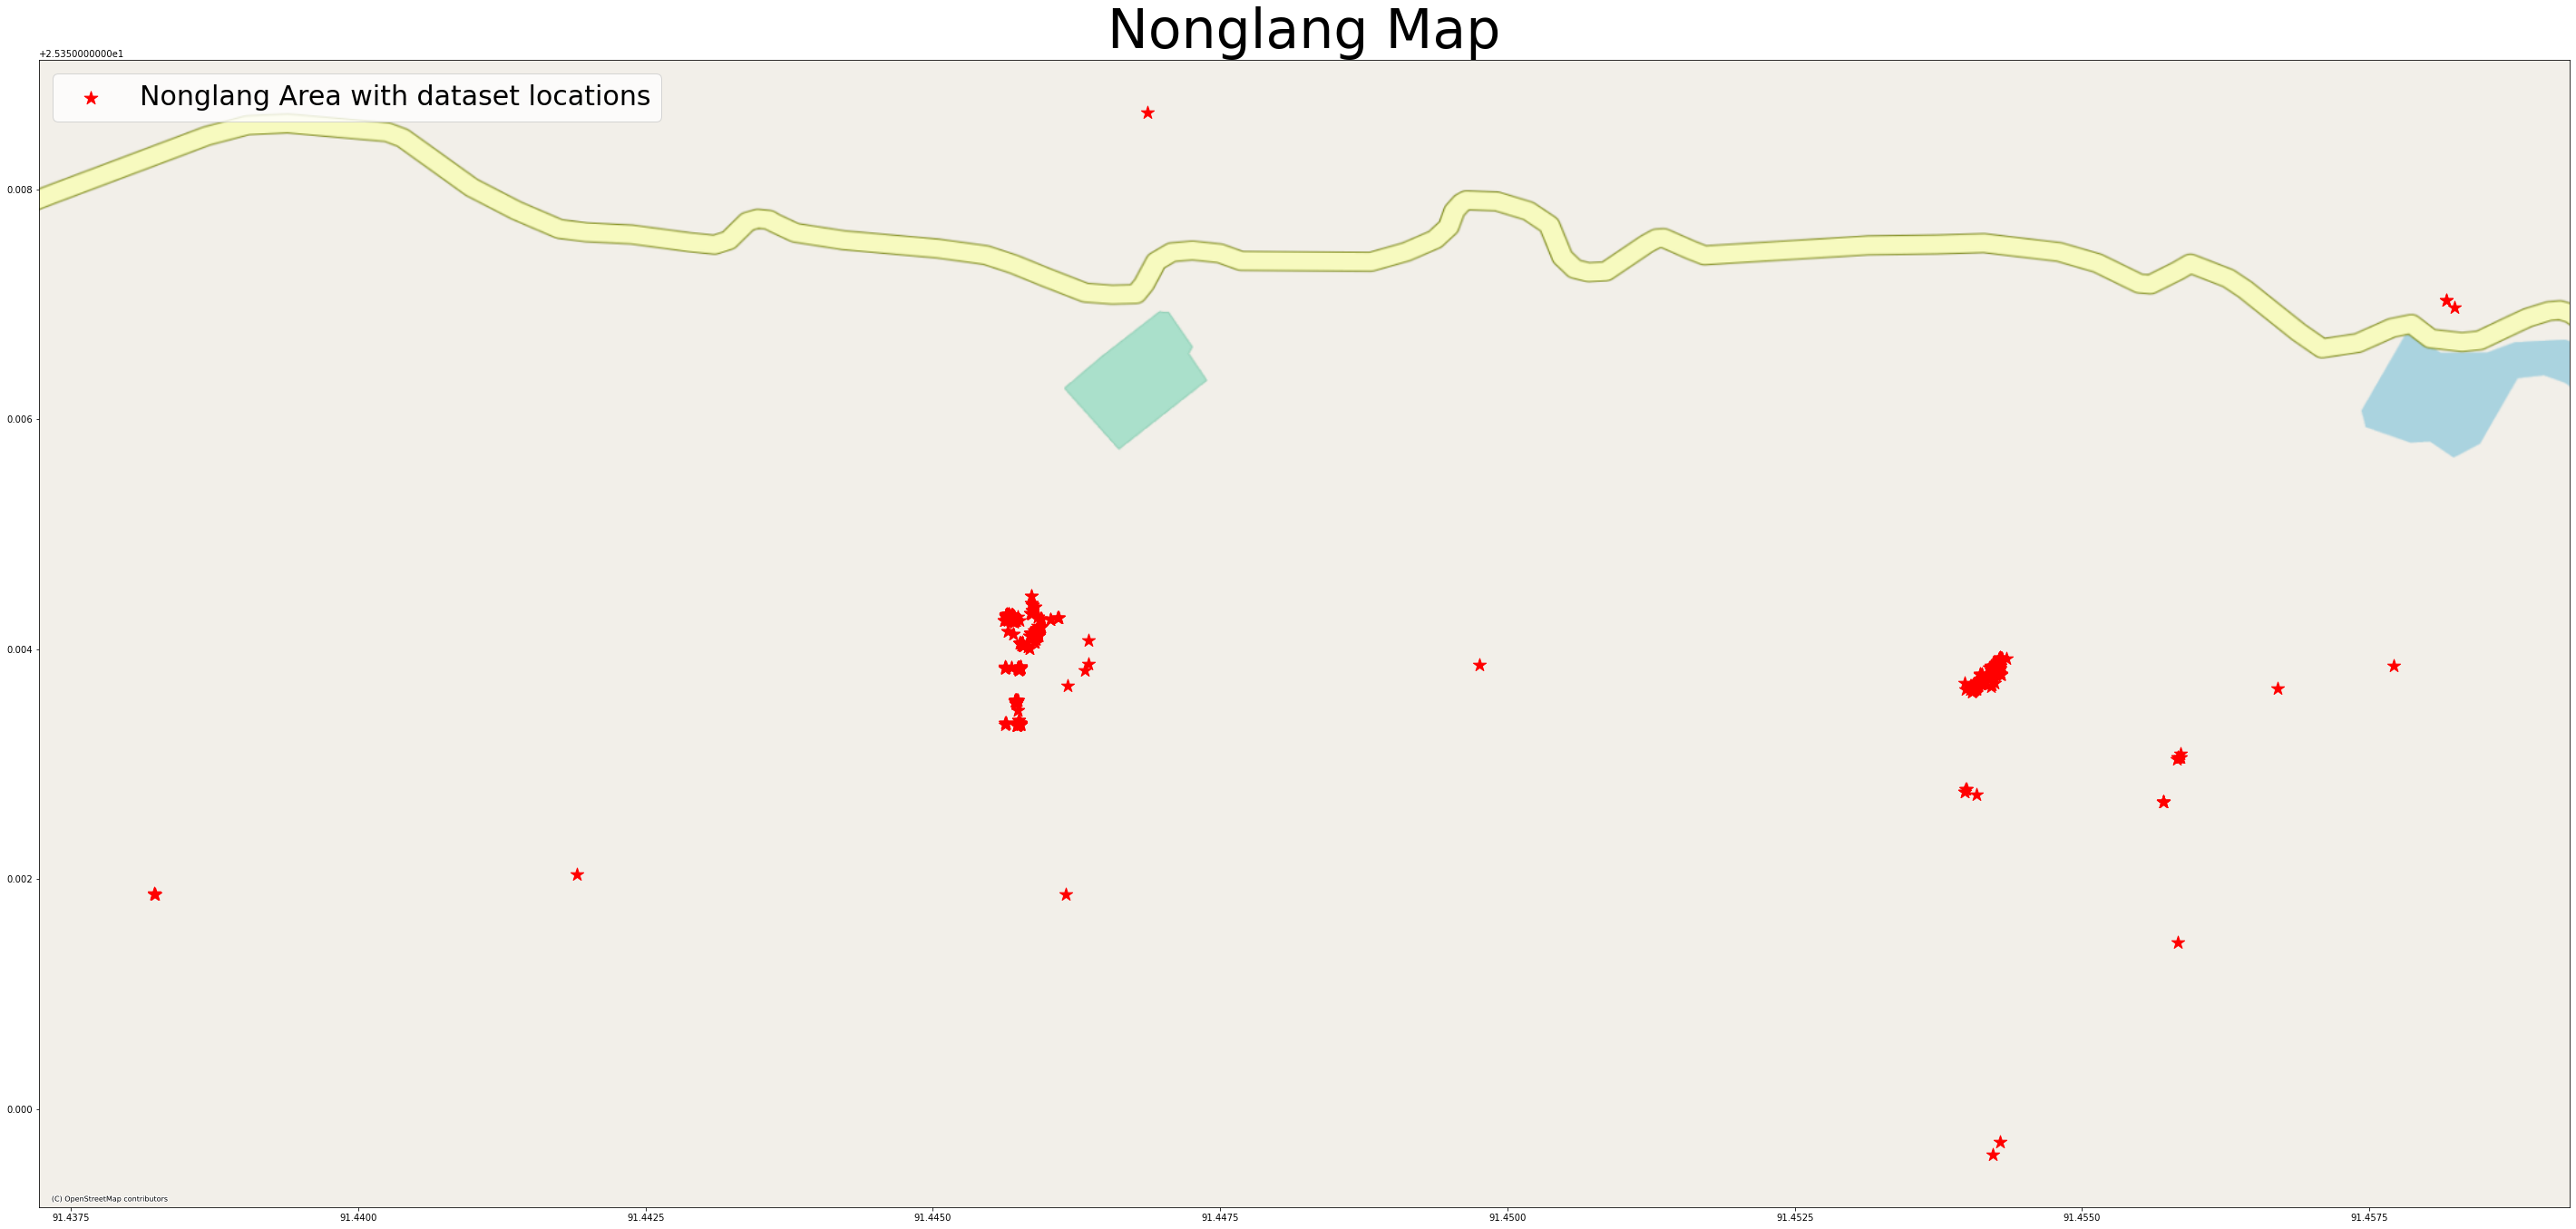

In [90]:
geometry = [Point(xy) for xy in zip(df['Longitude'],df['Latitude'])]
geo_df = gpd.GeoDataFrame(geometry = geometry)
geo_df.crs = {'init':"epsg:4326"}

# plot the marker
ax = geo_df.plot(markersize = 225, color = 'red', marker='*', label='Nonglang Area with dataset locations', zorder=3, figsize=(50, 50))

ctx.add_basemap(ax, crs=geo_df.crs.to_string(), source=ctx.providers.OpenStreetMap.Mapnik)
plt.title('Nonglang Map', fontsize=60)
lgnd = plt.legend(loc='upper left', scatterpoints=1, fontsize=30)
for l in lgnd.legendHandles:
    l._sizes = [240]
    l.set_alpha(1)
plt.show()

C:\ProgramData\Anaconda3\envs\adsEnv\lib\site-packages\pyproj\crs\crs.py:130: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)


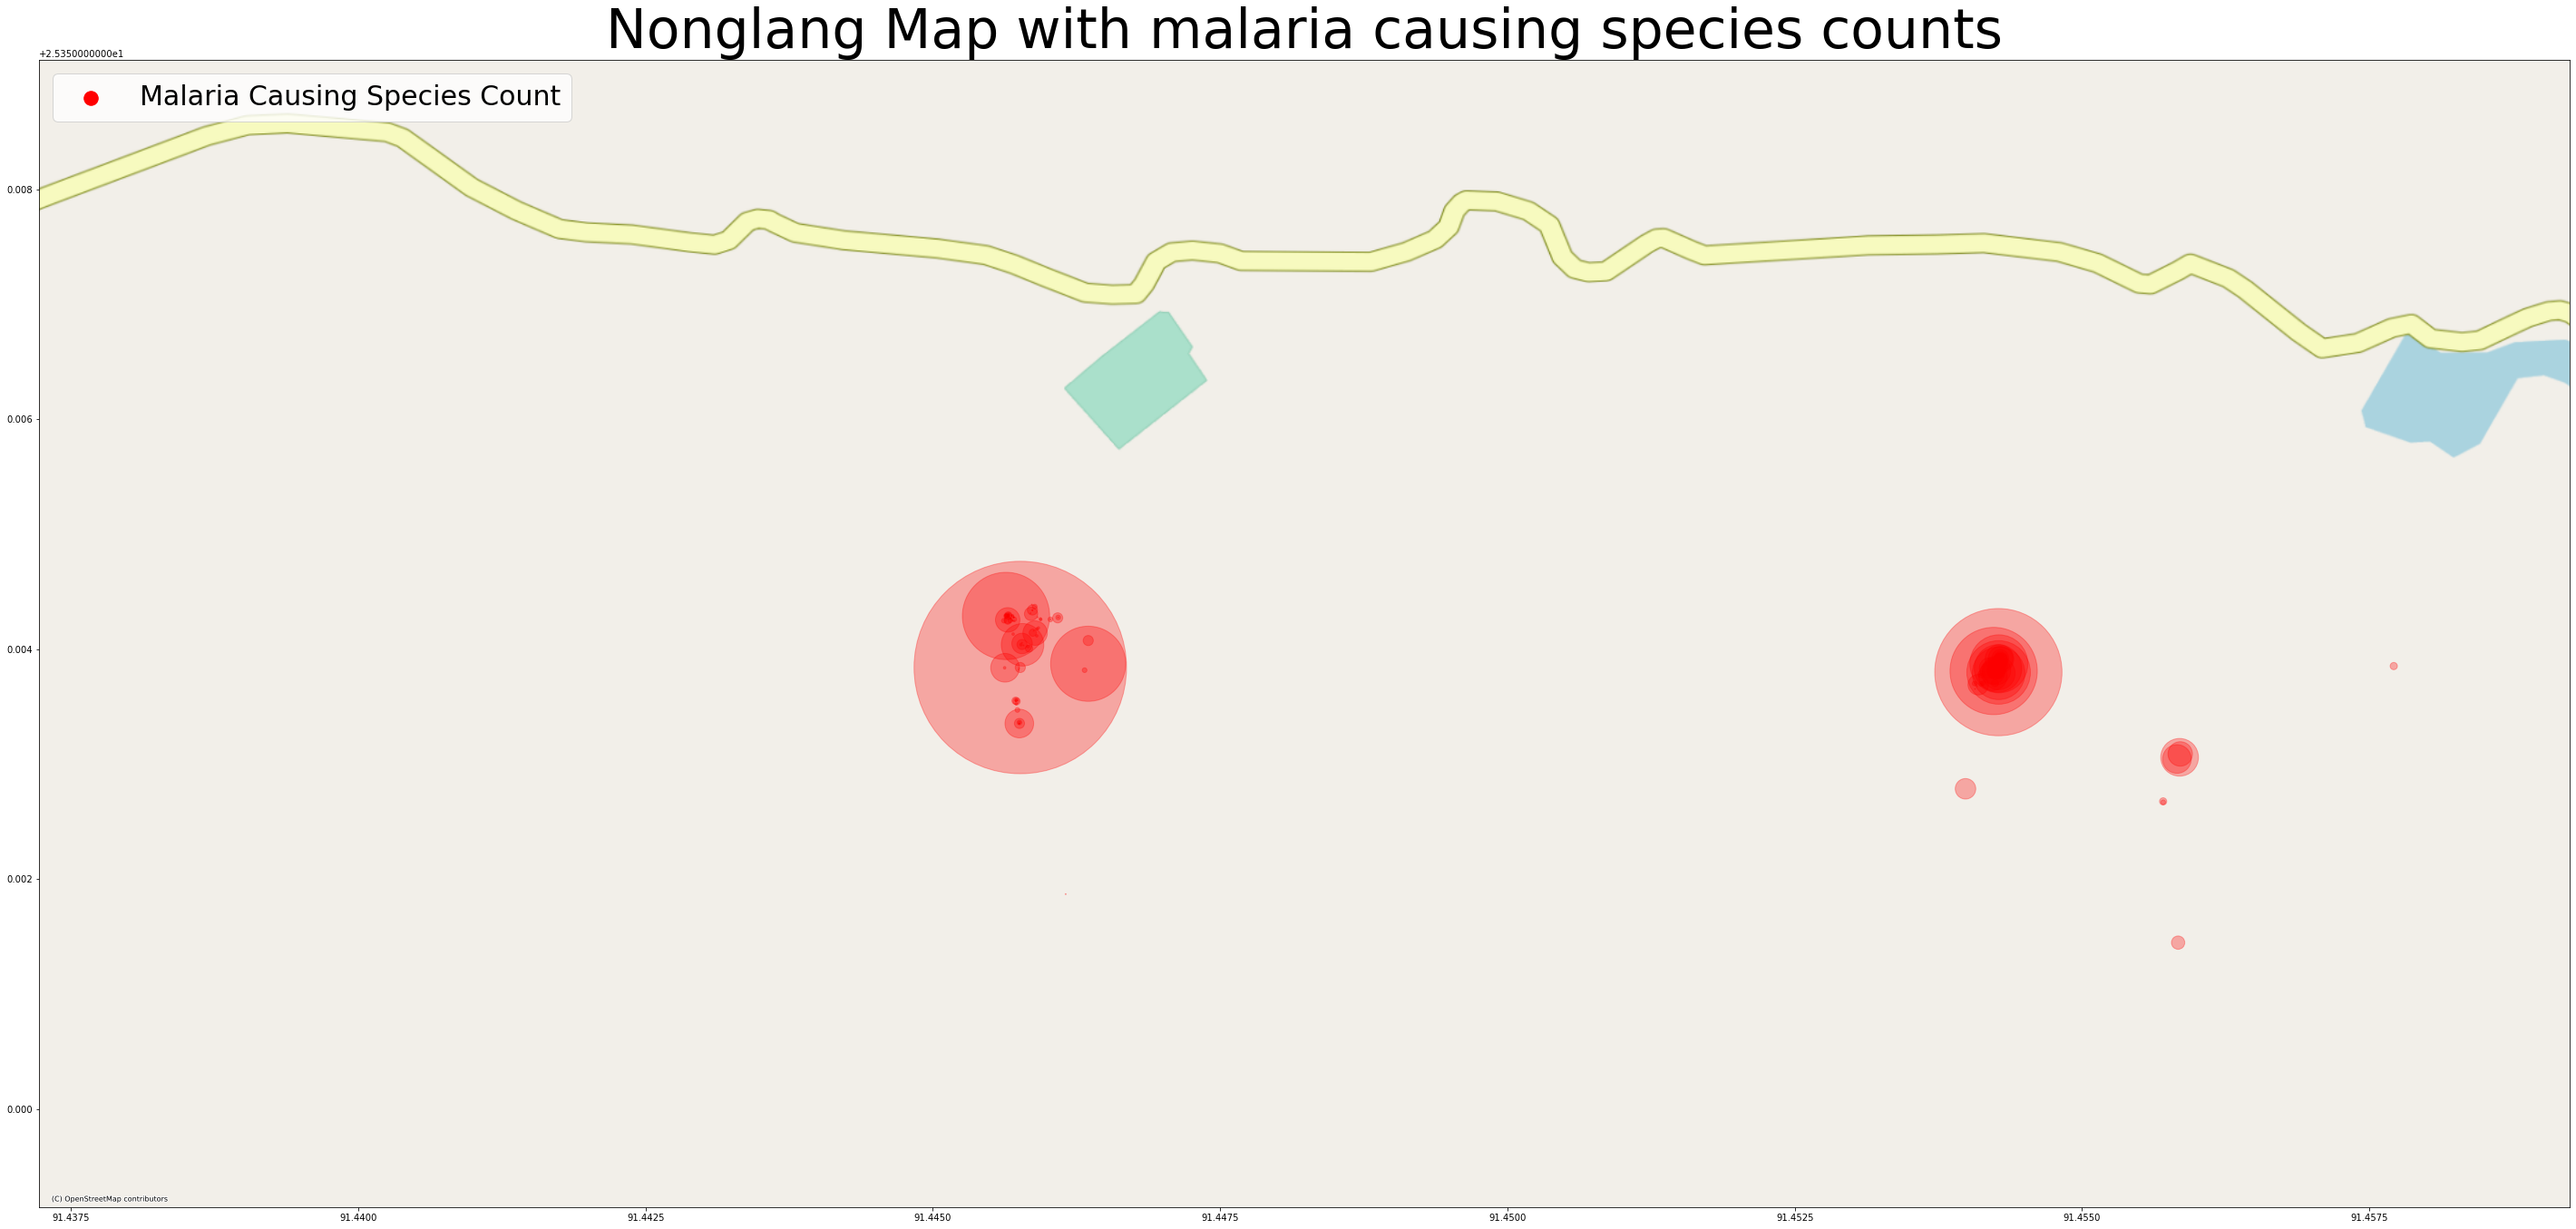

In [91]:
geometry = [Point(xy) for xy in zip(df['Longitude'],df['Latitude'])]
geo_df = gpd.GeoDataFrame(df[['species_causing_malaria']], geometry = geometry)
geo_df.crs = {'init':"epsg:4326"}

# plot the marker
ax = geo_df.plot(markersize = geo_df['species_causing_malaria'] ** 3, color = 'red',marker = 'o',label = 'Malaria Causing Species Count', zorder=3, figsize=(50, 50), alpha=0.3)

ctx.add_basemap(ax, crs=geo_df.crs.to_string(), source=ctx.providers.OpenStreetMap.Mapnik)
plt.title('Nonglang Map with malaria causing species counts', fontsize=60)
lgnd = plt.legend(loc='upper left', scatterpoints=1, fontsize=30)
for l in lgnd.legendHandles:
    l._sizes = [240]
    l.set_alpha(1)
plt.show()

C:\ProgramData\Anaconda3\envs\adsEnv\lib\site-packages\pyproj\crs\crs.py:130: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)


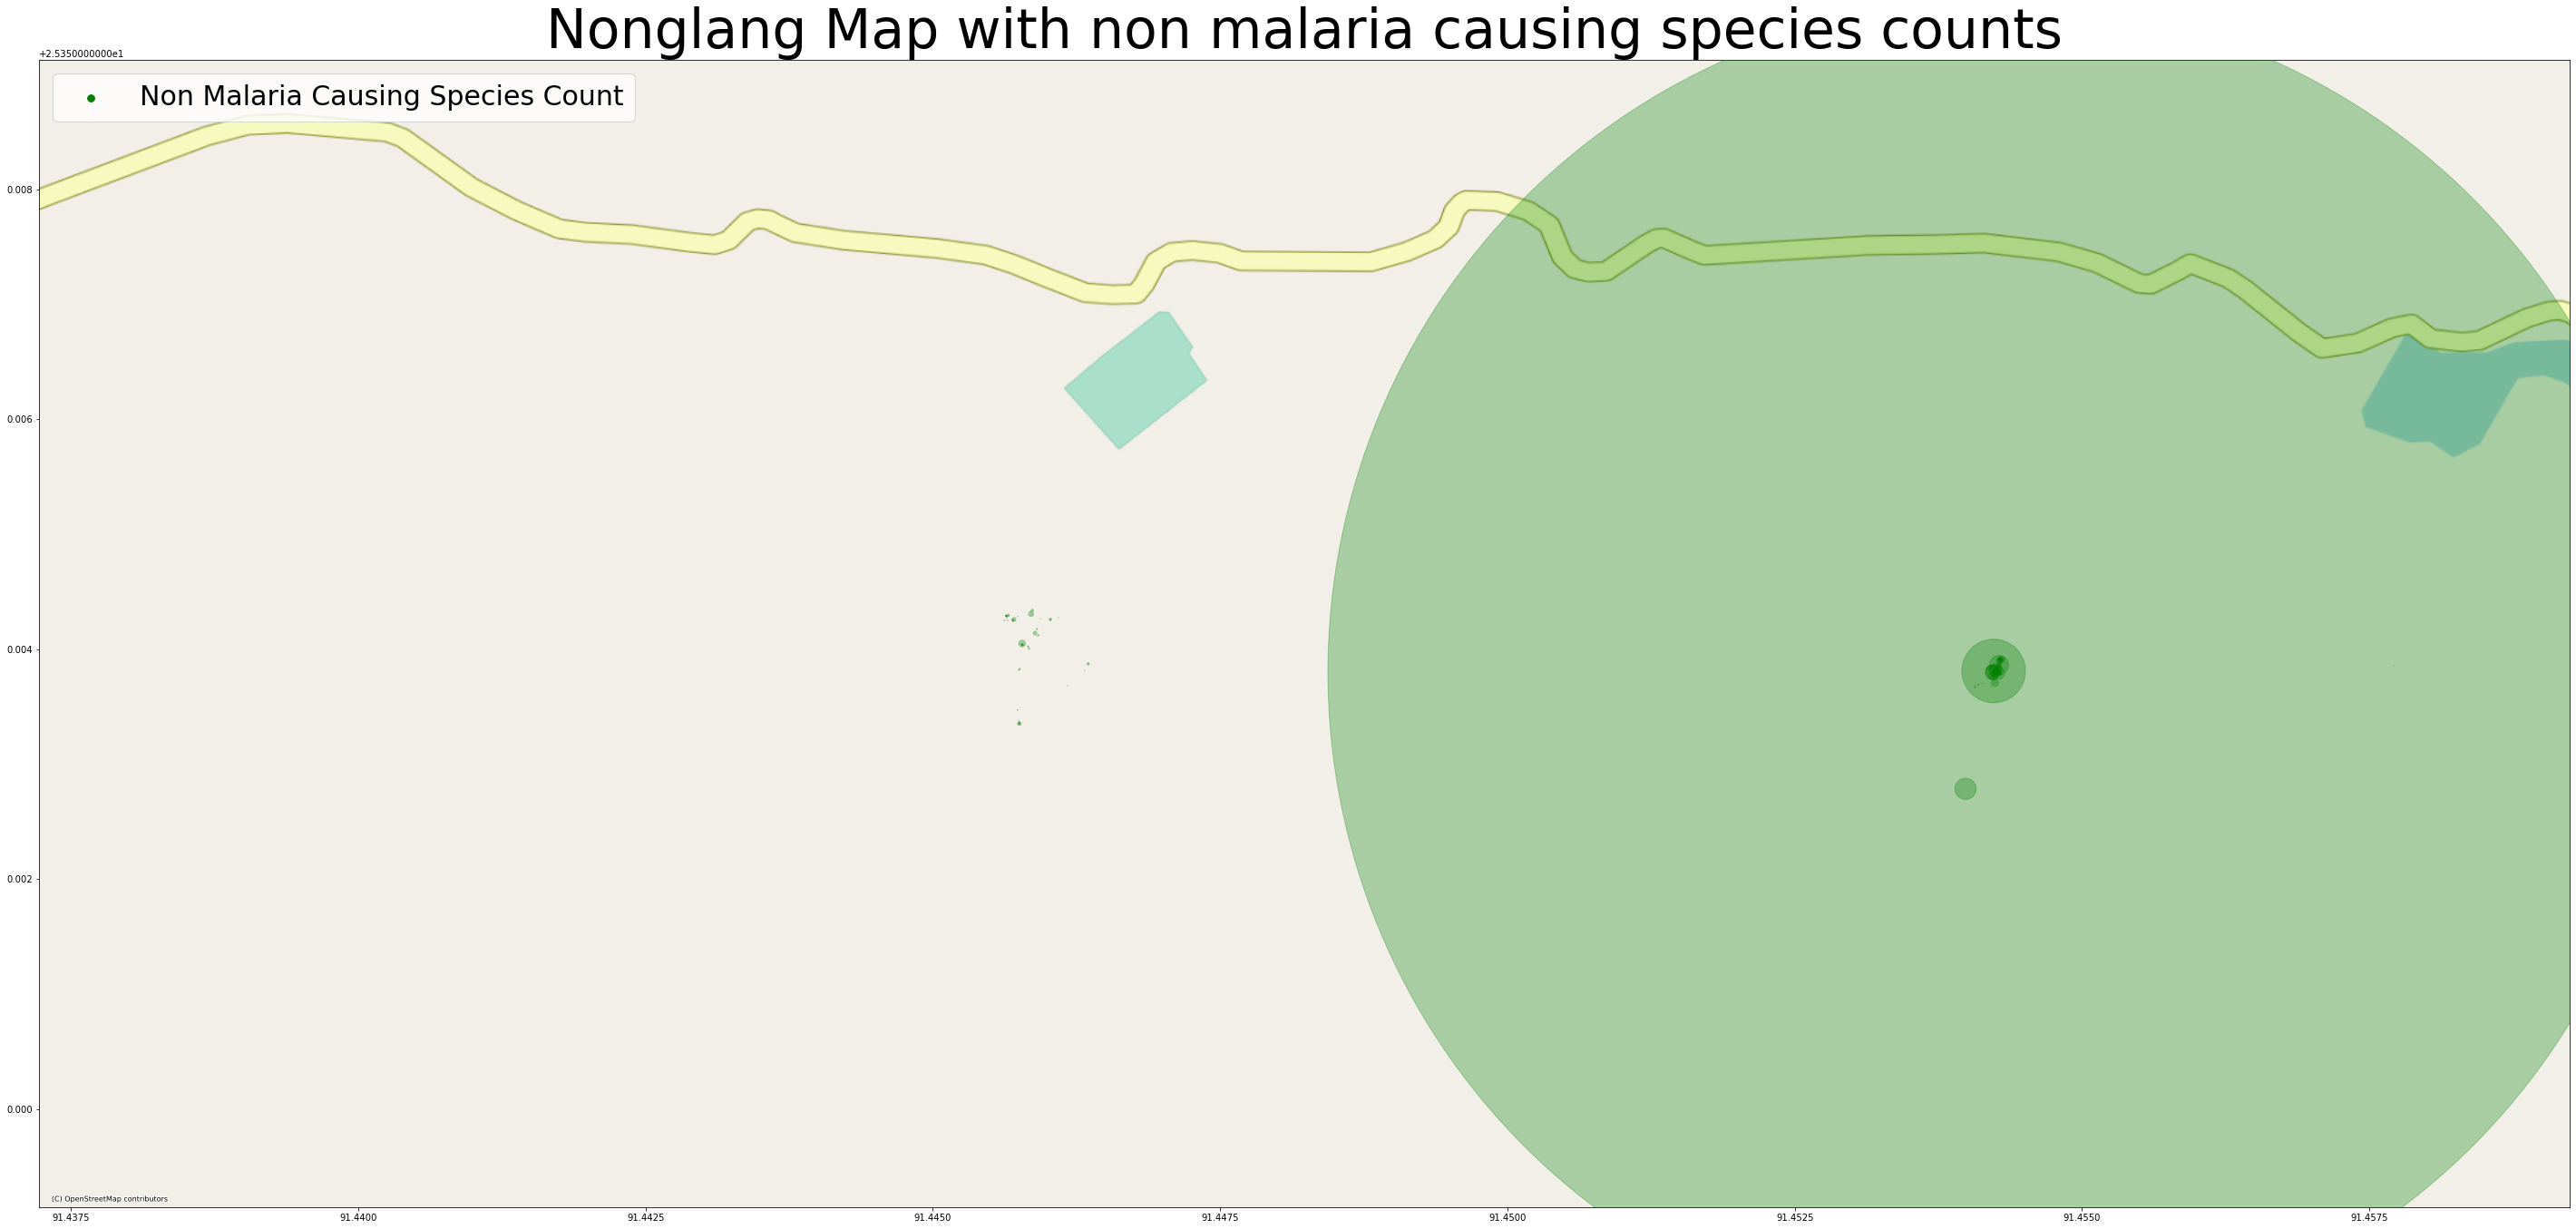

In [92]:
geometry = [Point(xy) for xy in zip(df['Longitude'],df['Latitude'])]
geo_df = gpd.GeoDataFrame(df[['species_not_causing_malaria']], geometry = geometry)
geo_df.crs = {'init':"epsg:4326"}

# plot the marker
ax = geo_df.plot(markersize = geo_df['species_not_causing_malaria'] ** 3, color = 'green', marker = '.', label = 'Non Malaria Causing Species Count', zorder=3, figsize=(50, 50), alpha=0.3)

ctx.add_basemap(ax, crs=geo_df.crs.to_string(), source=ctx.providers.OpenStreetMap.Mapnik)
plt.title('Nonglang Map with non malaria causing species counts', fontsize=60)
lgnd = plt.legend(loc='upper left', scatterpoints=1, fontsize=30)
for l in lgnd.legendHandles:
    l._sizes = [240]
    l.set_alpha(1)
plt.show()

C:\ProgramData\Anaconda3\envs\adsEnv\lib\site-packages\pyproj\crs\crs.py:130: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)


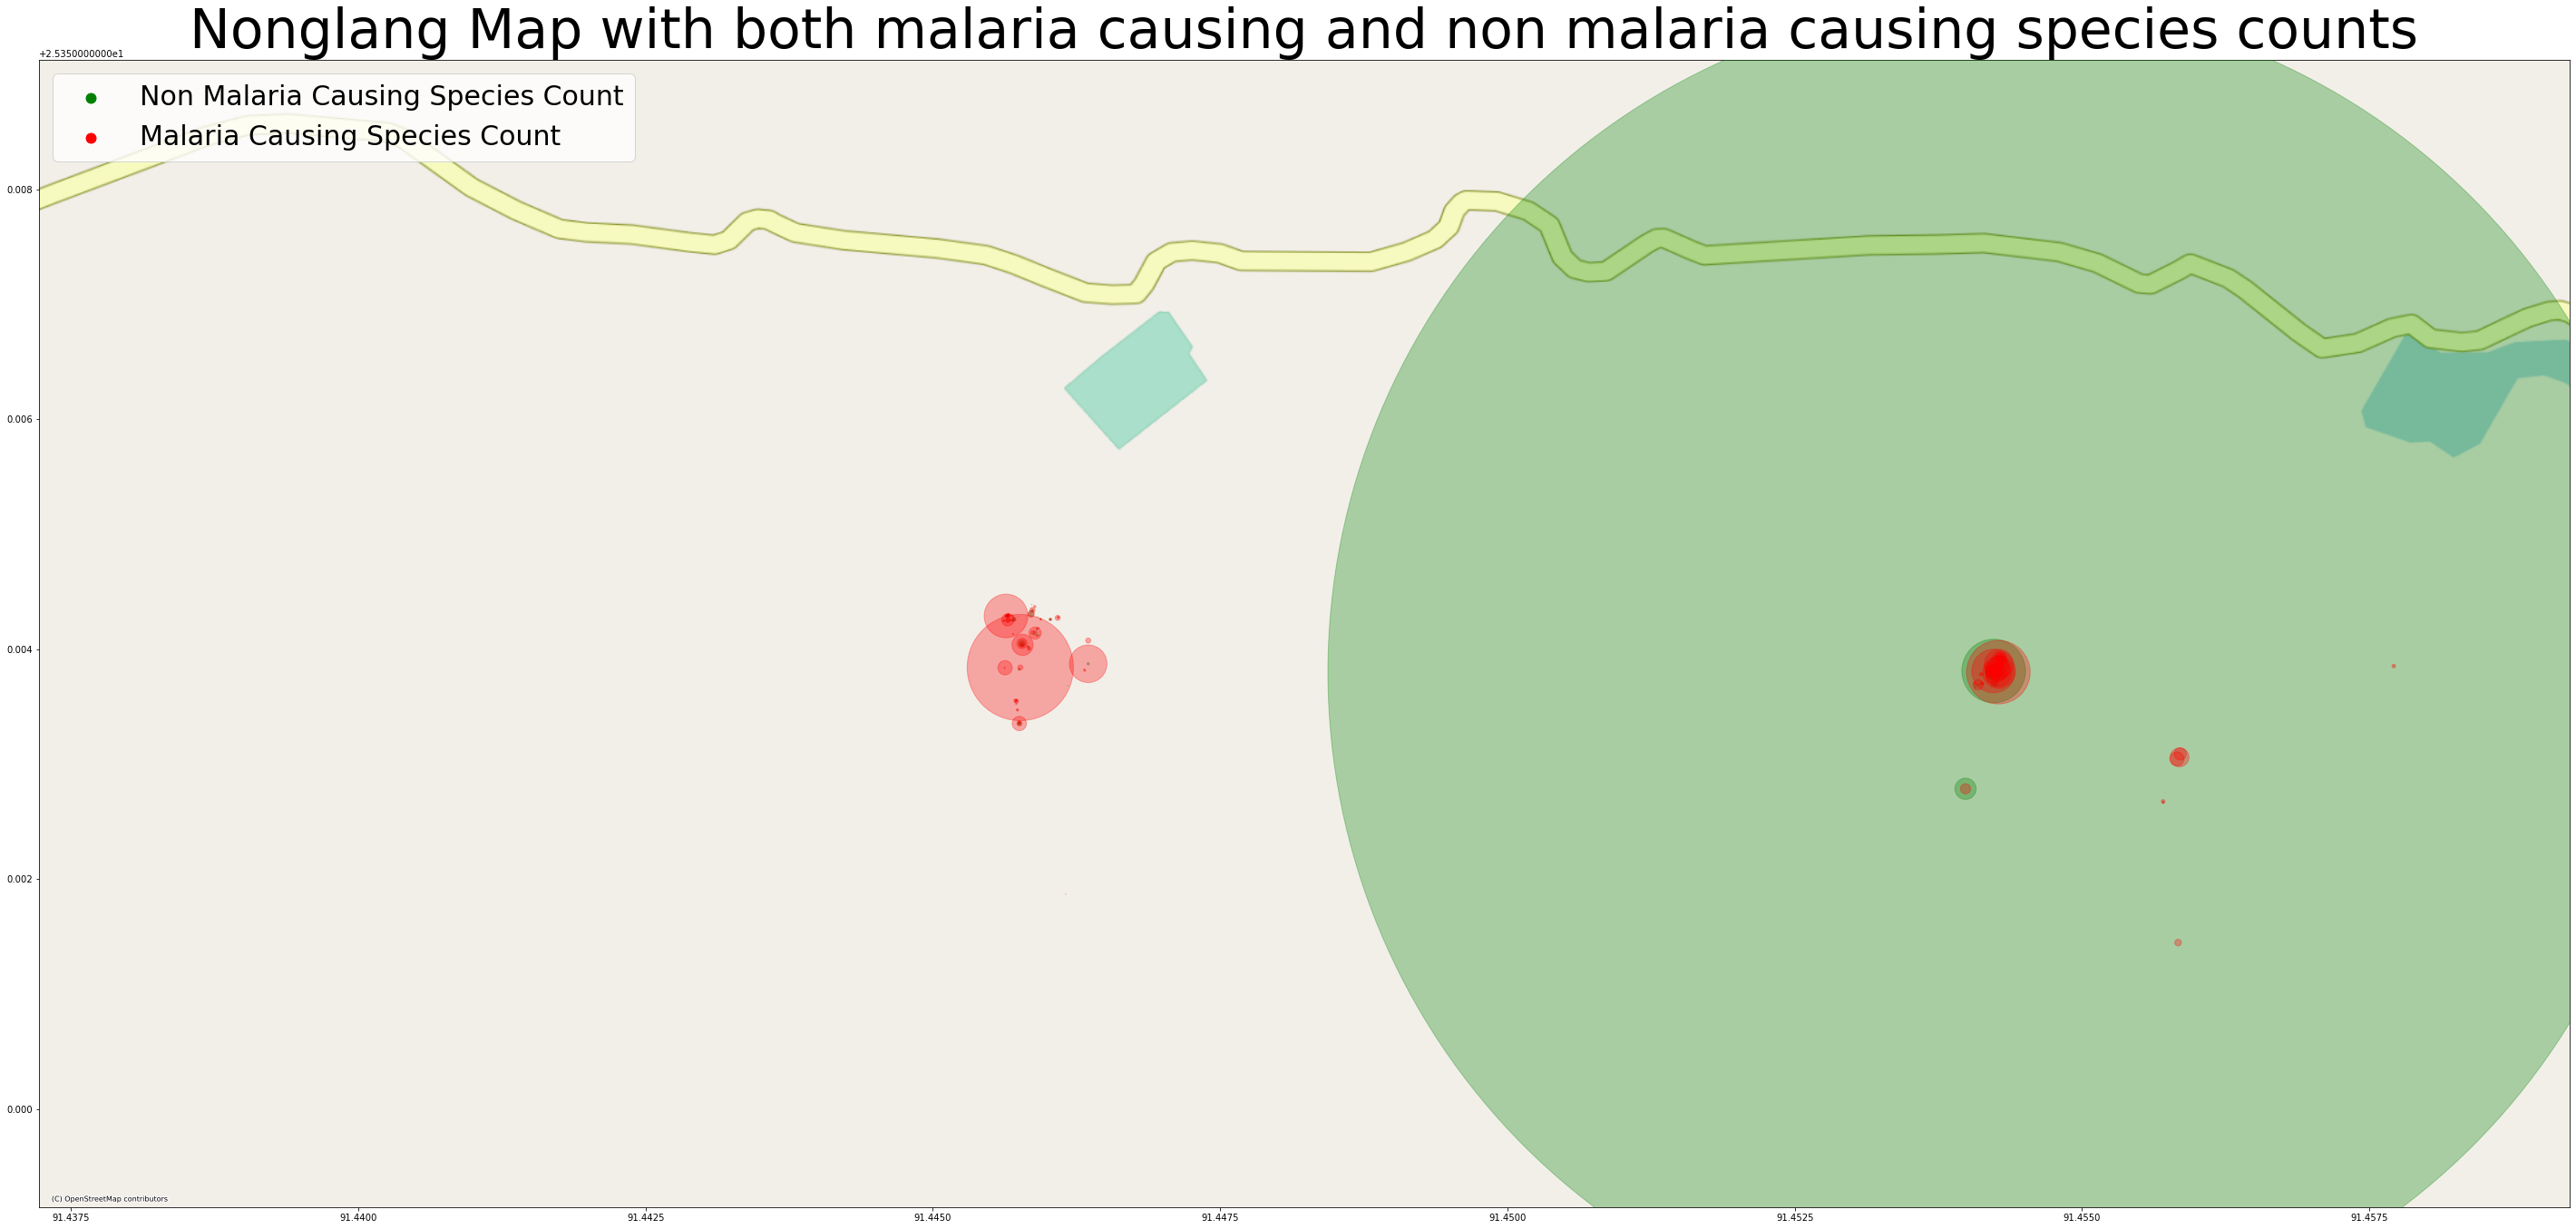

In [93]:
geometry = [Point(xy) for xy in zip(df['Longitude'],df['Latitude'])]
geo_df = gpd.GeoDataFrame(df[['species_not_causing_malaria', 'species_causing_malaria']], geometry = geometry)
geo_df.crs = {'init':"epsg:4326"}

# plot the marker
ax = geo_df.plot(markersize = geo_df['species_not_causing_malaria'] ** 3, color = 'green', marker = '.', label = 'Non Malaria Causing Species Count', zorder=3, figsize=(50, 50), alpha=0.3)
ax = geo_df.plot(markersize = geo_df['species_causing_malaria'] ** 3, color = 'red', marker = '.', label = 'Malaria Causing Species Count', zorder=4, ax=ax, alpha=0.3)

ctx.add_basemap(ax, crs=geo_df.crs.to_string(), source=ctx.providers.OpenStreetMap.Mapnik)
plt.title('Nonglang Map with both malaria causing and non malaria causing species counts', fontsize=60)
lgnd = plt.legend(loc='upper left', scatterpoints=1, fontsize=30)
for l in lgnd.legendHandles:
    l._sizes = [480]
    l.set_alpha(1)
plt.show()

In [94]:
all_species = [s for s in df.columns if s.startswith('species') and len(s.split('_')) == 2]

C:\ProgramData\Anaconda3\envs\adsEnv\lib\site-packages\pyproj\crs\crs.py:130: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)


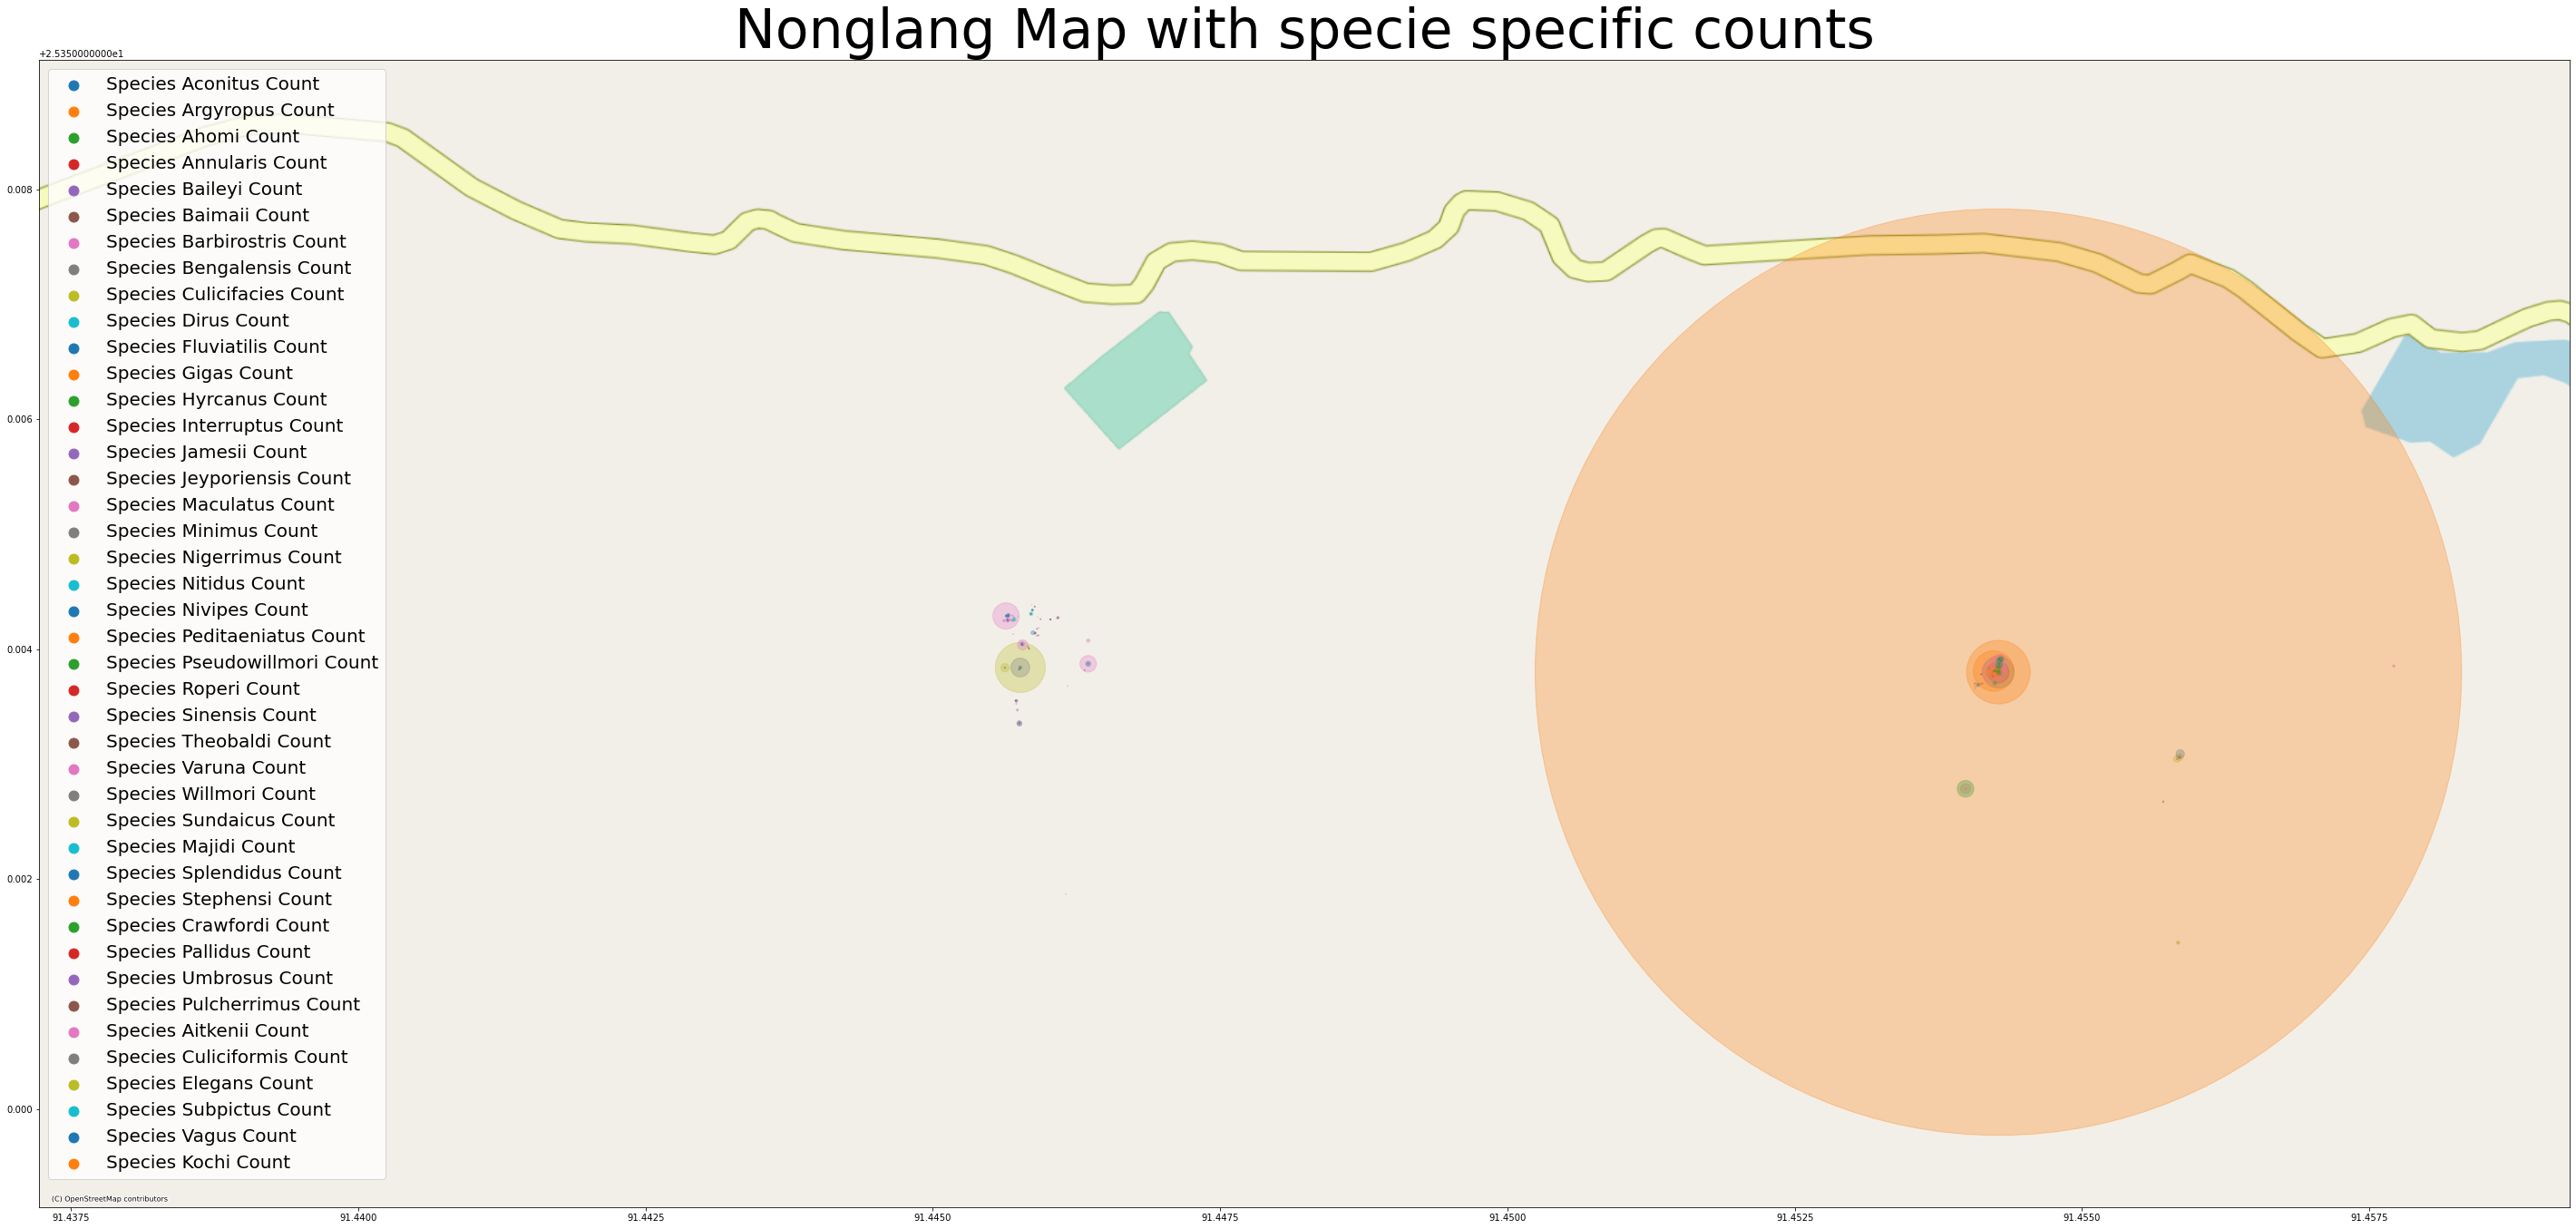

In [95]:
geometry = [Point(xy) for xy in zip(df['Longitude'],df['Latitude'])]
geo_df = gpd.GeoDataFrame(df[all_species], geometry = geometry)
geo_df.crs = {'init':"epsg:4326"}

# plot the marker
ax = geo_df.plot(markersize = geo_df[all_species[0]] ** 3, marker = '.', label = f"{' '.join(all_species[0].split('_')).title()} Count", zorder=3, figsize=(50, 50), alpha=0.3)
for i in range(1, len(all_species)):
    ax = geo_df.plot(markersize = geo_df[all_species[i]] ** 3, marker = '.', label = f"{' '.join(all_species[i].split('_')).title()} Count", zorder=3+i, ax=ax, alpha=0.3)

ctx.add_basemap(ax, crs=geo_df.crs.to_string(), source=ctx.providers.OpenStreetMap.Mapnik)
plt.title('Nonglang Map with specie specific counts', fontsize=60)
lgnd = plt.legend(loc='upper left', scatterpoints=1, fontsize=20)
for l in lgnd.legendHandles:
    l._sizes = [480]
    l.set_alpha(1)
plt.show()

In [96]:
def plot_clustered_stacked(dfall, labels=None, title="multiple stacked bar plot",  H="/", **kwargs):
    """Given a list of dataframes, with identical columns and index, create a clustered stacked bar plot. 
labels is a list of the names of the dataframe, used for the legend
title is a string for the title of the plot
H is the hatch used for identification of the different dataframe"""

    n_df = len(dfall)
    n_col = len(dfall[0].columns) 
    n_ind = len(dfall[0].index)
    axe = plt.subplot(111)

    for df in dfall : # for each data frame
        axe = df.plot(kind="bar",
                      linewidth=0,
                      stacked=True,
                      ax=axe,
                      legend=False,
                      grid=False,
                      **kwargs)  # make bar plots

    h,l = axe.get_legend_handles_labels() # get the handles we want to modify
    for i in range(0, n_df * n_col, n_col): # len(h) = n_col * n_df
        for j, pa in enumerate(h[i:i+n_col]):
            for rect in pa.patches: # for each index
                rect.set_x(rect.get_x() + 1 / float(n_df + 1) * i / float(n_col))
                rect.set_hatch(H * int(i / n_col)) #edited part     
                rect.set_width(1 / float(n_df + 1))

    axe.set_xticks((np.arange(0, 2 * n_ind, 2) + 1 / float(n_df + 1)) / 2.)
    axe.set_xticklabels(df.index, rotation = 0)
    axe.set_title(title, fontsize=24)

    # Add invisible data to add another legend
    n=[]        
    for i in range(n_df):
        n.append(axe.bar(0, 0, color="gray", hatch=H * i))

    l1 = axe.legend(h[:n_col], l[:n_col], loc=[1.01, 0.5], fontsize=16)
    if labels is not None:
        l2 = plt.legend(n, labels, loc=[1.01, 0.1], fontsize=16) 
    axe.add_artist(l1)
    return axe

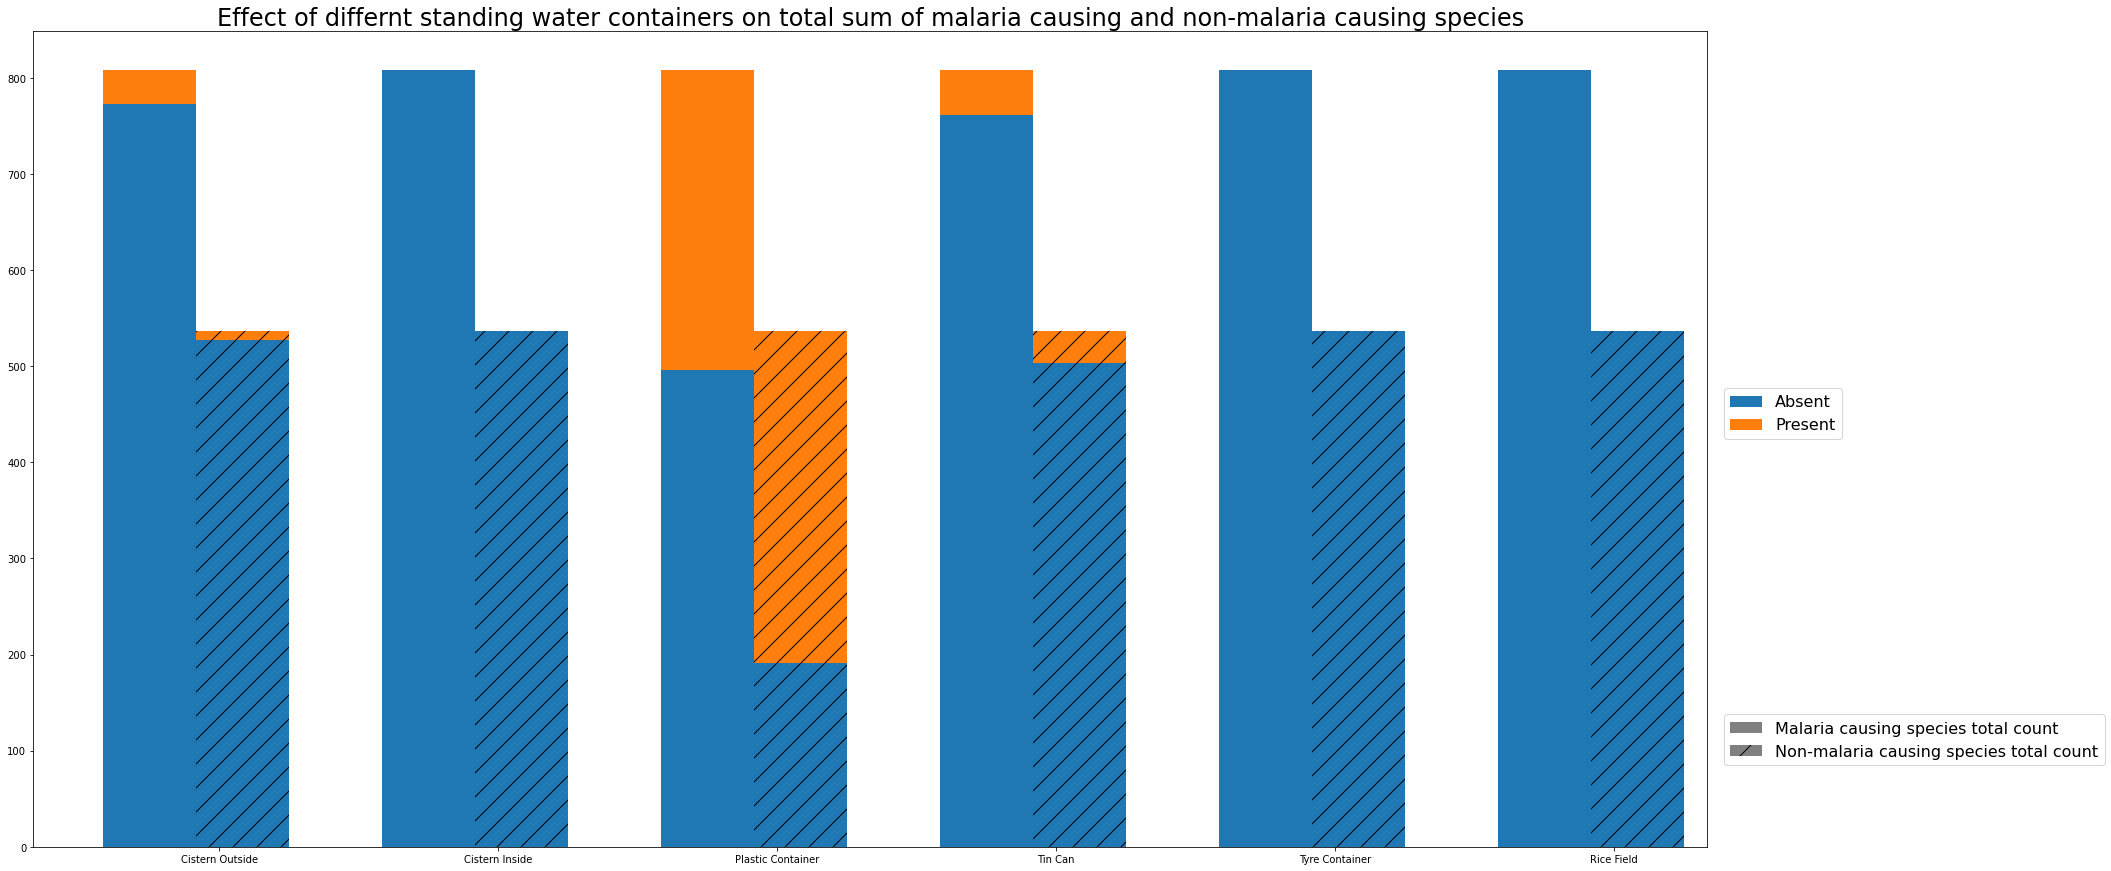

In [97]:
idx_bases = [s for s in df.columns if s.startswith('standing_water')]
index_vals = [' '.join(idx.split('_')[2:]).title() for idx in idx_bases]
col_vals = ['Absent', 'Present']
data_malaria = []
data_non_malaria = []
for col in idx_bases:
    data_malaria.append([df[df[col] == 0]['species_causing_malaria'].sum(), df[df[col] == 1]['species_causing_malaria'].sum()])
    data_non_malaria.append([df[df[col] == 0]['species_not_causing_malaria'].sum(), df[df[col] == 1]['species_not_causing_malaria'].sum()])
df_malaria = pd.DataFrame(data_malaria, index=index_vals, columns=col_vals)
df_non_malaria = pd.DataFrame(data_non_malaria, index=index_vals, columns=col_vals)

plt.figure(figsize=(30, 15))
plot_clustered_stacked([df_malaria, df_non_malaria], ['Malaria causing species total count', 'Non-malaria causing species total count'], 'Effect of differnt standing water containers on total sum of malaria causing and non-malaria causing species')
plt.show()

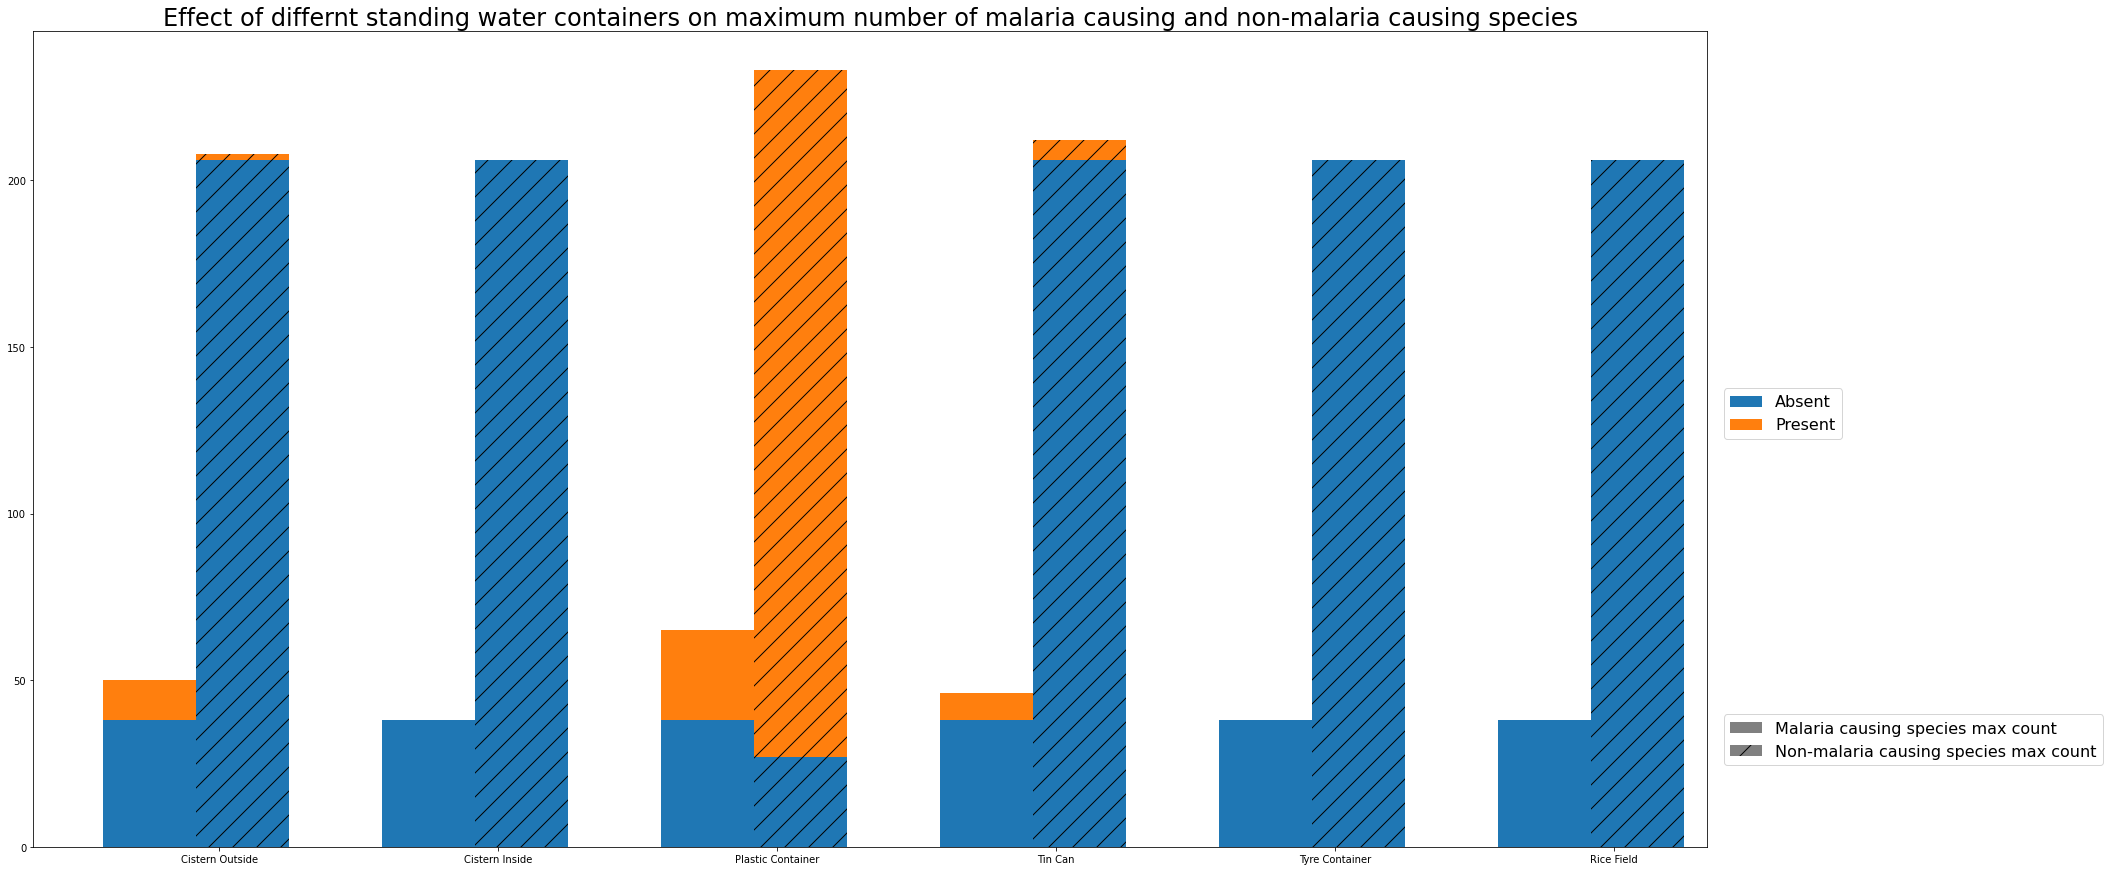

In [98]:
idx_bases = [s for s in df.columns if s.startswith('standing_water')]
index_vals = [' '.join(idx.split('_')[2:]).title() for idx in idx_bases]
col_vals = ['Absent', 'Present']
data_malaria = []
data_non_malaria = []
for col in idx_bases:
    data_malaria.append([df[df[col] == 0]['species_causing_malaria'].max(), df[df[col] == 1]['species_causing_malaria'].max()])
    data_non_malaria.append([df[df[col] == 0]['species_not_causing_malaria'].max(), df[df[col] == 1]['species_not_causing_malaria'].max()])
df_malaria = pd.DataFrame(data_malaria, index=index_vals, columns=col_vals)
df_non_malaria = pd.DataFrame(data_non_malaria, index=index_vals, columns=col_vals)

plt.figure(figsize=(30, 15))
plot_clustered_stacked([df_malaria, df_non_malaria], ['Malaria causing species max count', 'Non-malaria causing species max count'], 'Effect of differnt standing water containers on maximum number of malaria causing and non-malaria causing species')
plt.show()

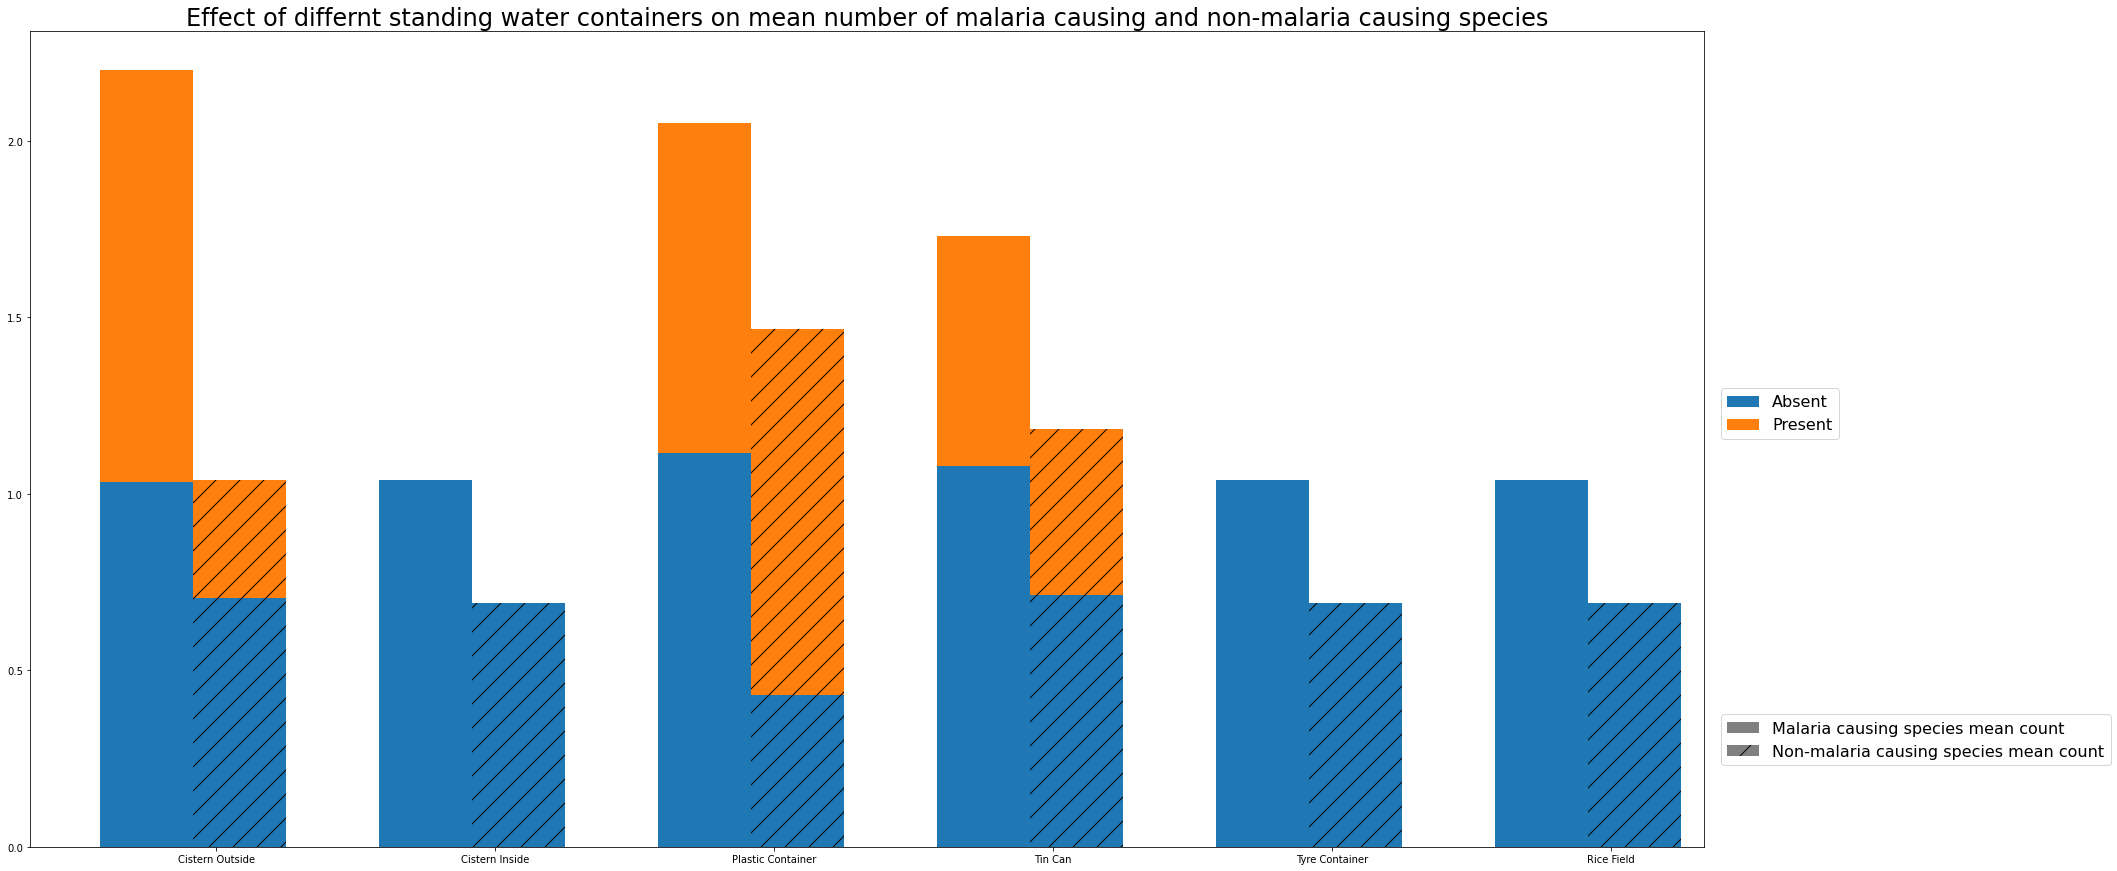

In [99]:
idx_bases = [s for s in df.columns if s.startswith('standing_water')]
index_vals = [' '.join(idx.split('_')[2:]).title() for idx in idx_bases]
col_vals = ['Absent', 'Present']
data_malaria = []
data_non_malaria = []
for col in idx_bases:
    data_malaria.append([df[df[col] == 0]['species_causing_malaria'].mean(), df[df[col] == 1]['species_causing_malaria'].mean()])
    data_non_malaria.append([df[df[col] == 0]['species_not_causing_malaria'].mean(), df[df[col] == 1]['species_not_causing_malaria'].mean()])
df_malaria = pd.DataFrame(data_malaria, index=index_vals, columns=col_vals)
df_non_malaria = pd.DataFrame(data_non_malaria, index=index_vals, columns=col_vals)

plt.figure(figsize=(30, 15))
plot_clustered_stacked([df_malaria, df_non_malaria], ['Malaria causing species mean count', 'Non-malaria causing species mean count'], 'Effect of differnt standing water containers on mean number of malaria causing and non-malaria causing species')
plt.show()

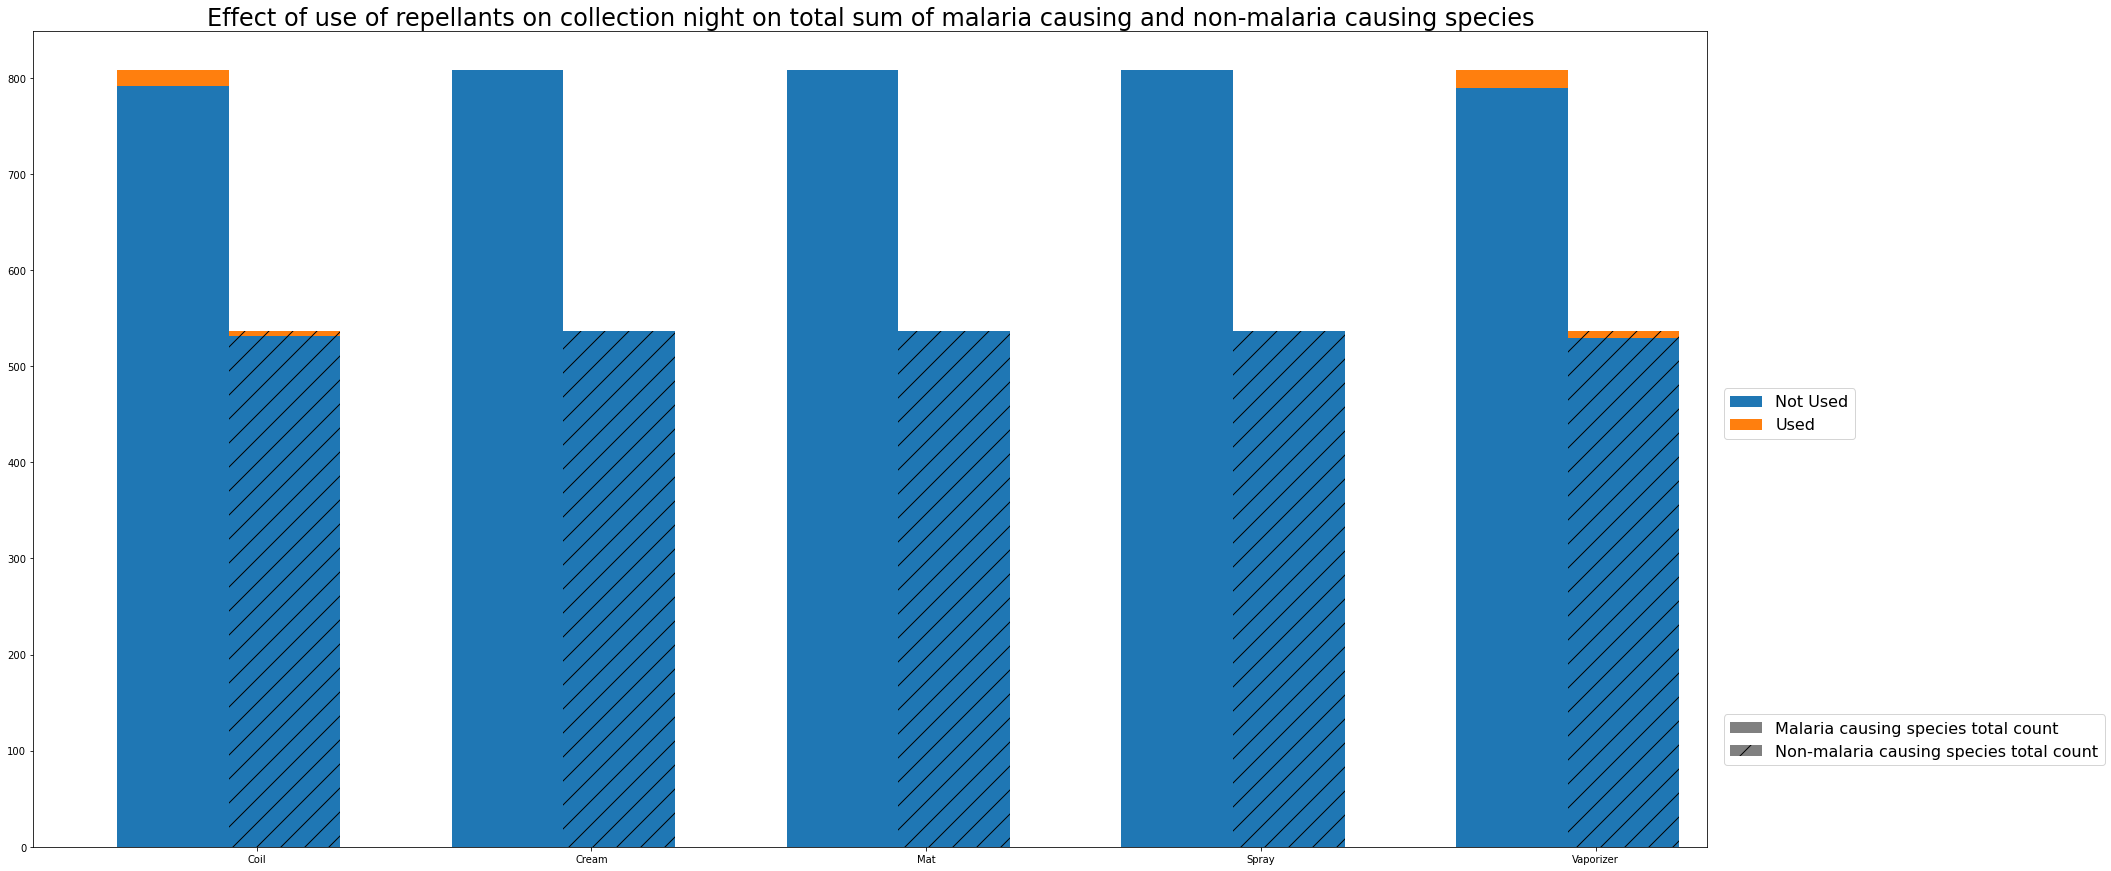

In [100]:
idx_bases = [s for s in df.columns if s.startswith('repellant_')]
index_vals = [' '.join(idx.split('_')[1:]).title() for idx in idx_bases]
col_vals = ['Not Used', 'Used']
data_malaria = []
data_non_malaria = []
for col in idx_bases:
    data_malaria.append([df[df[col] == 0]['species_causing_malaria'].sum(), df[df[col] == 1]['species_causing_malaria'].sum()])
    data_non_malaria.append([df[df[col] == 0]['species_not_causing_malaria'].sum(), df[df[col] == 1]['species_not_causing_malaria'].sum()])
df_malaria = pd.DataFrame(data_malaria, index=index_vals, columns=col_vals)
df_non_malaria = pd.DataFrame(data_non_malaria, index=index_vals, columns=col_vals)

plt.figure(figsize=(30, 15))
plot_clustered_stacked([df_malaria, df_non_malaria], ['Malaria causing species total count', 'Non-malaria causing species total count'], 'Effect of use of repellants on collection night on total sum of malaria causing and non-malaria causing species')
plt.show()

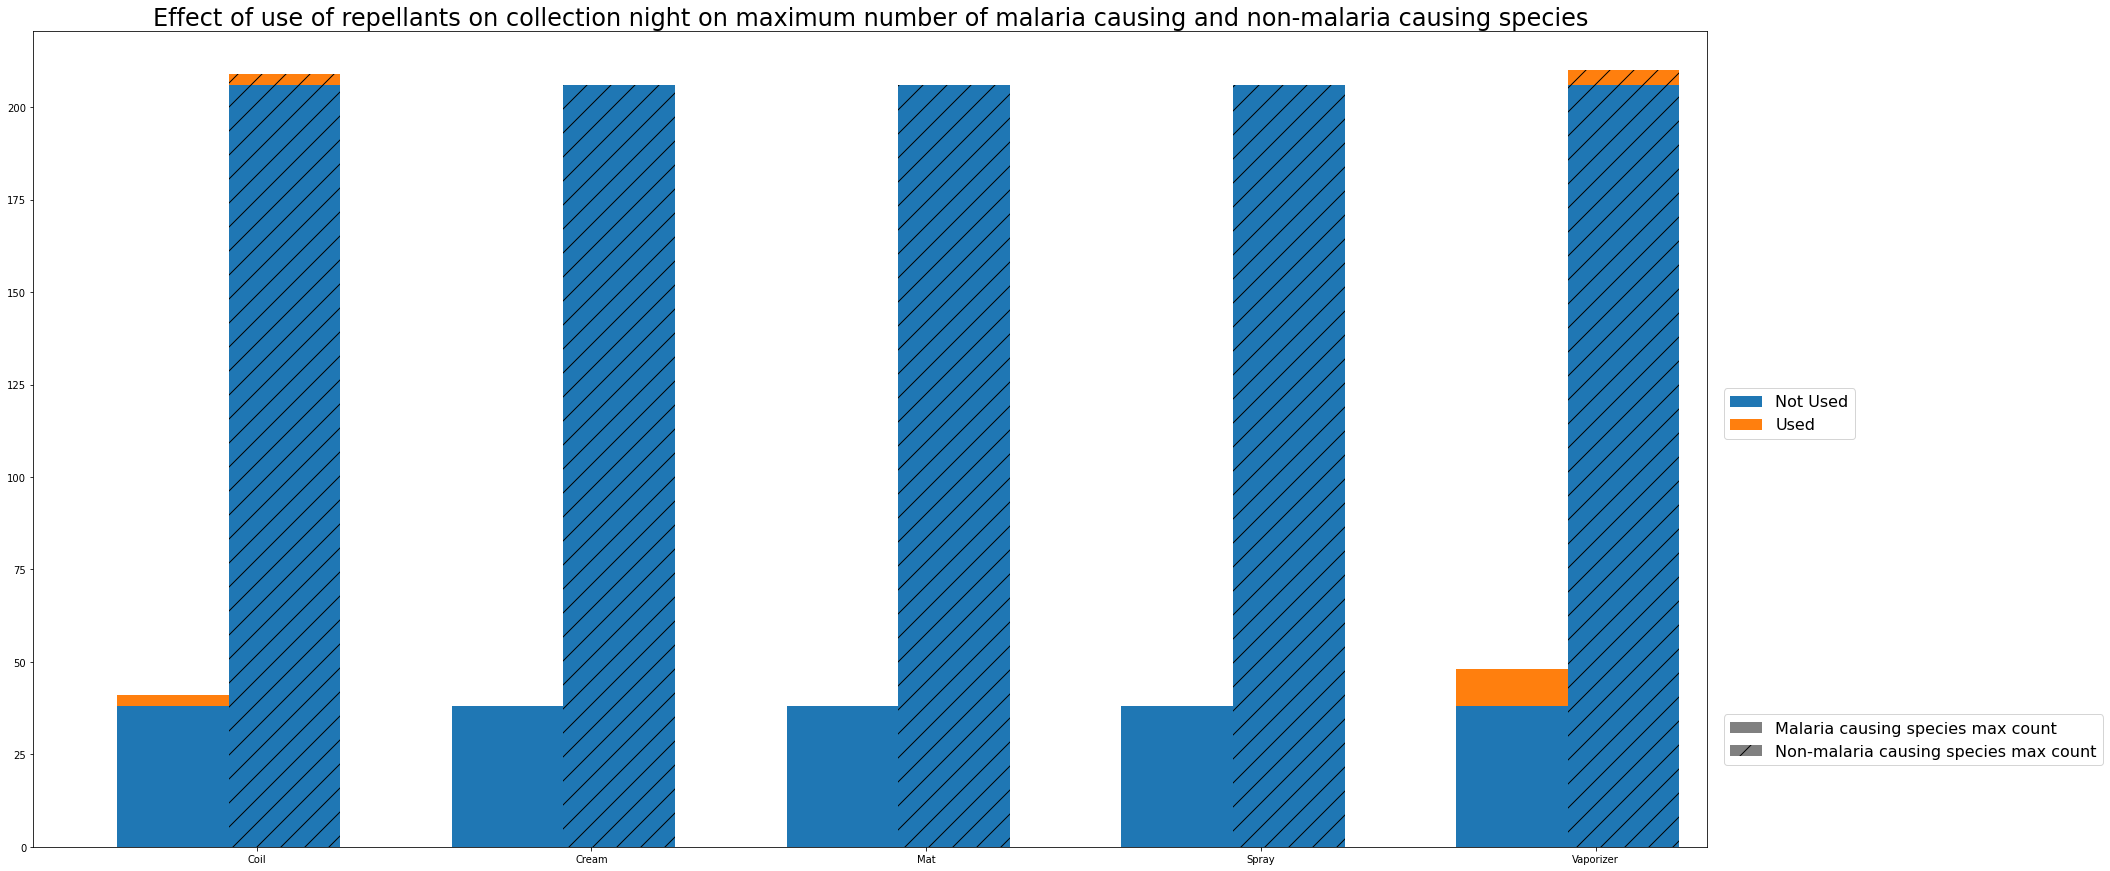

In [101]:
idx_bases = [s for s in df.columns if s.startswith('repellant_')]
index_vals = [' '.join(idx.split('_')[1:]).title() for idx in idx_bases]
col_vals = ['Not Used', 'Used']
data_malaria = []
data_non_malaria = []
for col in idx_bases:
    data_malaria.append([df[df[col] == 0]['species_causing_malaria'].max(), df[df[col] == 1]['species_causing_malaria'].max()])
    data_non_malaria.append([df[df[col] == 0]['species_not_causing_malaria'].max(), df[df[col] == 1]['species_not_causing_malaria'].max()])
df_malaria = pd.DataFrame(data_malaria, index=index_vals, columns=col_vals)
df_non_malaria = pd.DataFrame(data_non_malaria, index=index_vals, columns=col_vals)

plt.figure(figsize=(30, 15))
plot_clustered_stacked([df_malaria, df_non_malaria], ['Malaria causing species max count', 'Non-malaria causing species max count'], 'Effect of use of repellants on collection night on maximum number of malaria causing and non-malaria causing species')
plt.show()

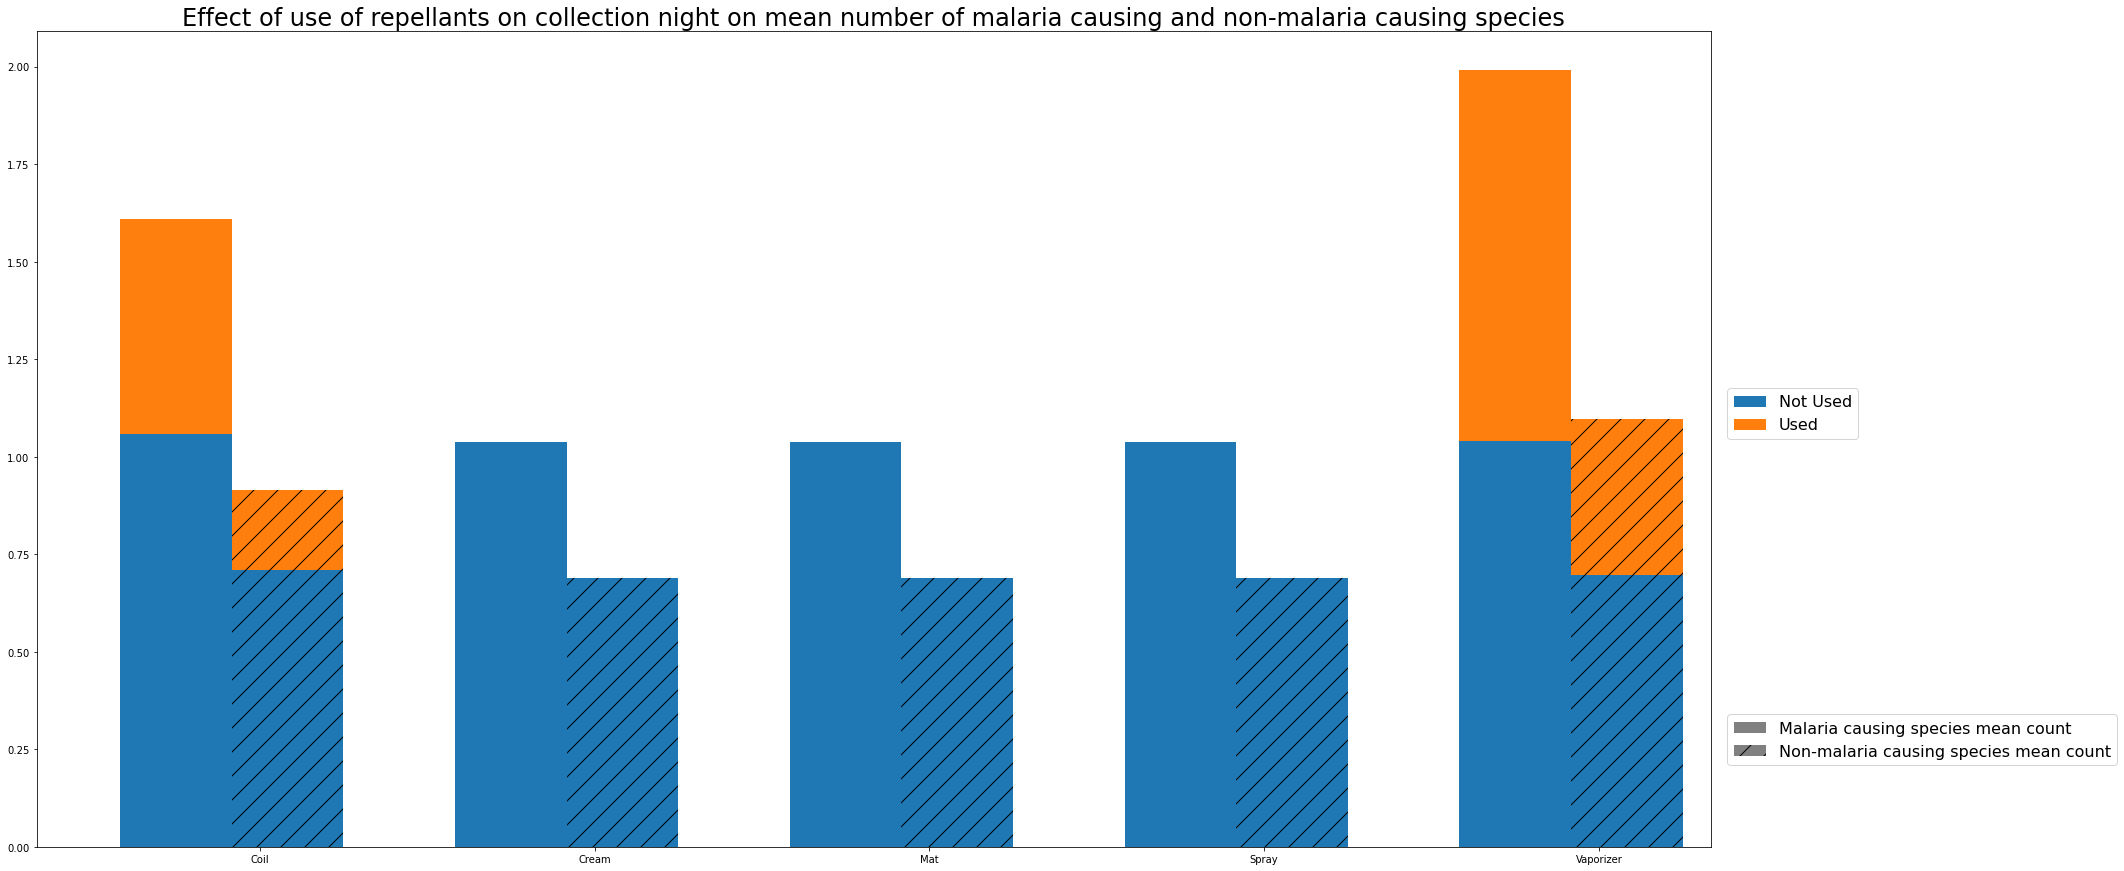

In [102]:
idx_bases = [s for s in df.columns if s.startswith('repellant_')]
index_vals = [' '.join(idx.split('_')[1:]).title() for idx in idx_bases]
col_vals = ['Not Used', 'Used']
data_malaria = []
data_non_malaria = []
for col in idx_bases:
    data_malaria.append([df[df[col] == 0]['species_causing_malaria'].mean(), df[df[col] == 1]['species_causing_malaria'].mean()])
    data_non_malaria.append([df[df[col] == 0]['species_not_causing_malaria'].mean(), df[df[col] == 1]['species_not_causing_malaria'].mean()])
df_malaria = pd.DataFrame(data_malaria, index=index_vals, columns=col_vals)
df_non_malaria = pd.DataFrame(data_non_malaria, index=index_vals, columns=col_vals)

plt.figure(figsize=(30, 15))
plot_clustered_stacked([df_malaria, df_non_malaria], ['Malaria causing species mean count', 'Non-malaria causing species mean count'], 'Effect of use of repellants on collection night on mean number of malaria causing and non-malaria causing species')
plt.show()

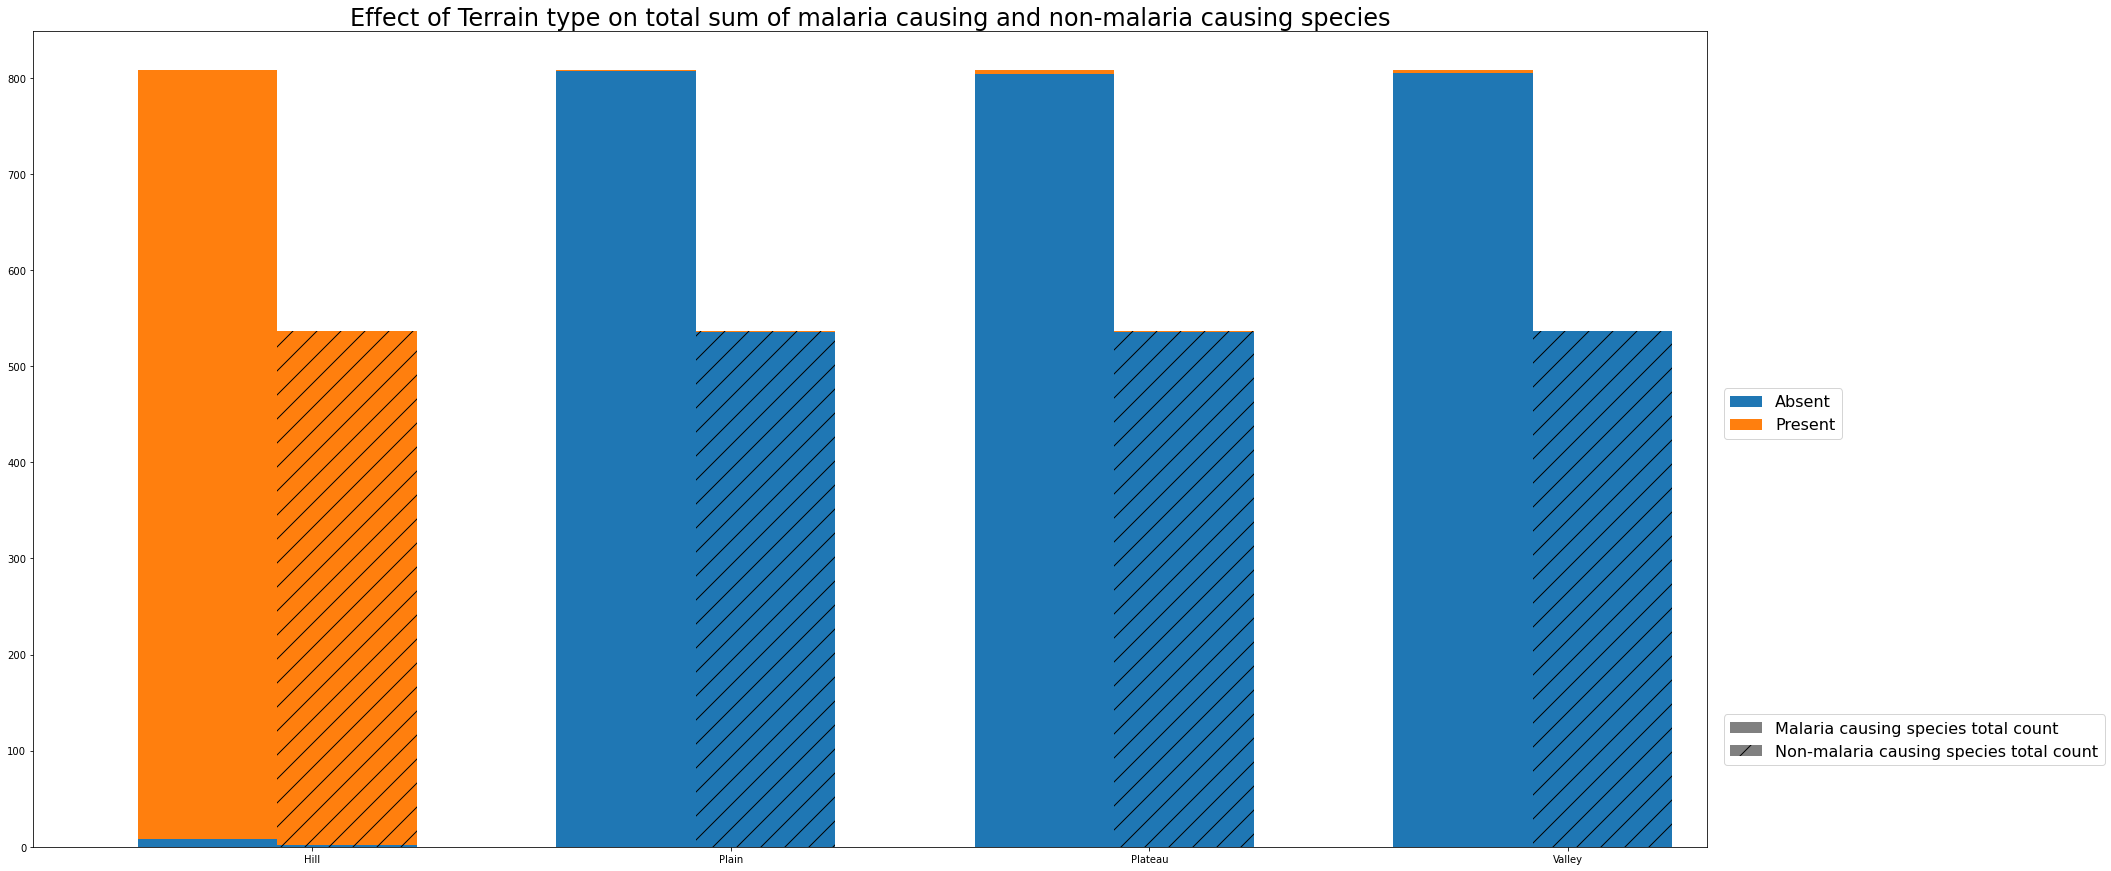

In [103]:
idx_bases = [s for s in df.columns if s.startswith('terrain_')]
index_vals = [' '.join(idx.split('_')[1:]).title() for idx in idx_bases]
col_vals = ['Absent', 'Present']
data_malaria = []
data_non_malaria = []
for col in idx_bases:
    data_malaria.append([df[df[col] == 0]['species_causing_malaria'].sum(), df[df[col] == 1]['species_causing_malaria'].sum()])
    data_non_malaria.append([df[df[col] == 0]['species_not_causing_malaria'].sum(), df[df[col] == 1]['species_not_causing_malaria'].sum()])
df_malaria = pd.DataFrame(data_malaria, index=index_vals, columns=col_vals)
df_non_malaria = pd.DataFrame(data_non_malaria, index=index_vals, columns=col_vals)

plt.figure(figsize=(30, 15))
plot_clustered_stacked([df_malaria, df_non_malaria], ['Malaria causing species total count', 'Non-malaria causing species total count'], 'Effect of Terrain type on total sum of malaria causing and non-malaria causing species')
plt.show()

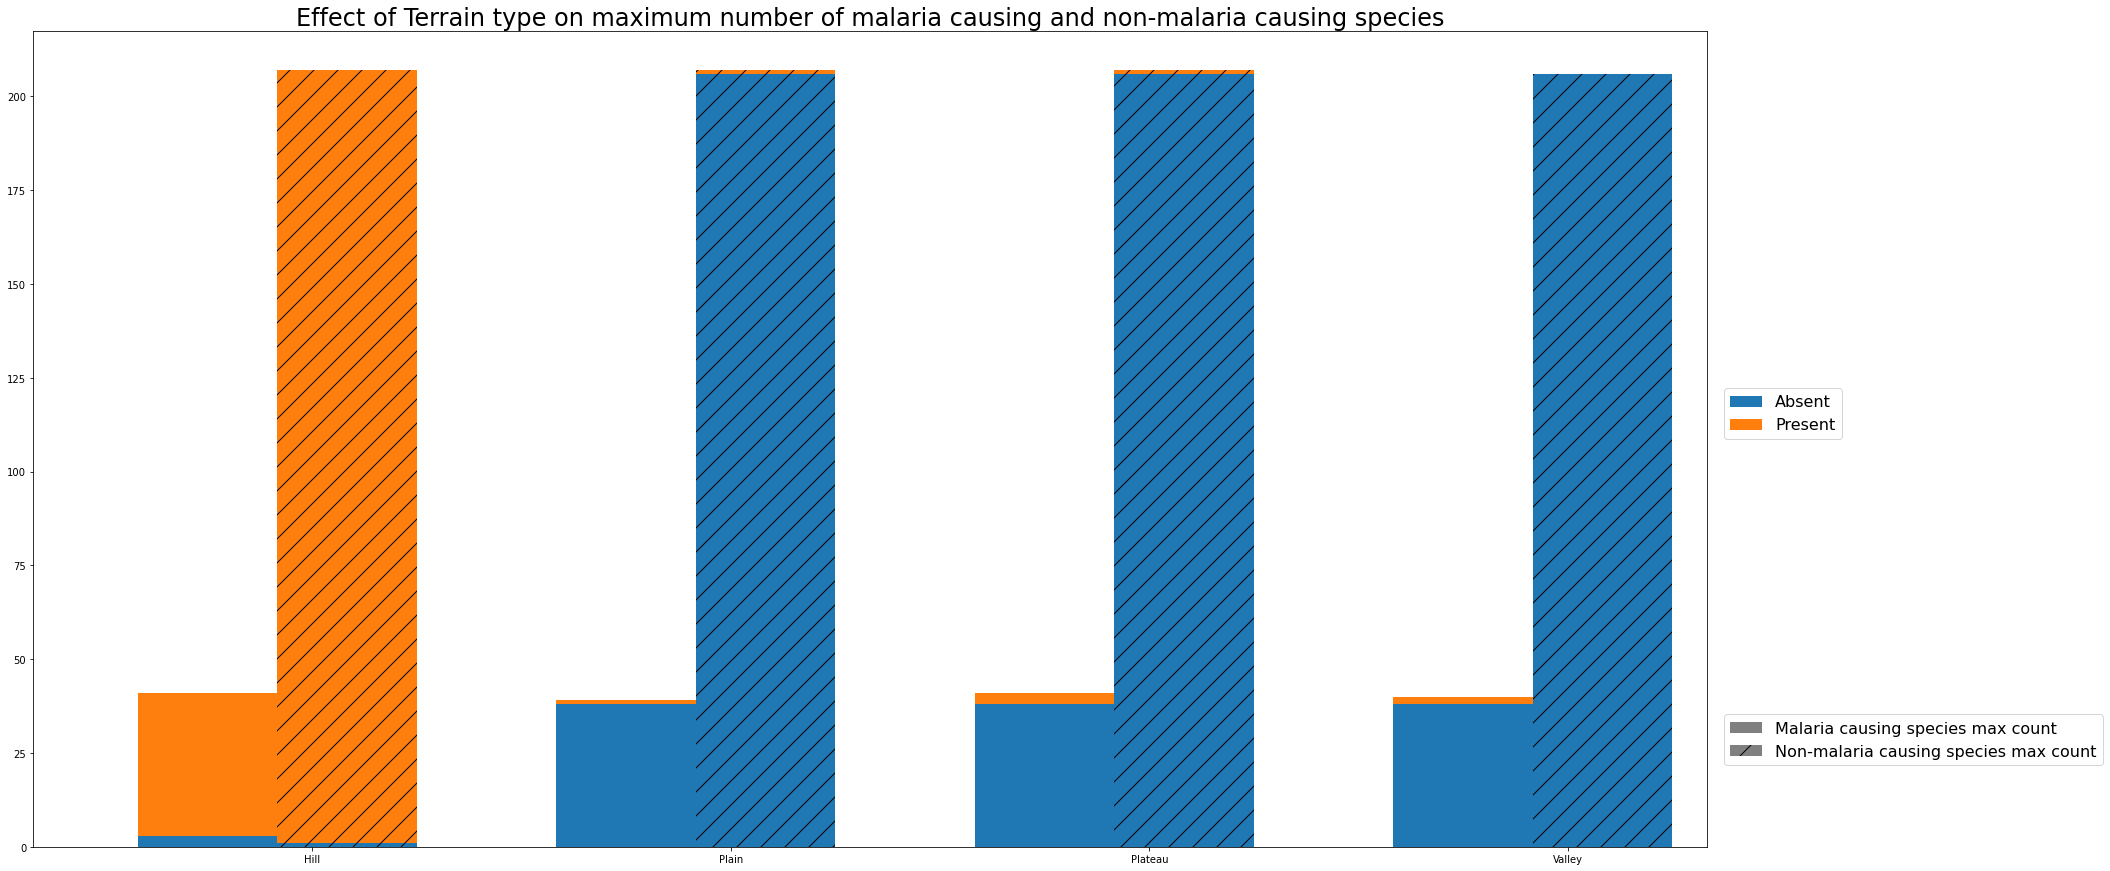

In [104]:
idx_bases = [s for s in df.columns if s.startswith('terrain_')]
index_vals = [' '.join(idx.split('_')[1:]).title() for idx in idx_bases]
col_vals = ['Absent', 'Present']
data_malaria = []
data_non_malaria = []
for col in idx_bases:
    data_malaria.append([df[df[col] == 0]['species_causing_malaria'].max(), df[df[col] == 1]['species_causing_malaria'].max()])
    data_non_malaria.append([df[df[col] == 0]['species_not_causing_malaria'].max(), df[df[col] == 1]['species_not_causing_malaria'].max()])
df_malaria = pd.DataFrame(data_malaria, index=index_vals, columns=col_vals)
df_non_malaria = pd.DataFrame(data_non_malaria, index=index_vals, columns=col_vals)

plt.figure(figsize=(30, 15))
plot_clustered_stacked([df_malaria, df_non_malaria], ['Malaria causing species max count', 'Non-malaria causing species max count'], 'Effect of Terrain type on maximum number of malaria causing and non-malaria causing species')
plt.show()

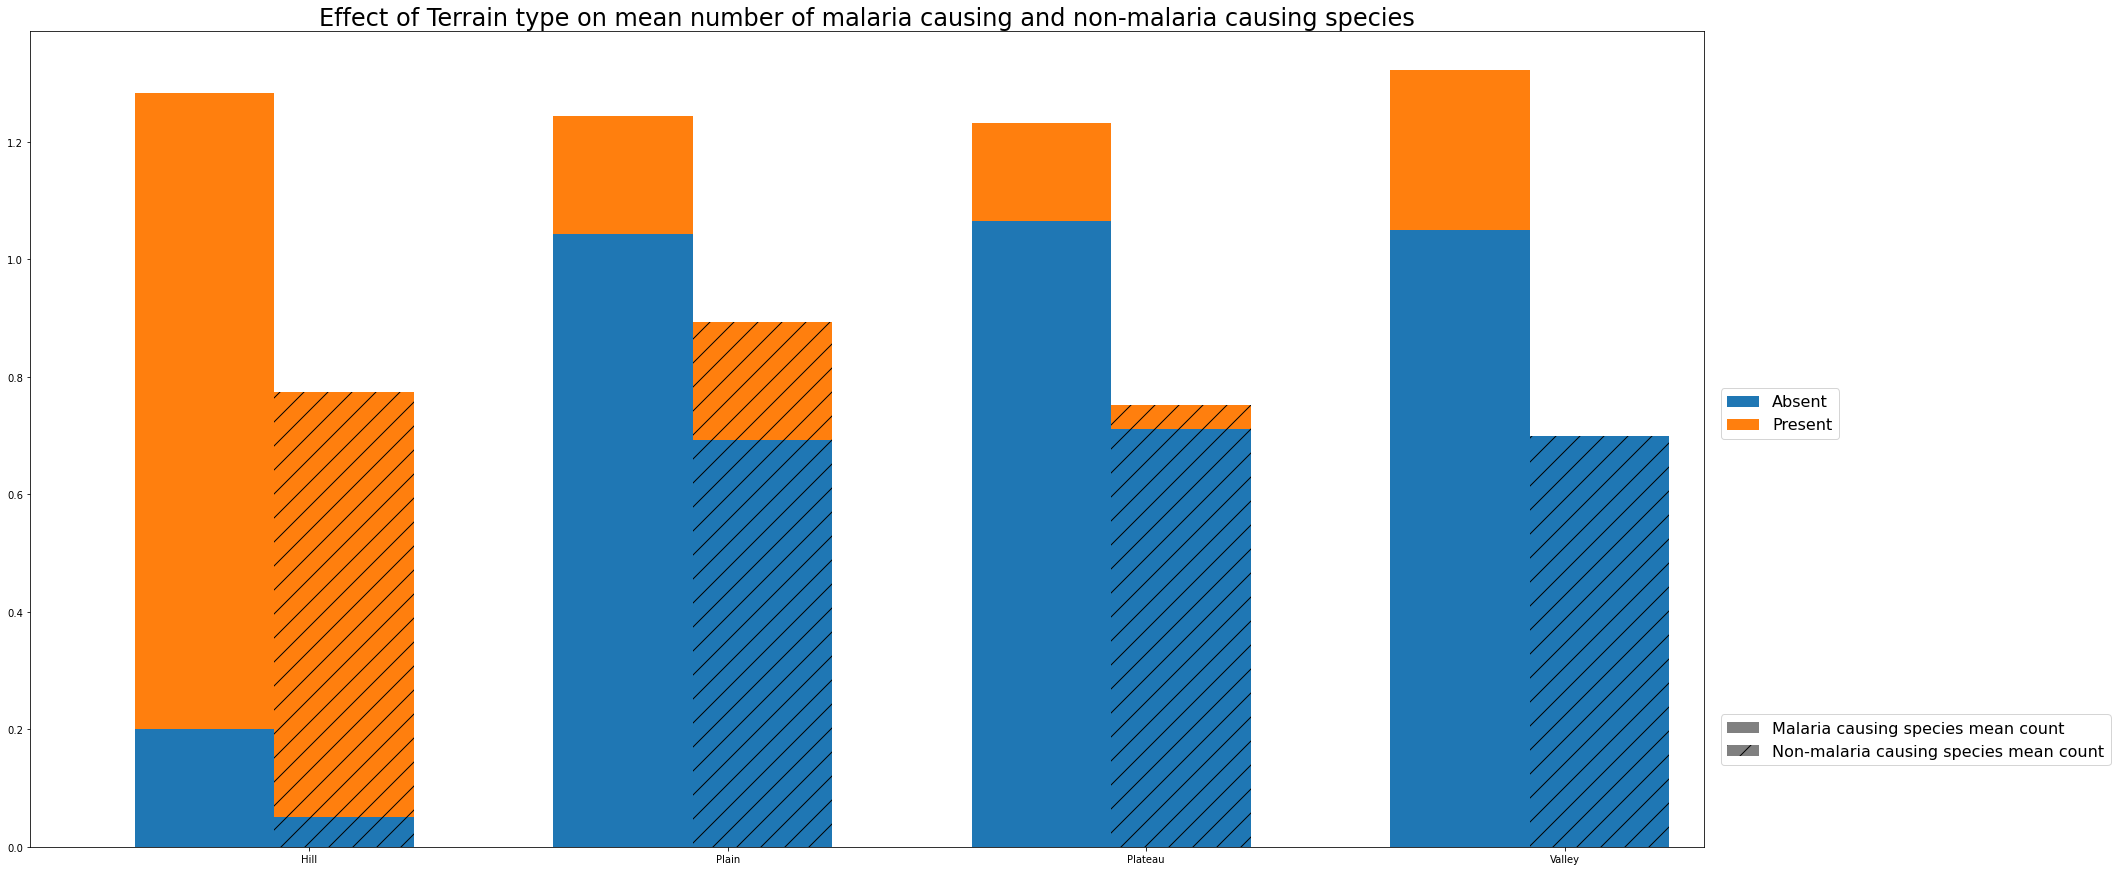

In [105]:
idx_bases = [s for s in df.columns if s.startswith('terrain_')]
index_vals = [' '.join(idx.split('_')[1:]).title() for idx in idx_bases]
col_vals = ['Absent', 'Present']
data_malaria = []
data_non_malaria = []
for col in idx_bases:
    data_malaria.append([df[df[col] == 0]['species_causing_malaria'].mean(), df[df[col] == 1]['species_causing_malaria'].mean()])
    data_non_malaria.append([df[df[col] == 0]['species_not_causing_malaria'].mean(), df[df[col] == 1]['species_not_causing_malaria'].mean()])
df_malaria = pd.DataFrame(data_malaria, index=index_vals, columns=col_vals)
df_non_malaria = pd.DataFrame(data_non_malaria, index=index_vals, columns=col_vals)

plt.figure(figsize=(30, 15))
plot_clustered_stacked([df_malaria, df_non_malaria], ['Malaria causing species mean count', 'Non-malaria causing species mean count'], 'Effect of Terrain type on mean number of malaria causing and non-malaria causing species')
plt.show()

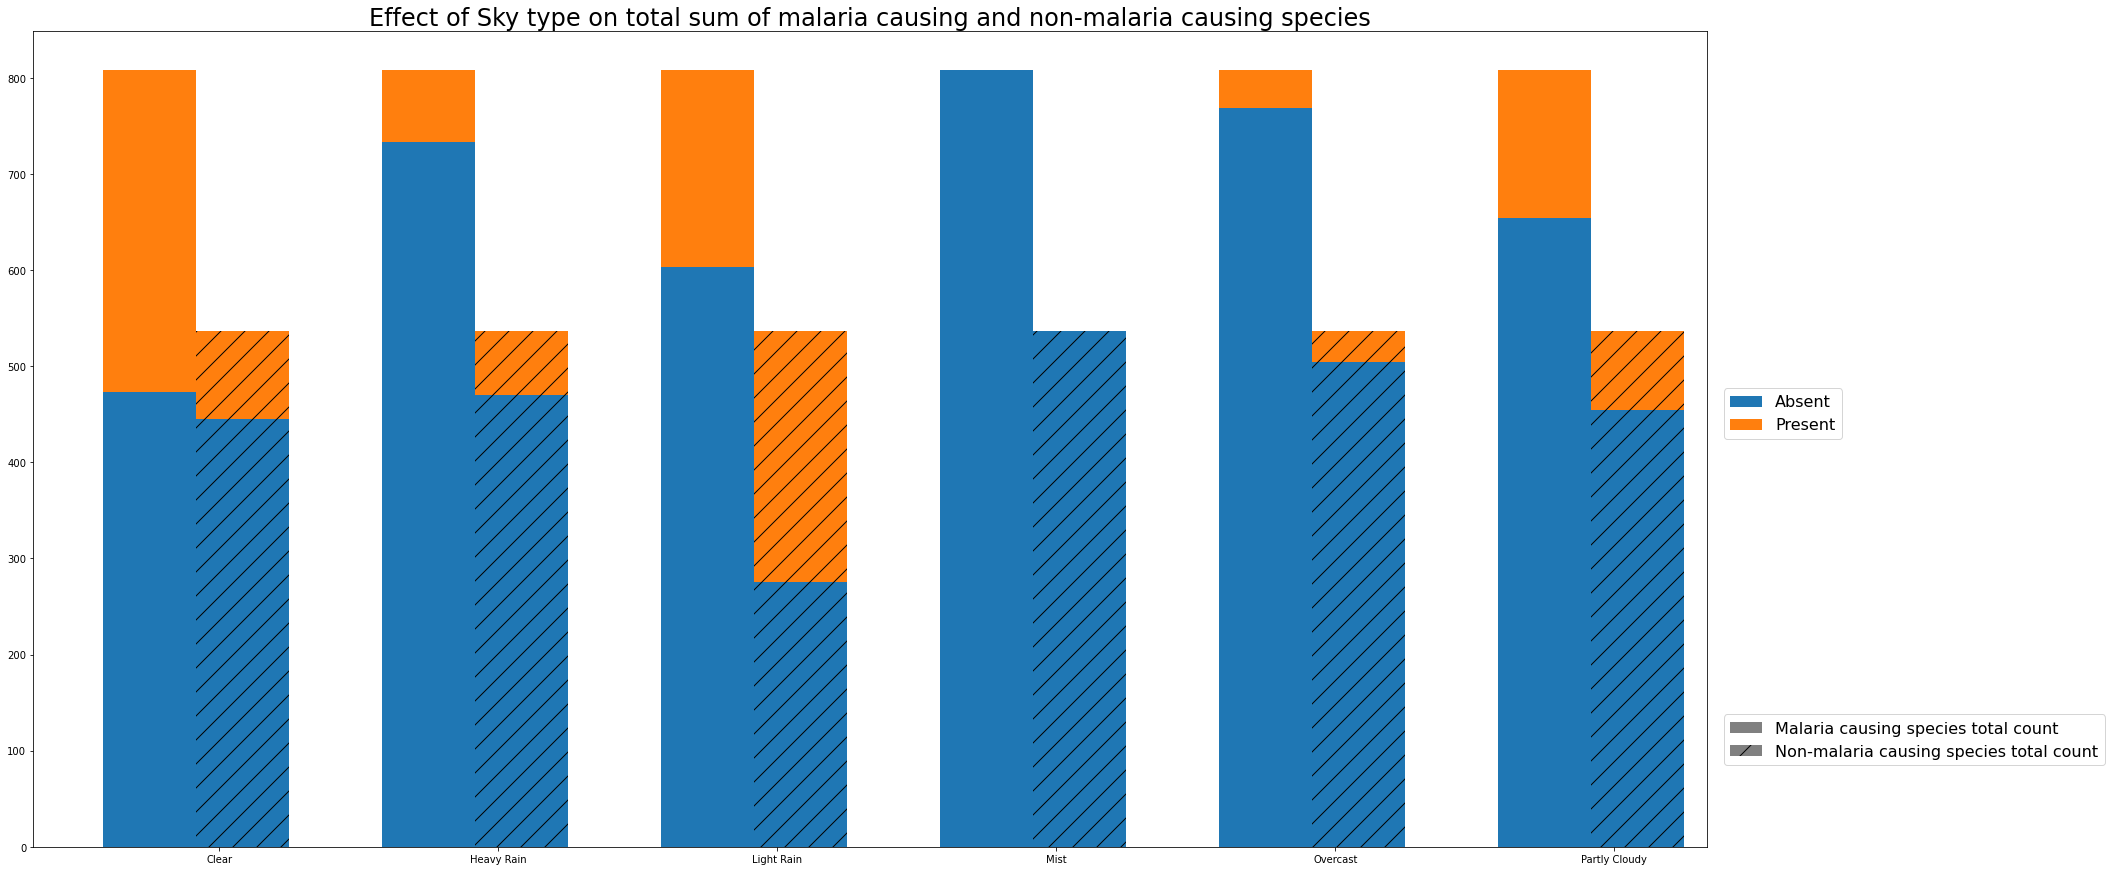

In [106]:
idx_bases = [s for s in df.columns if s.startswith('sky_')]
index_vals = [' '.join(idx.split('_')[1:]).title() for idx in idx_bases]
col_vals = ['Absent', 'Present']
data_malaria = []
data_non_malaria = []
for col in idx_bases:
    data_malaria.append([df[df[col] == 0]['species_causing_malaria'].sum(), df[df[col] == 1]['species_causing_malaria'].sum()])
    data_non_malaria.append([df[df[col] == 0]['species_not_causing_malaria'].sum(), df[df[col] == 1]['species_not_causing_malaria'].sum()])
df_malaria = pd.DataFrame(data_malaria, index=index_vals, columns=col_vals)
df_non_malaria = pd.DataFrame(data_non_malaria, index=index_vals, columns=col_vals)

plt.figure(figsize=(30, 15))
plot_clustered_stacked([df_malaria, df_non_malaria], ['Malaria causing species total count', 'Non-malaria causing species total count'], 'Effect of Sky type on total sum of malaria causing and non-malaria causing species')
plt.show()

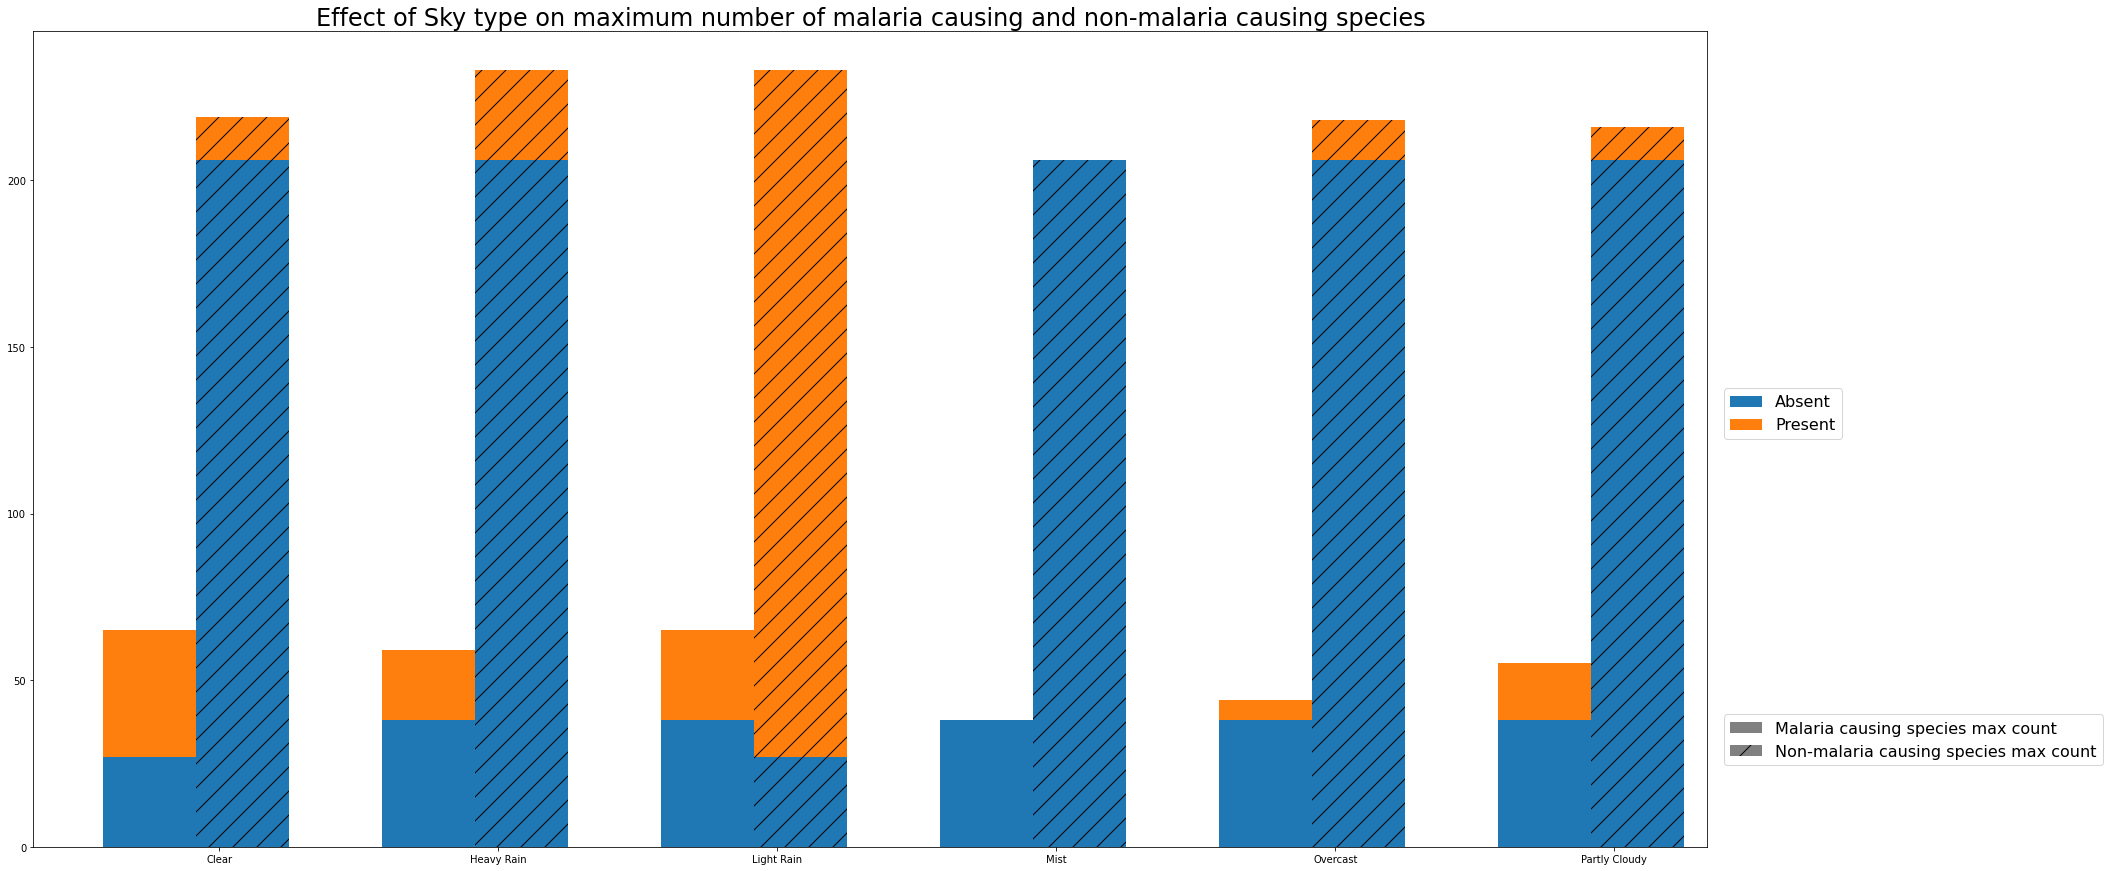

In [107]:
idx_bases = [s for s in df.columns if s.startswith('sky_')]
index_vals = [' '.join(idx.split('_')[1:]).title() for idx in idx_bases]
col_vals = ['Absent', 'Present']
data_malaria = []
data_non_malaria = []
for col in idx_bases:
    data_malaria.append([df[df[col] == 0]['species_causing_malaria'].max(), df[df[col] == 1]['species_causing_malaria'].max()])
    data_non_malaria.append([df[df[col] == 0]['species_not_causing_malaria'].max(), df[df[col] == 1]['species_not_causing_malaria'].max()])
df_malaria = pd.DataFrame(data_malaria, index=index_vals, columns=col_vals)
df_non_malaria = pd.DataFrame(data_non_malaria, index=index_vals, columns=col_vals)

plt.figure(figsize=(30, 15))
plot_clustered_stacked([df_malaria, df_non_malaria], ['Malaria causing species max count', 'Non-malaria causing species max count'], 'Effect of Sky type on maximum number of malaria causing and non-malaria causing species')
plt.show()

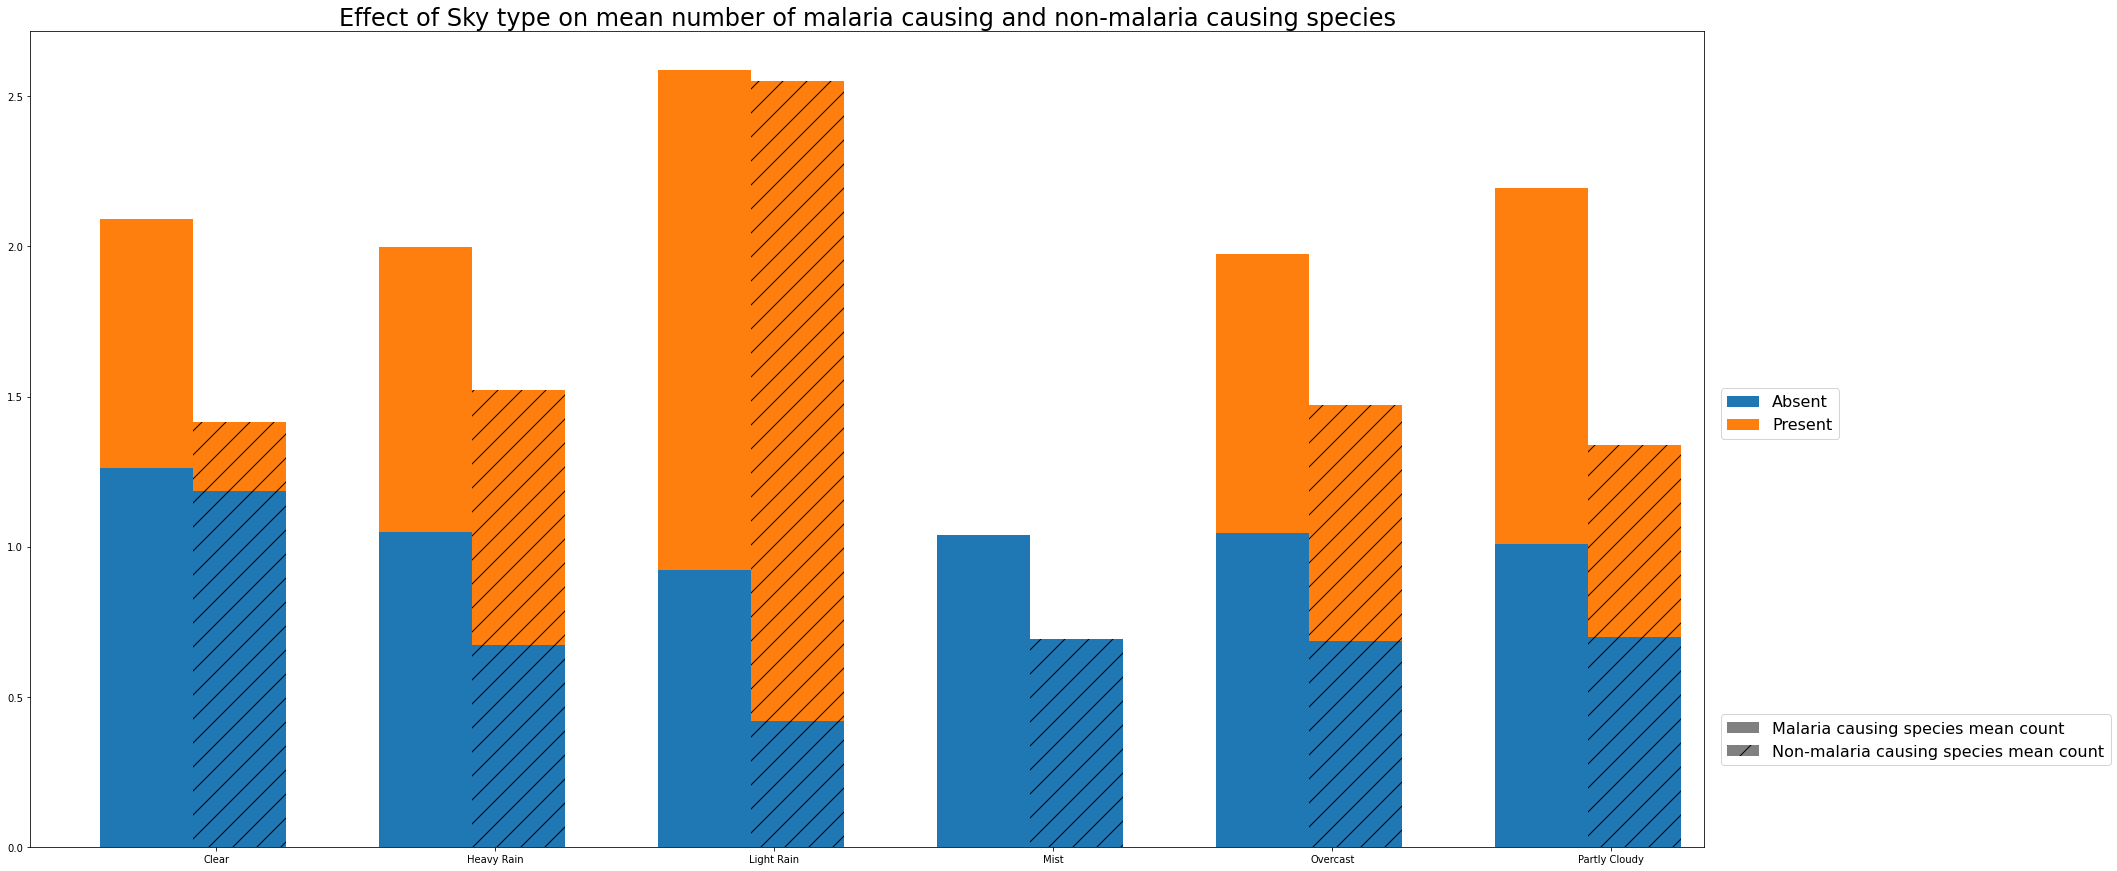

In [108]:
idx_bases = [s for s in df.columns if s.startswith('sky_')]
index_vals = [' '.join(idx.split('_')[1:]).title() for idx in idx_bases]
col_vals = ['Absent', 'Present']
data_malaria = []
data_non_malaria = []
for col in idx_bases:
    data_malaria.append([df[df[col] == 0]['species_causing_malaria'].mean(), df[df[col] == 1]['species_causing_malaria'].mean()])
    data_non_malaria.append([df[df[col] == 0]['species_not_causing_malaria'].mean(), df[df[col] == 1]['species_not_causing_malaria'].mean()])
df_malaria = pd.DataFrame(data_malaria, index=index_vals, columns=col_vals)
df_non_malaria = pd.DataFrame(data_non_malaria, index=index_vals, columns=col_vals)

plt.figure(figsize=(30, 15))
plot_clustered_stacked([df_malaria, df_non_malaria], ['Malaria causing species mean count', 'Non-malaria causing species mean count'], 'Effect of Sky type on mean number of malaria causing and non-malaria causing species')
plt.show()

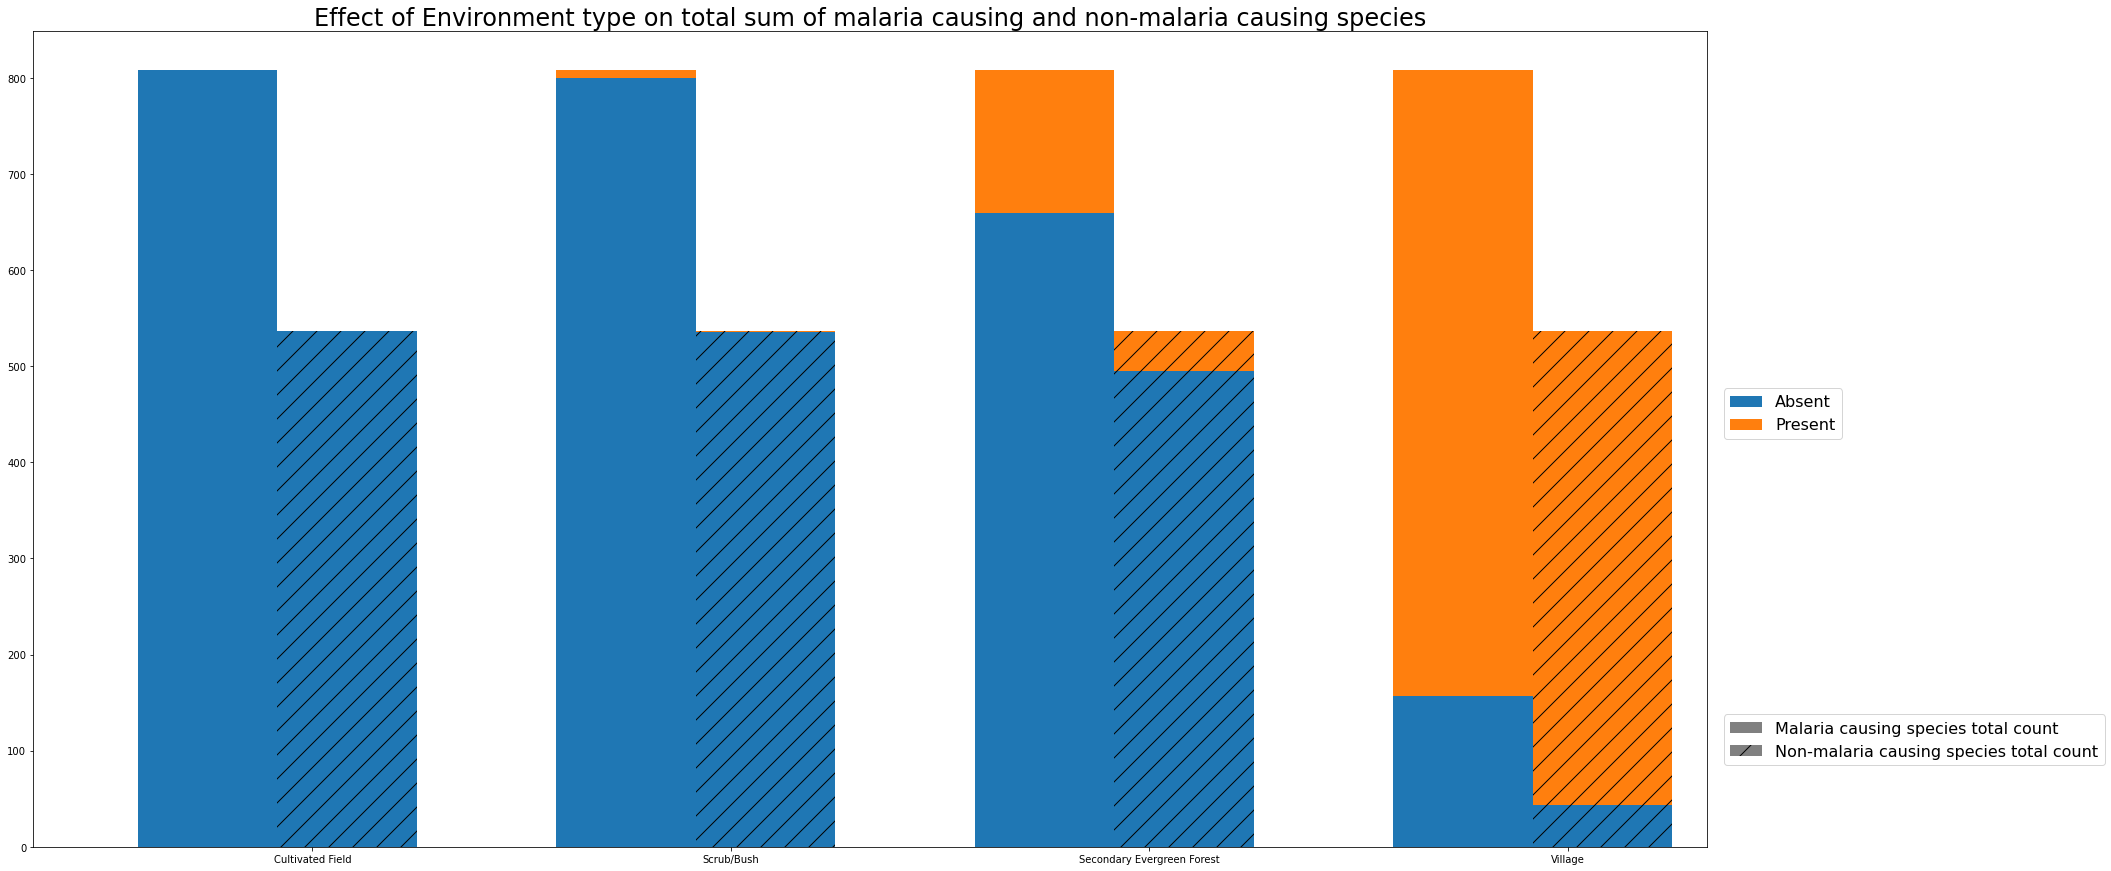

In [109]:
idx_bases = [s for s in df.columns if s.startswith('environment_')]
index_vals = [' '.join(idx.split('_')[1:]).title() for idx in idx_bases]
col_vals = ['Absent', 'Present']
data_malaria = []
data_non_malaria = []
for col in idx_bases:
    data_malaria.append([df[df[col] == 0]['species_causing_malaria'].sum(), df[df[col] == 1]['species_causing_malaria'].sum()])
    data_non_malaria.append([df[df[col] == 0]['species_not_causing_malaria'].sum(), df[df[col] == 1]['species_not_causing_malaria'].sum()])
df_malaria = pd.DataFrame(data_malaria, index=index_vals, columns=col_vals)
df_non_malaria = pd.DataFrame(data_non_malaria, index=index_vals, columns=col_vals)

plt.figure(figsize=(30, 15))
plot_clustered_stacked([df_malaria, df_non_malaria], ['Malaria causing species total count', 'Non-malaria causing species total count'], 'Effect of Environment type on total sum of malaria causing and non-malaria causing species')
plt.show()

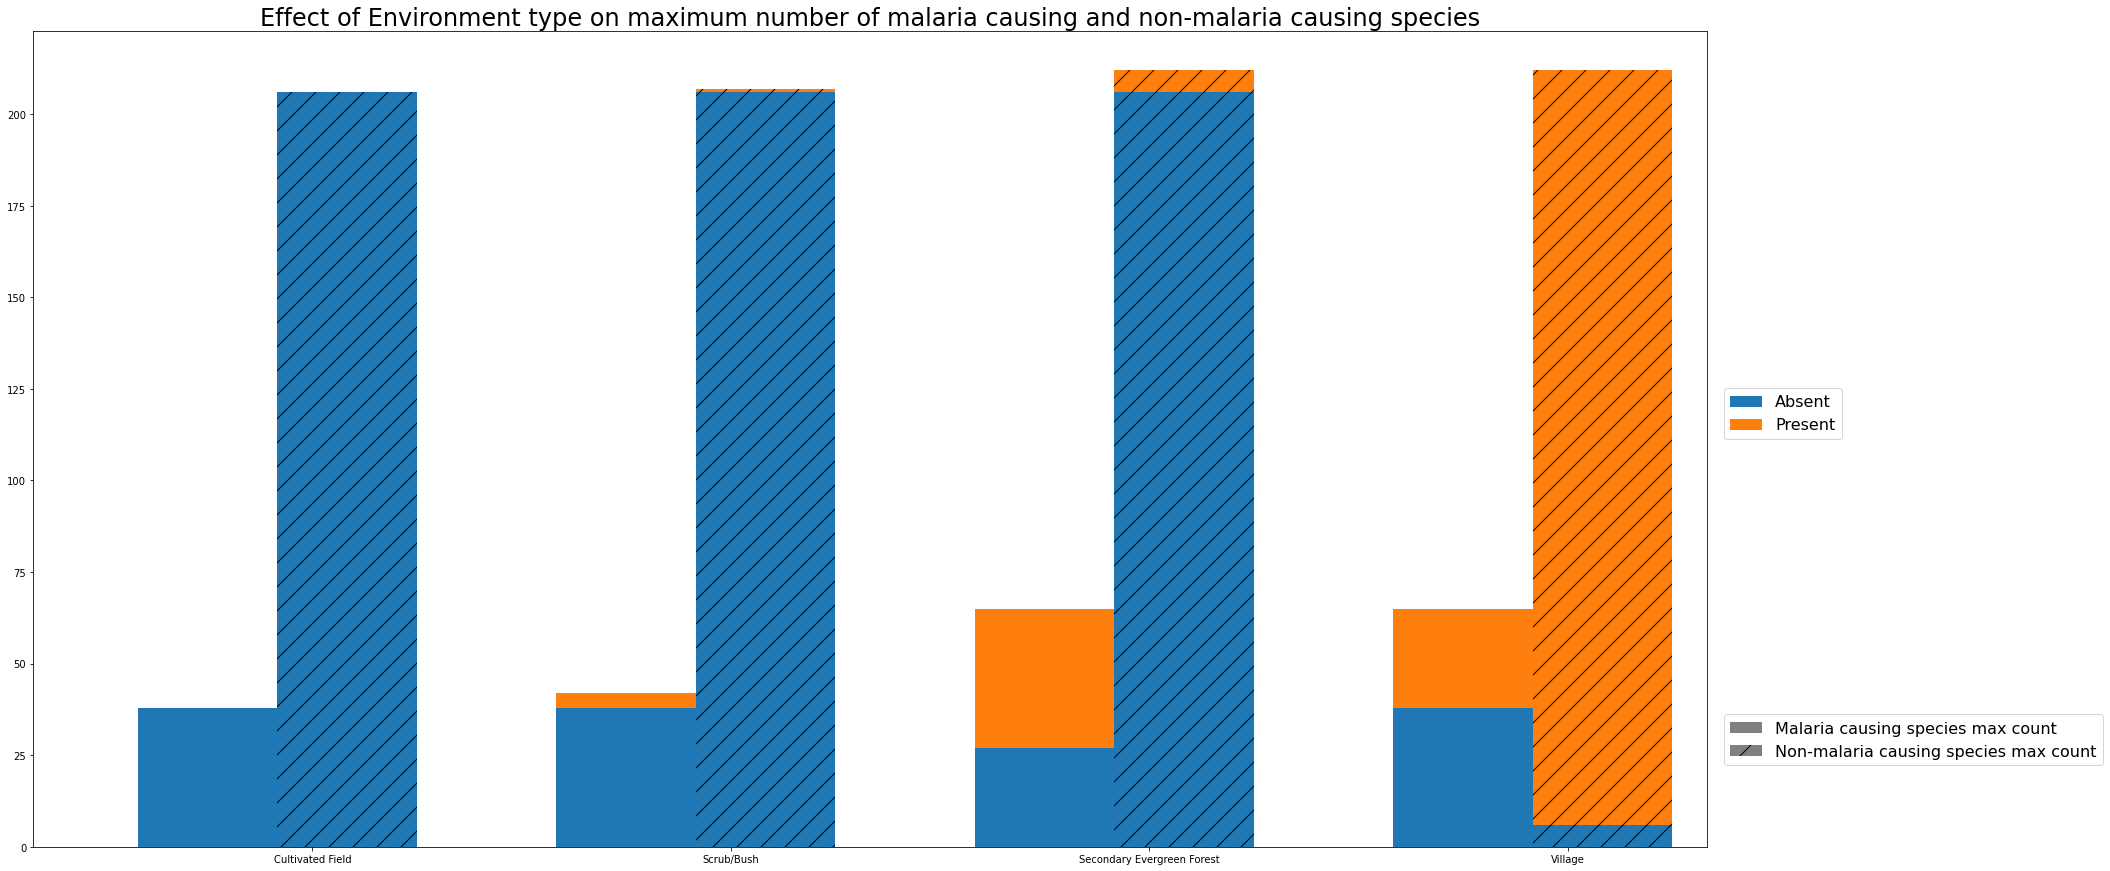

In [110]:
idx_bases = [s for s in df.columns if s.startswith('environment_')]
index_vals = [' '.join(idx.split('_')[1:]).title() for idx in idx_bases]
col_vals = ['Absent', 'Present']
data_malaria = []
data_non_malaria = []
for col in idx_bases:
    data_malaria.append([df[df[col] == 0]['species_causing_malaria'].max(), df[df[col] == 1]['species_causing_malaria'].max()])
    data_non_malaria.append([df[df[col] == 0]['species_not_causing_malaria'].max(), df[df[col] == 1]['species_not_causing_malaria'].max()])
df_malaria = pd.DataFrame(data_malaria, index=index_vals, columns=col_vals)
df_non_malaria = pd.DataFrame(data_non_malaria, index=index_vals, columns=col_vals)

plt.figure(figsize=(30, 15))
plot_clustered_stacked([df_malaria, df_non_malaria], ['Malaria causing species max count', 'Non-malaria causing species max count'], 'Effect of Environment type on maximum number of malaria causing and non-malaria causing species')
plt.show()

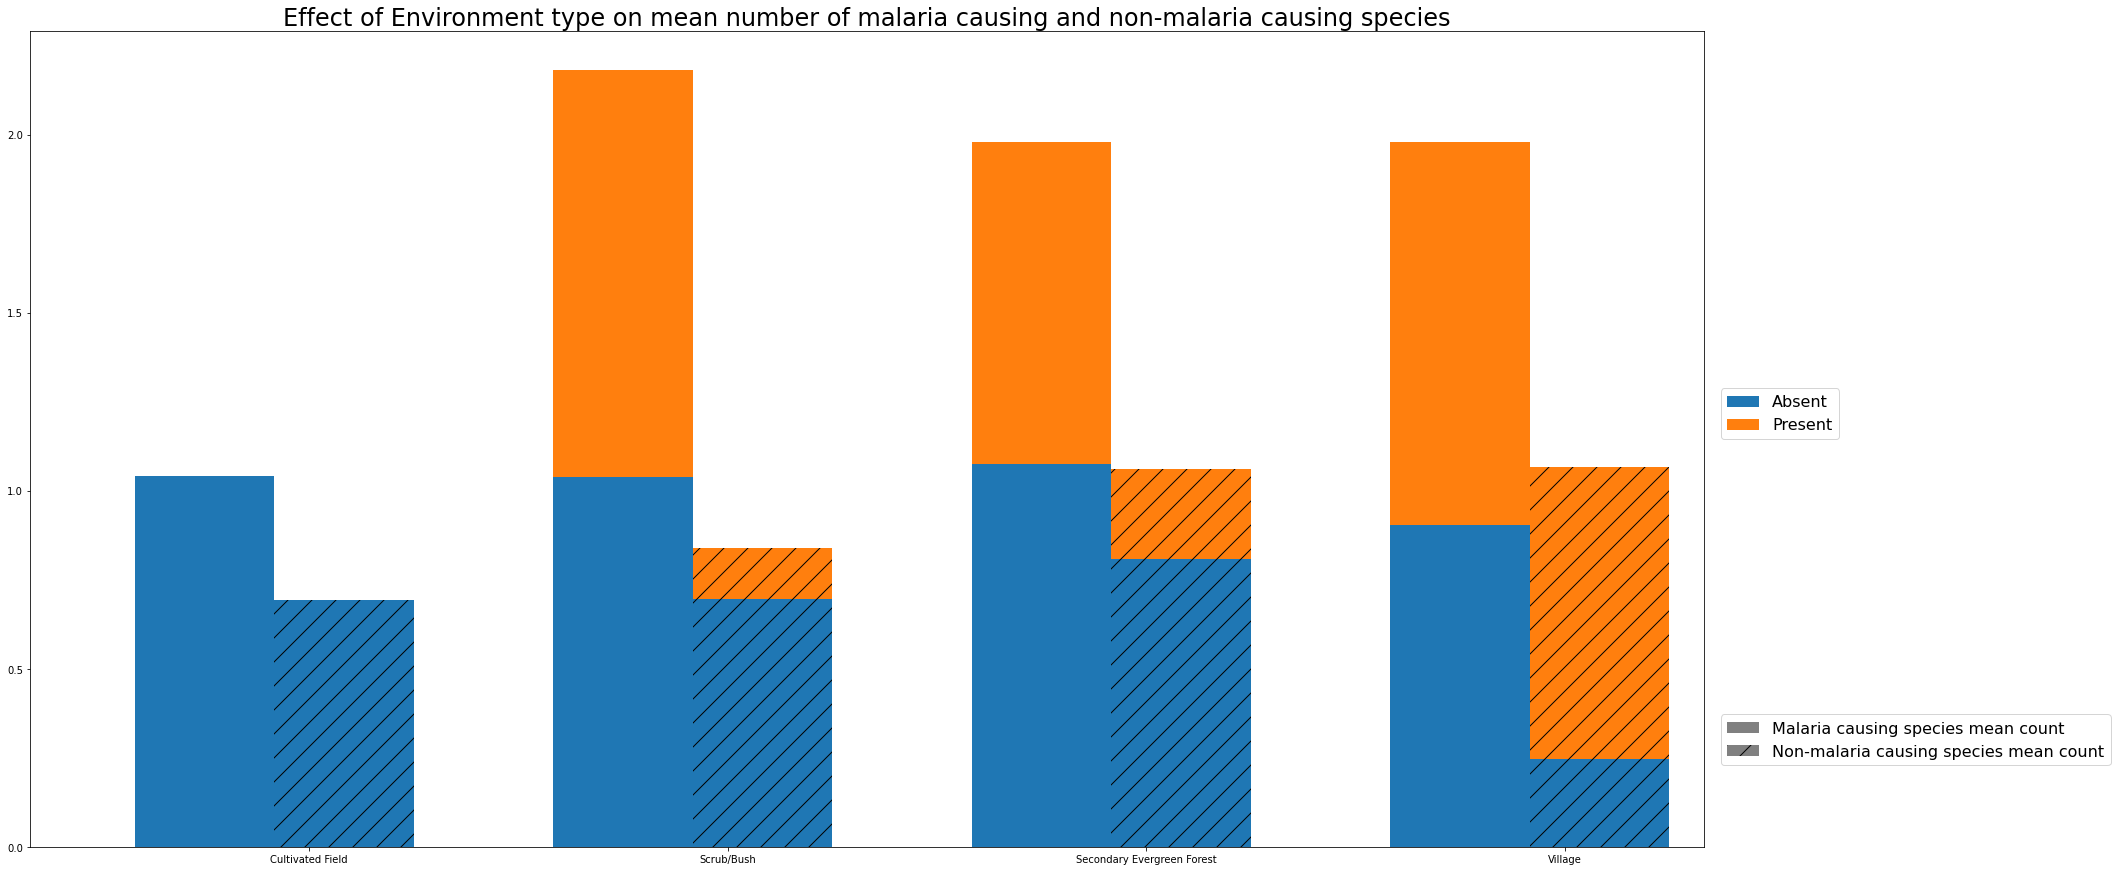

In [111]:
idx_bases = [s for s in df.columns if s.startswith('environment_')]
index_vals = [' '.join(idx.split('_')[1:]).title() for idx in idx_bases]
col_vals = ['Absent', 'Present']
data_malaria = []
data_non_malaria = []
for col in idx_bases:
    data_malaria.append([df[df[col] == 0]['species_causing_malaria'].mean(), df[df[col] == 1]['species_causing_malaria'].mean()])
    data_non_malaria.append([df[df[col] == 0]['species_not_causing_malaria'].mean(), df[df[col] == 1]['species_not_causing_malaria'].mean()])
df_malaria = pd.DataFrame(data_malaria, index=index_vals, columns=col_vals)
df_non_malaria = pd.DataFrame(data_non_malaria, index=index_vals, columns=col_vals)

plt.figure(figsize=(30, 15))
plot_clustered_stacked([df_malaria, df_non_malaria], ['Malaria causing species mean count', 'Non-malaria causing species mean count'], 'Effect of Environment type on mean number of malaria causing and non-malaria causing species')
plt.show()

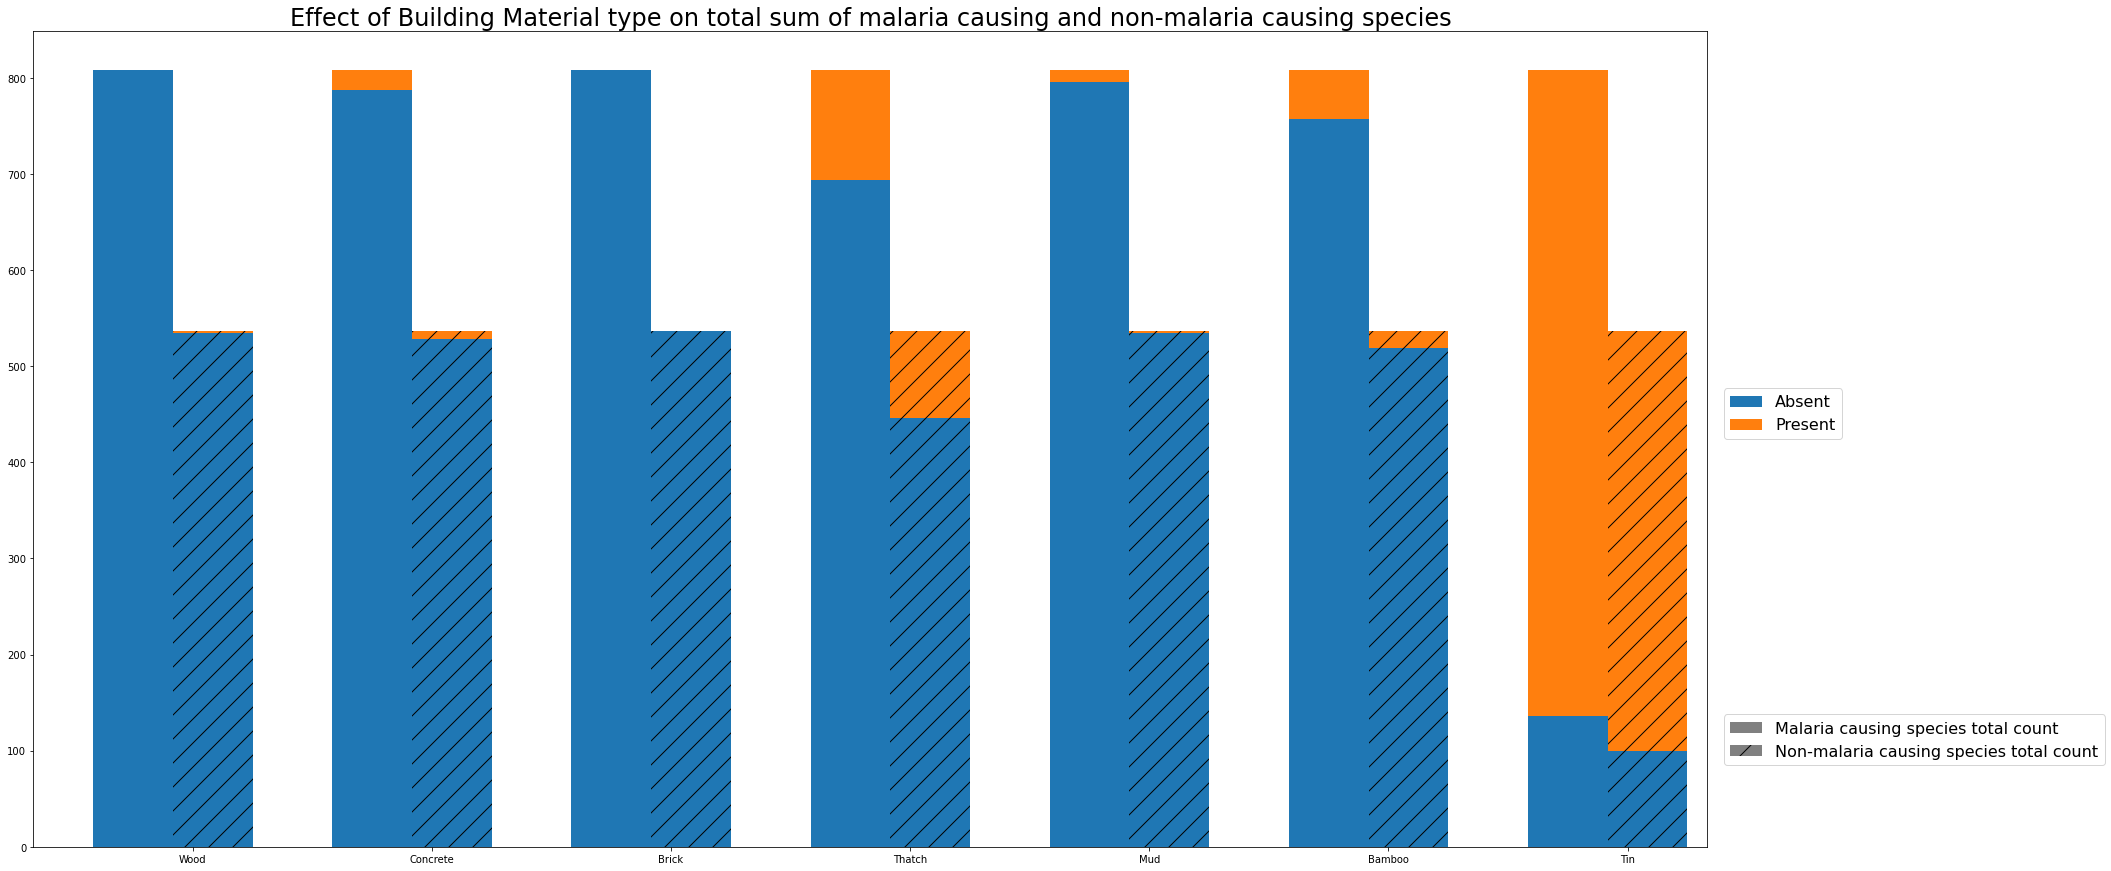

In [112]:
idx_bases = [s for s in df.columns if s.startswith('building_material_')]
index_vals = [' '.join(idx.split('_')[2:]).title() for idx in idx_bases]
col_vals = ['Absent', 'Present']
data_malaria = []
data_non_malaria = []
for col in idx_bases:
    data_malaria.append([df[df[col] == 0]['species_causing_malaria'].sum(), df[df[col] == 1]['species_causing_malaria'].sum()])
    data_non_malaria.append([df[df[col] == 0]['species_not_causing_malaria'].sum(), df[df[col] == 1]['species_not_causing_malaria'].sum()])
df_malaria = pd.DataFrame(data_malaria, index=index_vals, columns=col_vals)
df_non_malaria = pd.DataFrame(data_non_malaria, index=index_vals, columns=col_vals)

plt.figure(figsize=(30, 15))
plot_clustered_stacked([df_malaria, df_non_malaria], ['Malaria causing species total count', 'Non-malaria causing species total count'], 'Effect of Building Material type on total sum of malaria causing and non-malaria causing species')
plt.show()

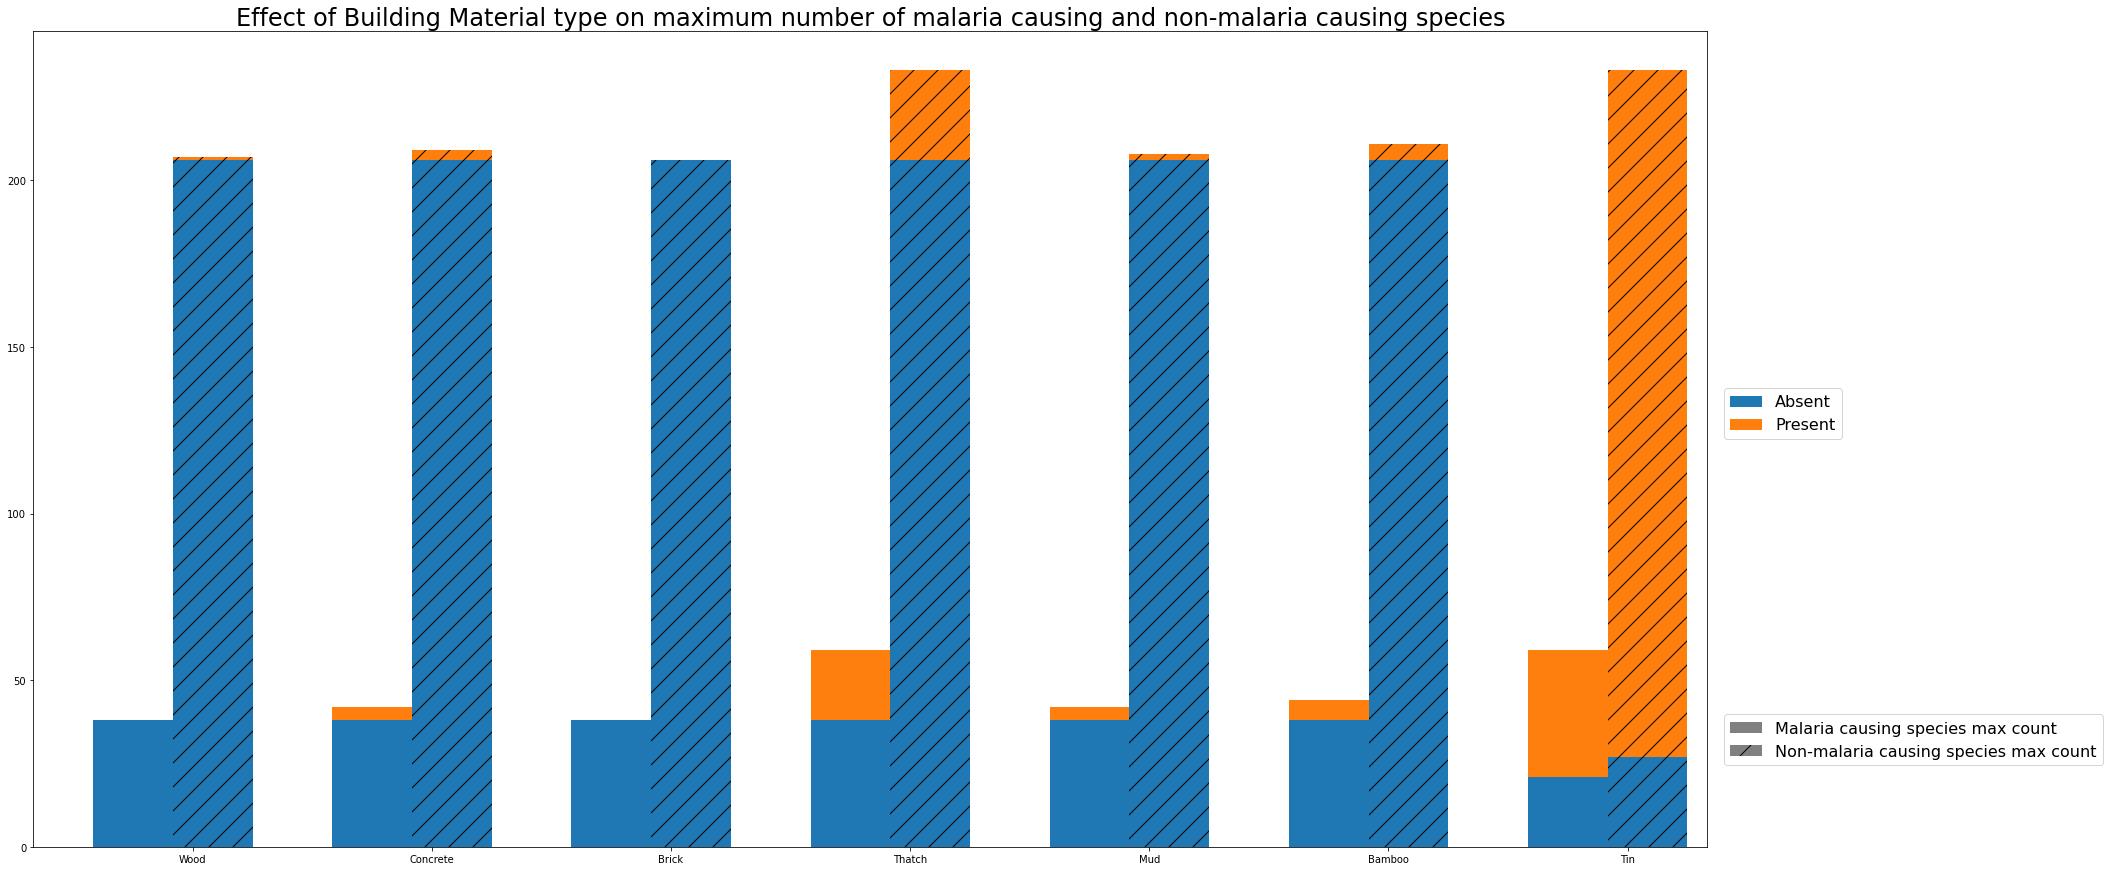

In [113]:
idx_bases = [s for s in df.columns if s.startswith('building_material_')]
index_vals = [' '.join(idx.split('_')[2:]).title() for idx in idx_bases]
col_vals = ['Absent', 'Present']
data_malaria = []
data_non_malaria = []
for col in idx_bases:
    data_malaria.append([df[df[col] == 0]['species_causing_malaria'].max(), df[df[col] == 1]['species_causing_malaria'].max()])
    data_non_malaria.append([df[df[col] == 0]['species_not_causing_malaria'].max(), df[df[col] == 1]['species_not_causing_malaria'].max()])
df_malaria = pd.DataFrame(data_malaria, index=index_vals, columns=col_vals)
df_non_malaria = pd.DataFrame(data_non_malaria, index=index_vals, columns=col_vals)

plt.figure(figsize=(30, 15))
plot_clustered_stacked([df_malaria, df_non_malaria], ['Malaria causing species max count', 'Non-malaria causing species max count'], 'Effect of Building Material type on maximum number of malaria causing and non-malaria causing species')
plt.show()

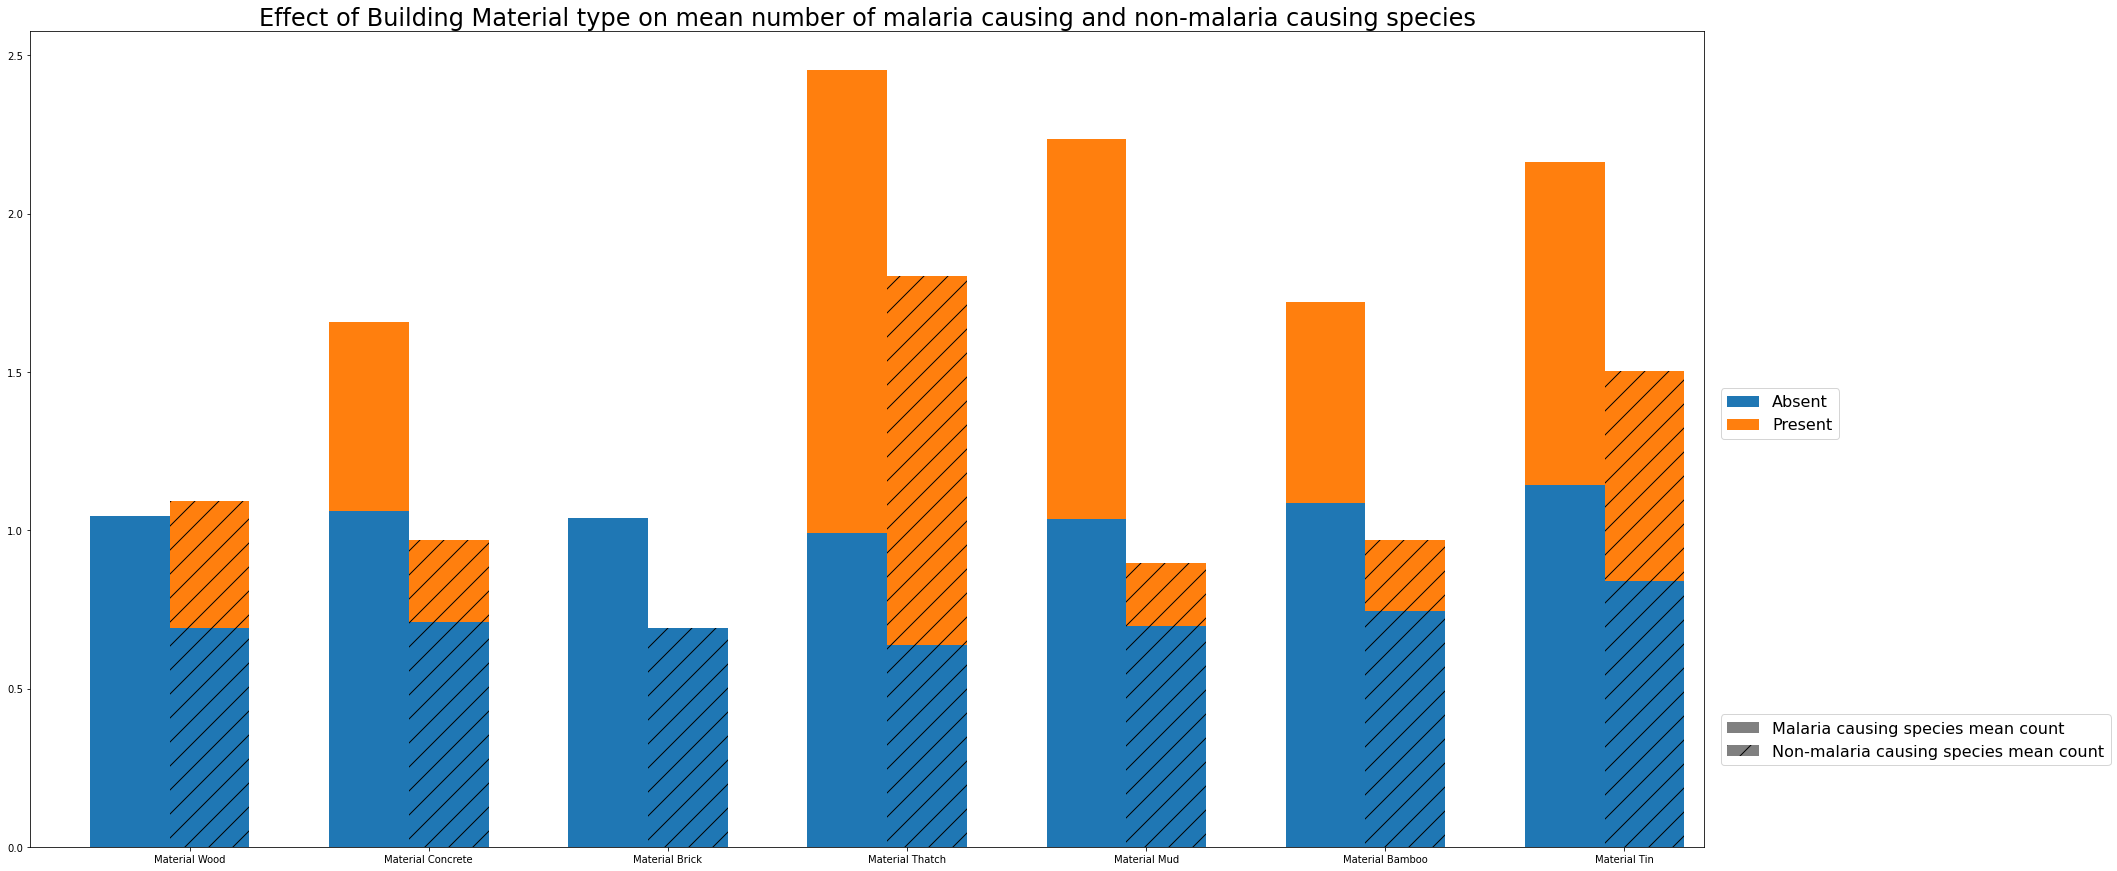

In [114]:
idx_bases = [s for s in df.columns if s.startswith('building_material_')]
index_vals = [' '.join(idx.split('_')[1:]).title() for idx in idx_bases]
col_vals = ['Absent', 'Present']
data_malaria = []
data_non_malaria = []
for col in idx_bases:
    data_malaria.append([df[df[col] == 0]['species_causing_malaria'].mean(), df[df[col] == 1]['species_causing_malaria'].mean()])
    data_non_malaria.append([df[df[col] == 0]['species_not_causing_malaria'].mean(), df[df[col] == 1]['species_not_causing_malaria'].mean()])
df_malaria = pd.DataFrame(data_malaria, index=index_vals, columns=col_vals)
df_non_malaria = pd.DataFrame(data_non_malaria, index=index_vals, columns=col_vals)

plt.figure(figsize=(30, 15))
plot_clustered_stacked([df_malaria, df_non_malaria], ['Malaria causing species mean count', 'Non-malaria causing species mean count'], 'Effect of Building Material type on mean number of malaria causing and non-malaria causing species')
plt.show()